# Cargar dataset CIFAR-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



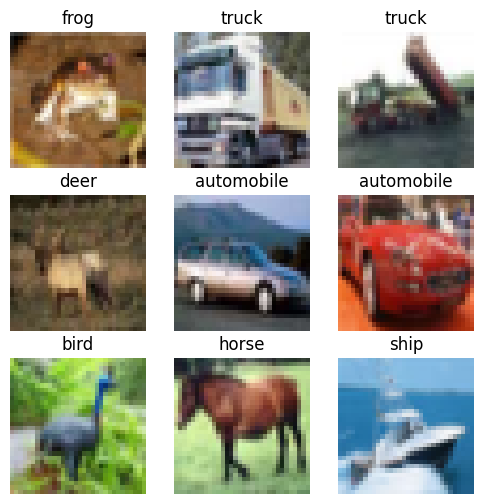

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
# x_train, y_train son los datos de entrenamiento (imágenes y etiquetas)
# x_test, y_test son los datos de prueba (imágenes y etiquetas)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Explorar la forma de los datos
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)
print("y_test shape:", y_test.shape)    # (10000, 1)
print("\f")

# Normalizar las imágenes al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a codificación one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualizar algunas imágenes para verificar que la carga está bien
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))  # Figura de 6x6 pulgadas
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

# Exploracion inicial y EDA

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)



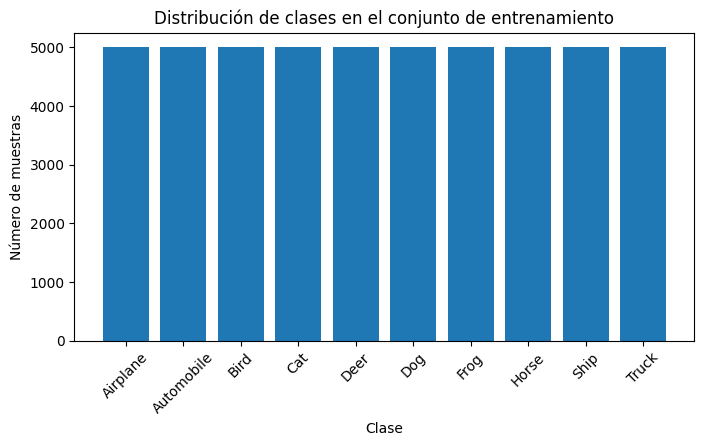

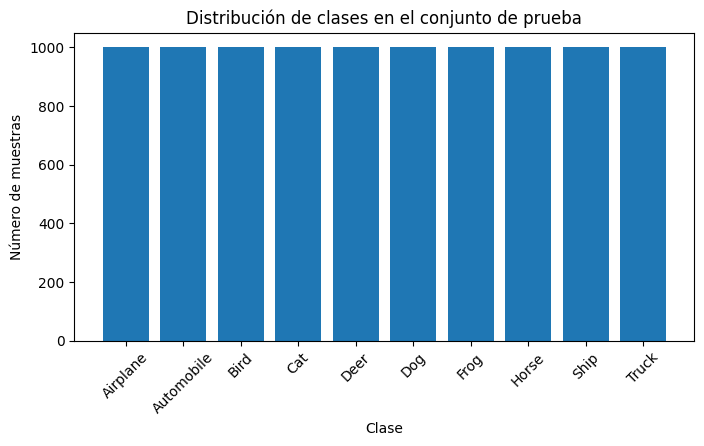

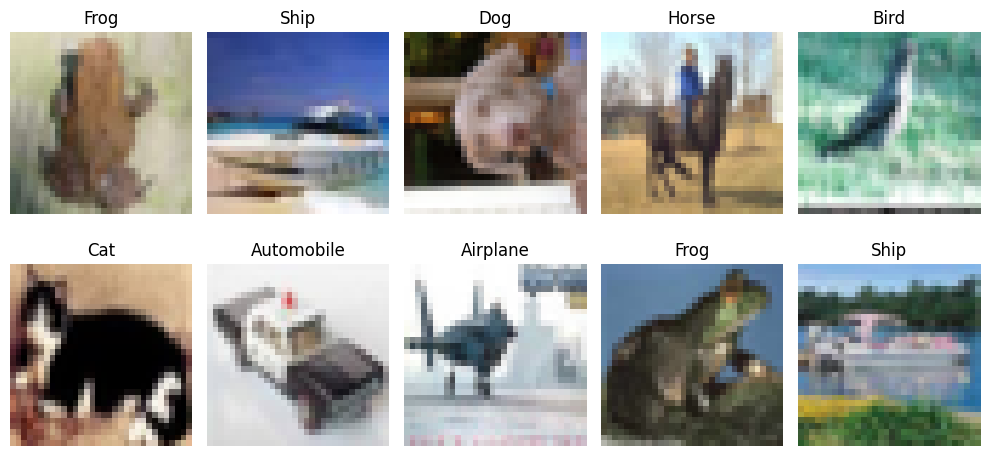


Media por canal en el set de entrenamiento: [0.4914009  0.48215896 0.4465308 ]
Desviación estándar por canal en el set de entrenamiento: [0.24703279 0.24348423 0.26158753]
Media por canal en el set de prueba: [0.49421427 0.4851322  0.45040992]
Desviación estándar por canal en el set de prueba: [0.24665268 0.24289216 0.2615922 ]


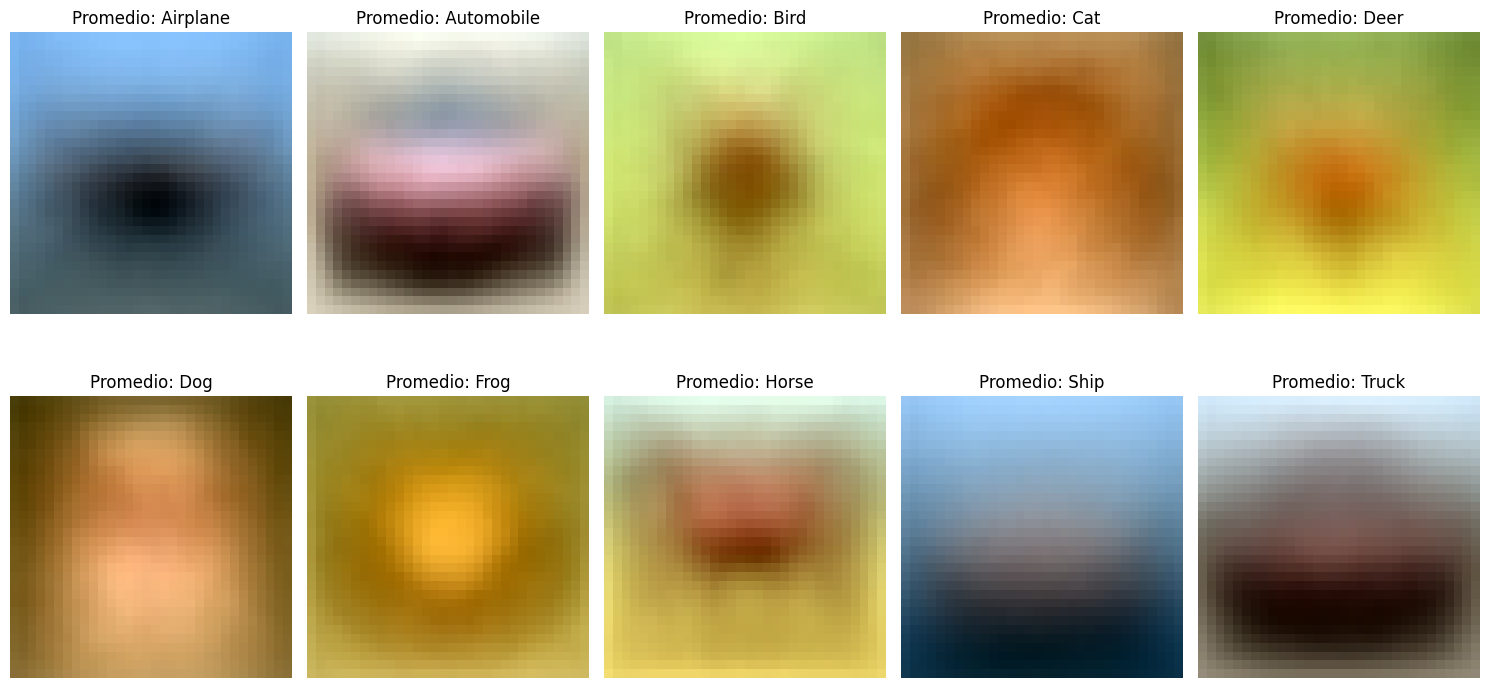

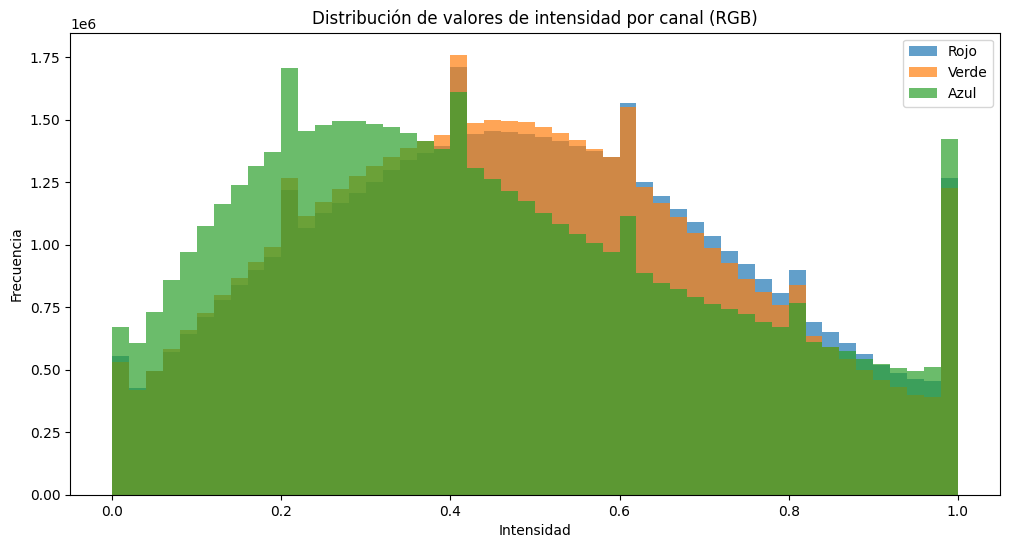

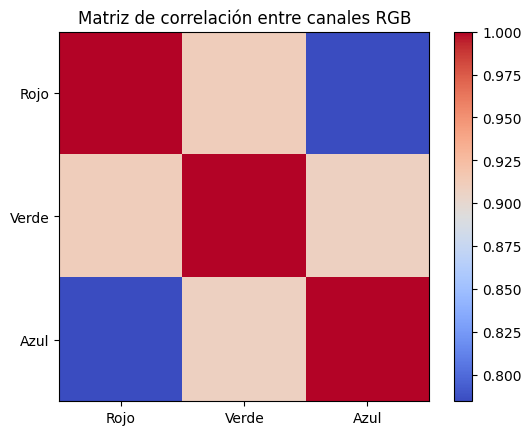

Valor máximo en el set de entrenamiento: 1.0
Valor mínimo en el set de entrenamiento: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Clases del conjunto de datos
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Información básica de los datos
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("\f")

# Distribución de clases en el conjunto de entrenamiento
y_train_int = np.argmax(y_train, axis=1)  # Convertir a etiquetas enteras
train_label_counts = np.bincount(y_train_int)
plt.figure(figsize=(8,4))
plt.bar(range(len(train_label_counts)), train_label_counts, tick_label=class_names)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.xticks(rotation=45)
plt.show()
print("\f")

# Distribución de clases en el conjunto de prueba
y_test_int = np.argmax(y_test, axis=1)
test_label_counts = np.bincount(y_test_int)
plt.figure(figsize=(8,4))
plt.bar(range(len(test_label_counts)), test_label_counts, tick_label=class_names)
plt.title("Distribución de clases en el conjunto de prueba")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.xticks(rotation=45)
plt.show()

# Visualización de muestras aleatorias
plt.figure(figsize=(10,5))
for i in range(10):
    index = random.randint(0, len(x_train)-1)
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[index])
    plt.title(class_names[y_train_int[index]])
    plt.axis('off')
plt.tight_layout()
plt.show()
print("\f")

# Estadísticas básicas del conjunto de entrenamiento
print("Media por canal en el set de entrenamiento:", x_train.mean(axis=(0,1,2)))
print("Desviación estándar por canal en el set de entrenamiento:", x_train.std(axis=(0,1,2)))

# Estadísticas básicas del conjunto de prueba
print("Media por canal en el set de prueba:", x_test.mean(axis=(0,1,2)))
print("Desviación estándar por canal en el set de prueba:", x_test.std(axis=(0,1,2)))

# Calcular la imagen promedio por clase
averages = []
for i in range(len(class_names)):
    class_indices = np.where(y_train_int == i)[0]
    if len(class_indices) > 0:  # Evitar clases vacías
        class_images = x_train[class_indices]
        class_mean = class_images.mean(axis=0)  # Promedio por clase
        averages.append(class_mean)

# Visualizar las imágenes promedio asegurando el rango correcto
plt.figure(figsize=(15,8))
for i, avg_img in enumerate(averages):
    plt.subplot(2, 5, i + 1)
    # Normalizar la imagen promedio para rango 0-255
    avg_img_normalized = ((avg_img - avg_img.min()) / (avg_img.max() - avg_img.min()) * 255).astype('uint8')
    plt.imshow(avg_img_normalized)
    plt.title(f"Promedio: {class_names[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Distribución de intensidades por canal (RGB)
colors = ['Rojo', 'Verde', 'Azul']
plt.figure(figsize=(12,6))
for i in range(3):  # Canales RGB
    plt.hist(x_train[:,:,:,i].ravel(), bins=50, alpha=0.7, label=colors[i])
plt.title("Distribución de valores de intensidad por canal (RGB)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Matriz de correlación entre canales RGB
x_train_reshaped = x_train.reshape(-1, 3)  # Reorganiza los píxeles en filas
correlation_matrix = np.corrcoef(x_train_reshaped.T)  # Matriz de correlación entre canales
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matriz de correlación entre canales RGB")
plt.xticks(range(3), colors)
plt.yticks(range(3), colors)
plt.show()

# Chequeo de valores atípicos
print("Valor máximo en el set de entrenamiento:", x_train.max())
print("Valor mínimo en el set de entrenamiento:", x_train.min())


# Crear y Entrenar el modelo


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # Primer bloque de convolución
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Segundo bloque de convolución
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Aplanamiento y capas densas finales
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases de CIFAR-10
])

model.summary()

# Compilacion del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,682 (658.91 KB)

 Trainable params: 168,682 (658.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 232ms/step - accuracy: 0.3077 - loss: 1.8734 - val_accuracy: 0.5327 - val_loss: 1.3039
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 224ms/step - accuracy: 0.5539 - loss: 1.2601 - val_accuracy: 0.6052 - val_loss: 1.1086
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.6426 - loss: 1.0279 - val_accuracy: 0.6504 - val_loss: 1.0028
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.6865 - loss: 0.8970 - val_accuracy: 0.6803 - val_loss: 0.9101
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 214ms/step - accuracy: 0.7263 - loss: 0.7791 - val_accuracy: 0.7006 - val_loss: 0.8788
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 214ms/step - accuracy: 0.7522 - loss: 0.7091 - val_accuracy: 0.7213 - val_loss: 0.8023
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.7768 - loss: 0.6428 - val_accuracy: 0.7280 - val_loss: 0.7874
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 211ms/step - accuracy: 0.7938 -

# Learning Curve/ Loss Curve

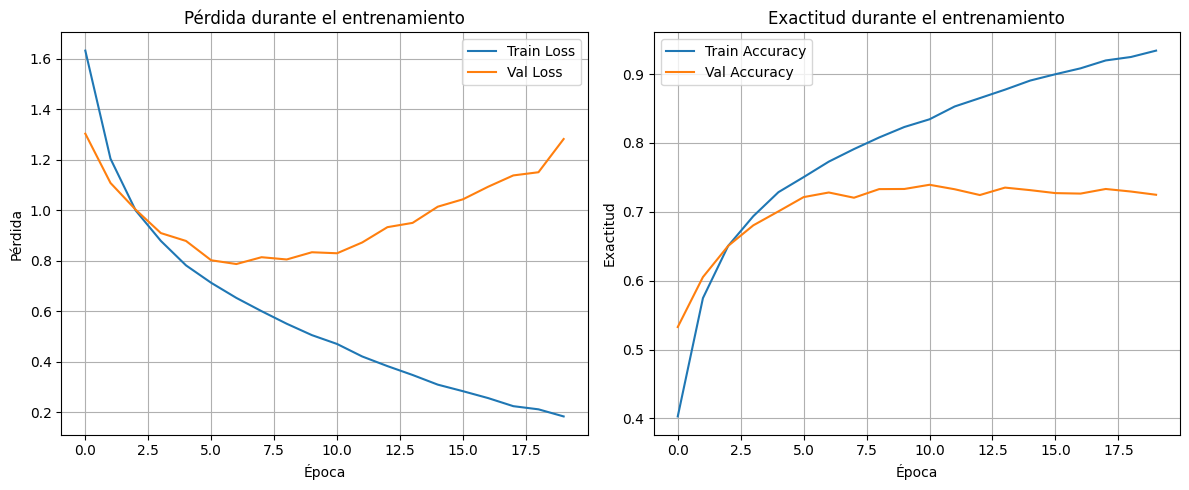

In [ ]:
import matplotlib.pyplot as plt

# Curva de pérdida (training vs validation)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['test_loss'], label='Test Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
print("\f")
# Curva de exactitud (training vs validation)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['test_accuracy'], label='Test Accuracy')
plt.title('Accuracy model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
print("\f")
plt.tight_layout()
plt.show()


# Evaluacion del modelo



Test Loss: 1.3122
Test Accuracy: 0.7219

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


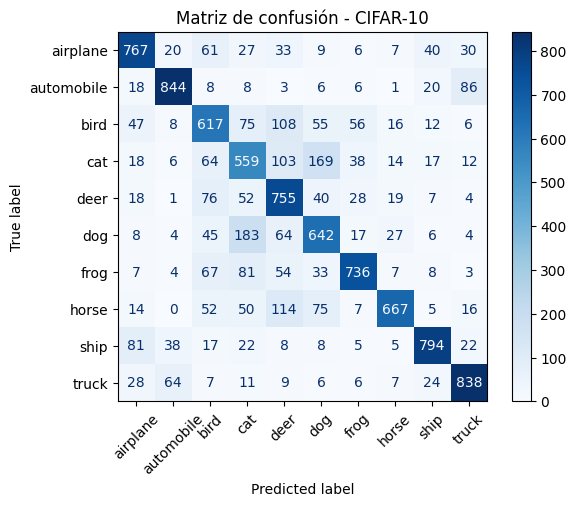


              precision    recall  f1-score   support

    airplane       0.76      0.77      0.76      1000
  automobile       0.85      0.84      0.85      1000
        bird       0.61      0.62      0.61      1000
         cat       0.52      0.56      0.54      1000
        deer       0.60      0.76      0.67      1000
         dog       0.62      0.64      0.63      1000
        frog       0.81      0.74      0.77      1000
       horse       0.87      0.67      0.75      1000
        ship       0.85      0.79      0.82      1000
       truck       0.82      0.84      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [ ]:
# Accuracy & Loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("\f")

# Confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir las clases de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion matrix - CIFAR-10")
plt.show()

# Precision, recall, F1-score, support
from sklearn.metrics import classification_report
print("\f")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


#Analisis del error


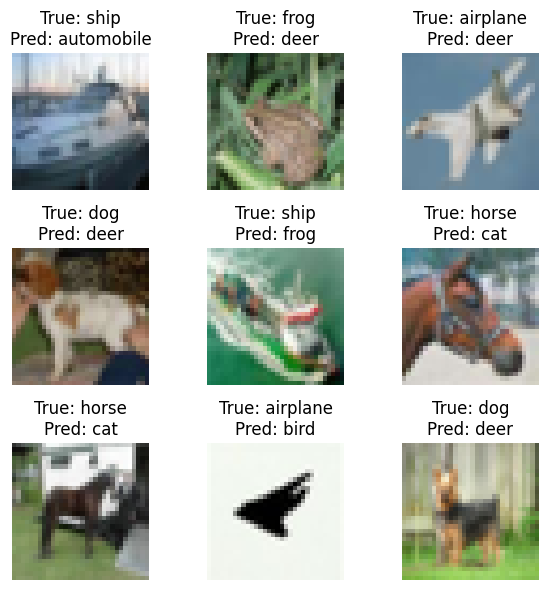

In [ ]:
#MOSTRAR IMAGENES MAL CLASIFICADAS
plt.figure(figsize=(6,6))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
#TASA DE ERROR POR CLASE
import numpy as np

error_rate_per_class = []
for c in range(len(class_names)):
    # Muestras de la clase c en test
    class_indices = np.where(y_true == c)[0]
    # Error en esa clase
    class_errors = np.sum(y_pred_classes[class_indices] != c)
    error_rate = class_errors / len(class_indices)
    error_rate_per_class.append(error_rate)

for c, err in zip(class_names, error_rate_per_class):
    print(f"Class: {c}, Error rate: {err:.2f}")

#ERRORES POR BRILLO INTENSIDAD O CONTRASTE
# Ejemplo simple: calcular la media de brillo (promedio de todos los pixeles) de las imágenes mal vs. bien clasificadas
correctly_classified_indices = np.where(y_pred_classes == y_true)[0]

brightness_misclassified = x_test[misclassified_indices].mean(axis=(1,2,3))
brightness_correct = x_test[correctly_classified_indices].mean(axis=(1,2,3))
print("\n")
print("Average brightness on misclassified images:", brightness_misclassified.mean())
print("Average brightness in well-sorted images:", brightness_correct.mean())


Clase: airplane, Tasa de error: 0.23
Clase: automobile, Tasa de error: 0.16
Clase: bird, Tasa de error: 0.38
Clase: cat, Tasa de error: 0.44
Clase: deer, Tasa de error: 0.24
Clase: dog, Tasa de error: 0.36
Clase: frog, Tasa de error: 0.26
Clase: horse, Tasa de error: 0.33
Clase: ship, Tasa de error: 0.21
Clase: truck, Tasa de error: 0.16


Media de brillo en imágenes mal clasificadas: 0.46397263
Media de brillo en imágenes bien clasificadas: 0.4814436


In [ ]:
#ESTIMAR LA COMPLEJIDAD DE LA MUESTRA
# Calcular entropía de las predicciones
from scipy.stats import entropy

entropies = entropy(y_pred, axis=1)  # entropía fila a fila
misclassified_entropies = entropies[misclassified_indices]
correct_entropies = entropies[correctly_classified_indices]

print("Mean entropy misclassified predictions:", misclassified_entropies.mean())
print("Average entropy correct predictions:", correct_entropies.mean())


Entropía media predicciones mal clasificadas: 0.5334502
Entropía media predicciones correctas: 0.17601599


# Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo en una función
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Configuración para cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
results = []

for train_index, val_index in kfold.split(x_train):
    print(f"Entrenando Fold {fold_no}...")

    # Dividir los datos en entrenamiento y validación
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Crear un nuevo modelo para cada fold
    model = create_model()

    # Entrenar el modelo
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=5, batch_size=64,  # Reducir epochs para pruebas rápidas
        validation_data=(x_val_fold, y_val_fold),
        verbose=1
    )

    # Evaluar en el conjunto de validación
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no}: Accuracy = {scores[1]*100:.2f}%")
    results.append(scores[1])

    fold_no += 1

# Resultados finales de cross-validation
print(f"\nResultados promedio de cross-validation:")
print(f"Accuracy promedio: {np.mean(results)*100:.2f}%")
print(f"Desviación estándar: {np.std(results)*100:.2f}%")


Entrenando Fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 194ms/step - accuracy: 0.3105 - loss: 1.8590 - val_accuracy: 0.5279 - val_loss: 1.3283
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 190ms/step - accuracy: 0.5398 - loss: 1.2837 - val_accuracy: 0.6002 - val_loss: 1.1185
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.6173 - loss: 1.0839 - val_accuracy: 0.6444 - val_loss: 1.0194
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.6746 - loss: 0.9378 - val_accuracy: 0.6901 - val_loss: 0.8806
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.7094 - loss: 0.8378 - val_accuracy: 0.6805 - val_loss: 0.9038
Fold 1: Accuracy = 68.05%
Entrenando Fold 2...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 191ms/step - accuracy: 0.3144 - loss: 1.8488 - val_accuracy: 0.5006 - val_loss: 1.3958
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - accuracy: 0.5425 - loss: 1.2836 - val_accuracy: 0.6040 - val_loss: 1.1158
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━

# Modelo 2.1 VGG16 Simplified




In [ ]:
!pip install --upgrade tensorflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.constraints import max_norm

# Parámetros
num_classes = 10
dropout = 0.5

# CIFAR-10 imágenes: 32x32x3
input_shape = (32, 32, 3)

# Input layer
input_image = Input(shape=input_shape)

# Block 1
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1')(input_image)
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (1,1), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block3_pool')(x)

x = Flatten(name='flatten')(x)

# Capas densas (reducidas para mejorar la accuracy)
x = Dense(512, activation='relu', kernel_constraint=max_norm(3), name='fc1')(x)
x = Dropout(dropout)(x)
x = Dense(512, activation='relu', kernel_constraint=max_norm(3), name='fc2')(x)
x = Dropout(dropout)(x)


out = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=input_image, outputs=out)

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,576,650 (13.64 MB)

 Trainable params: 3,576,650 (13.64 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [ ]:
#Entrenar el modelo
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Cargar datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar valores de píxeles al rango [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a codificación one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Callback para reducir la tasa de aprendizaje si no mejora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[reduce_lr]
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.1990 - loss: 2.0928 - val_accuracy: 0.4156 - val_loss: 1.5895 - learning_rate: 0.0010
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.4485 - loss: 1.4745 - val_accuracy: 0.5709 - val_loss: 1.1823 - learning_rate: 0.0010
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5903 - loss: 1.1493 - val_accuracy: 0.6476 - val_loss: 0.9995 - learning_rate: 0.0010
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6638 - loss: 0.9598 - val_accuracy: 0.6837 - val_loss: 0.9091 - learning_rate: 0.0010
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.7171 - loss: 0.8209 - val_accuracy: 0.7342 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.7638 - loss: 0.6916 - val_accuracy: 0.7424 - val_loss: 0.7502 - learning_rate: 0.0010
Epoch 7/20
196/196 ━━━━

Learning Curve/Loss Curve

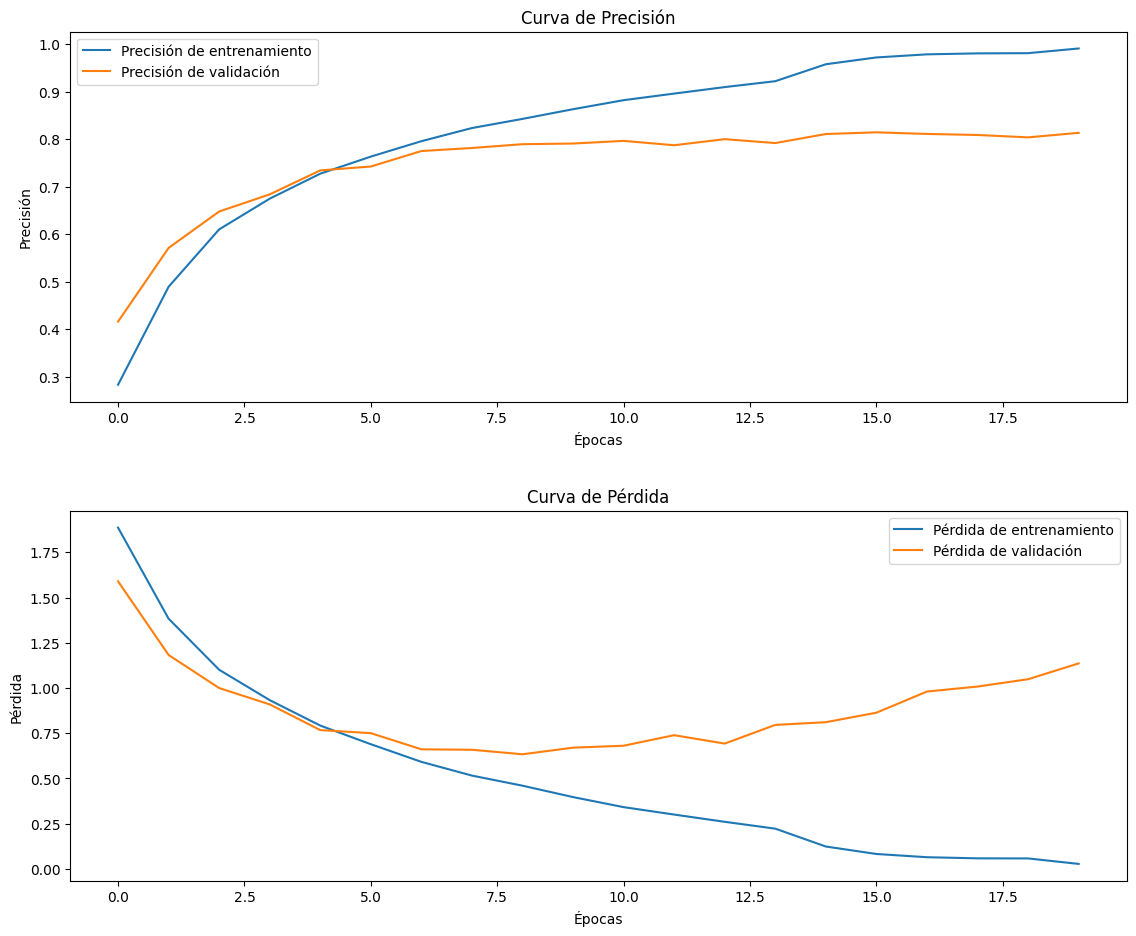

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Visualización de las curvas de aprendizaje
def plot_learning_curves(history):
    plt.figure(figsize=(12, 10))

    # Precisión
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Curva de Precisión')
    plt.legend()
    # Pérdida
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Curva de Pérdida')
    plt.legend()

    plt.tight_layout(pad=3.0)  # Espaciado entre gráficos
    plt.show()

# Visualizar las curvas de aprendizaje
plot_learning_curves(history)

Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


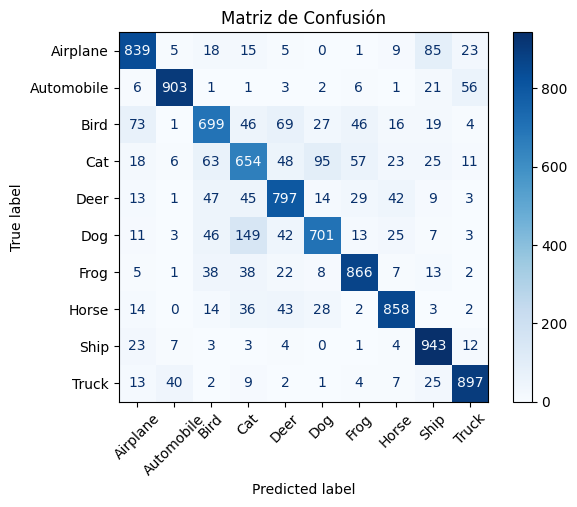



Reporte de Clasificación:
              precision    recall  f1-score   support

    Airplane       0.83      0.84      0.83      1000
  Automobile       0.93      0.90      0.92      1000
        Bird       0.75      0.70      0.72      1000
         Cat       0.66      0.65      0.66      1000
        Deer       0.77      0.80      0.78      1000
         Dog       0.80      0.70      0.75      1000
        Frog       0.84      0.87      0.86      1000
       Horse       0.86      0.86      0.86      1000
        Ship       0.82      0.94      0.88      1000
       Truck       0.89      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluación del modelo
def evaluate_model(model, x_test, y_test):
    # Predicciones
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Etiquetas de las clases
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Matriz de Confusión')
    plt.show()

    # Salto de línea entre salidas
    print("\n")

    # Reporte de clasificación
    print("Reporte de Clasificación:")
    report = classification_report(y_true, y_pred_classes, target_names=class_names)
    print(report)

# Evaluar el modelo y mostrar métricas
evaluate_model(model, x_test, y_test)


Error Analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Imágenes mal clasificadas:


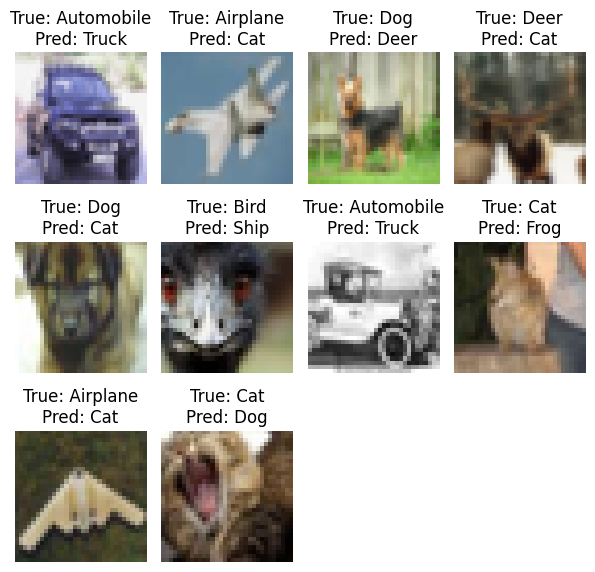

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluación del modelo
def evaluate_model(model, x_test, y_test):
    # Predicciones
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Etiquetas de las clases
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    # Salto de línea entre salidas
    print("\n")

    # Retornar resultados para uso posterior
    return y_true, y_pred_classes, class_names

# Evaluar el modelo y mostrar métricas
y_true, y_pred_classes, class_names = evaluate_model(model, x_test, y_test)

# Mostrar imágenes mal clasificadas
print("\nImágenes mal clasificadas:")
misclassified_indices = np.where(y_true != y_pred_classes)[0]

num_images_to_display = min(10, len(misclassified_indices))  # Mostrar hasta 10 imágenes
if num_images_to_display > 0:
    plt.figure(figsize=(6, 6))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron imágenes mal clasificadas.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Error medio por clase:
Clase: Airplane, Error medio: 16.10%
Clase: Automobile, Error medio: 9.70%
Clase: Bird, Error medio: 30.10%
Clase: Cat, Error medio: 34.60%
Clase: Deer, Error medio: 20.30%
Clase: Dog, Error medio: 29.90%
Clase: Frog, Error medio: 13.40%
Clase: Horse, Error medio: 14.20%
Clase: Ship, Error medio: 5.70%
Clase: Truck, Error medio: 10.30%




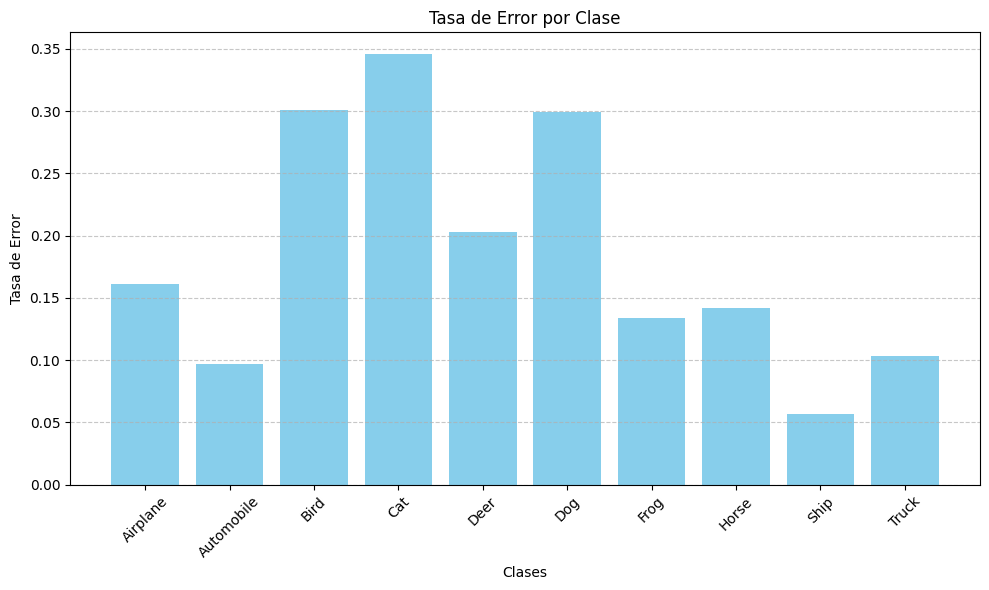

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calcular el error medio por clase
class_errors = 1 - (np.diag(conf_matrix) / np.sum(conf_matrix, axis=1))

# Nombres de las clases
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Mostrar el error medio por clase con el formato especificado
print("Error medio por clase:")
for i, class_name in enumerate(class_names):
    print(f"Clase: {class_name}, Error medio: {class_errors[i]:.2%}")

# Espacio de línea antes de la gráfica
print("\n")

# Visualizar los errores
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_errors, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Tasa de Error')
plt.title('Tasa de Error por Clase')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Modelo 2.2 VGG16 Libre

Create model

In [ ]:
!pip show tensorflow
!pip install tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
!pip uninstall jax jaxlib -y
!pip install --upgrade jax jaxlib


Found existing installation: jax 0.4.38
Uninstalling jax-0.4.38:
  Successfully uninstalled jax-0.4.38
Found existing installation: jaxlib 0.4.38
Uninstalling jaxlib-0.4.38:
  Successfully uninstalled jaxlib-0.4.38
  Using cached jax-0.4.38-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
Using cached jax-0.4.38-py3-none-any.whl (2.2 MB)
Using cached jaxlib-0.4.38-cp310-cp310-manylinux2014_x86_64.whl (101.7 MB)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



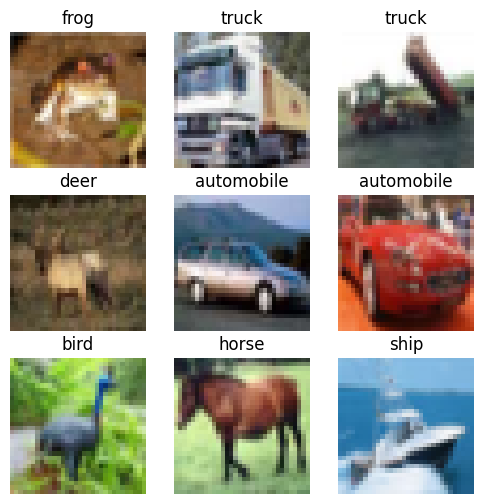

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
# x_train, y_train son los datos de entrenamiento (imágenes y etiquetas)
# x_test, y_test son los datos de prueba (imágenes y etiquetas)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Explorar la forma de los datos
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)
print("y_test shape:", y_test.shape)    # (10000, 1)
print("\f")

# Normalizar las imágenes al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a codificación one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualizar algunas imágenes para verificar que la carga está bien
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))  # Figura de 6x6 pulgadas
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.constraints import max_norm

# Parámetros
num_classes = 10
dropout = 0.5

# CIFAR-10 imágenes: 32x32x3
input_shape = (32, 32, 3)

# Input layer
input_image = Input(shape=input_shape)

# Block 1
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1')(input_image)
x = Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (1,1), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (1,1), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (1,1), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block5_pool')(x)

x = Flatten(name='flatten')(x)

# Capas densas
x = Dense(512, activation='relu', kernel_constraint=max_norm(3), name='fc1')(x)
x = Dropout(dropout)(x)
x = Dense(512, activation='relu', kernel_constraint=max_norm(3), name='fc2')(x)
x = Dropout(dropout)(x)

out = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=input_image, outputs=out)

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,526,538 (40.16 MB)

 Trainable params: 10,526,538 (40.16 MB)

 Non-trainable params: 0 (0.00 B)

Train model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# 1. Definir la tasa de aprendizaje inicial cuando creas el optimizador
initial_lr = 1e-4  # Ajusta según tu preferencia
optimizer = Adam(learning_rate=initial_lr)

# 2. Compilar el modelo
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Definir el callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # métrica que vigilas, puede ser 'val_accuracy'
    factor=0.5,          # factor de reducción (a la mitad en este caso)
    patience=5,          # épocas que esperas sin mejora antes de reducir
    min_lr=1e-6,         # learning rate mínimo
    verbose=1            # imprimir mensajes cuando reduzca
)

# 4. Entrenar tu modelo usando el callback
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr]  # <-- Aquí se activa la reducción automática del LR
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.1802 - loss: 2.1022 - val_accuracy: 0.3904 - val_loss: 1.5621 - learning_rate: 1.0000e-04
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.3822 - loss: 1.5875 - val_accuracy: 0.5098 - val_loss: 1.3135 - learning_rate: 1.0000e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5340 - loss: 1.2906 - val_accuracy: 0.6115 - val_loss: 1.0917 - learning_rate: 1.0000e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.6289 - loss: 1.0538 - val_accuracy: 0.6537 - val_loss: 0.9917 - learning_rate: 1.0000e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.6925 - loss: 0.8742 - val_accuracy: 0.6946 - val_loss: 0.8759 - learning_rate: 1.0000e-04
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7347 - loss: 0.7679 - val_accuracy: 0.7175 - val_loss: 0.8231 - learning_rate: 1.0000e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/ste

Learning Curve/ Loss Curve

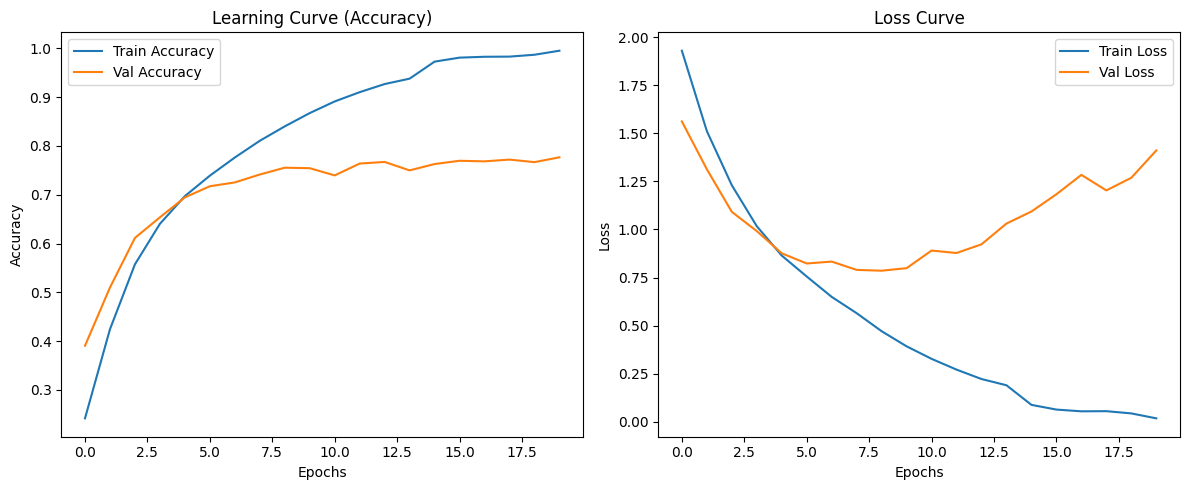

In [ ]:
import matplotlib.pyplot as plt

# Curvas de exactitud
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Curvas de pérdidas
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

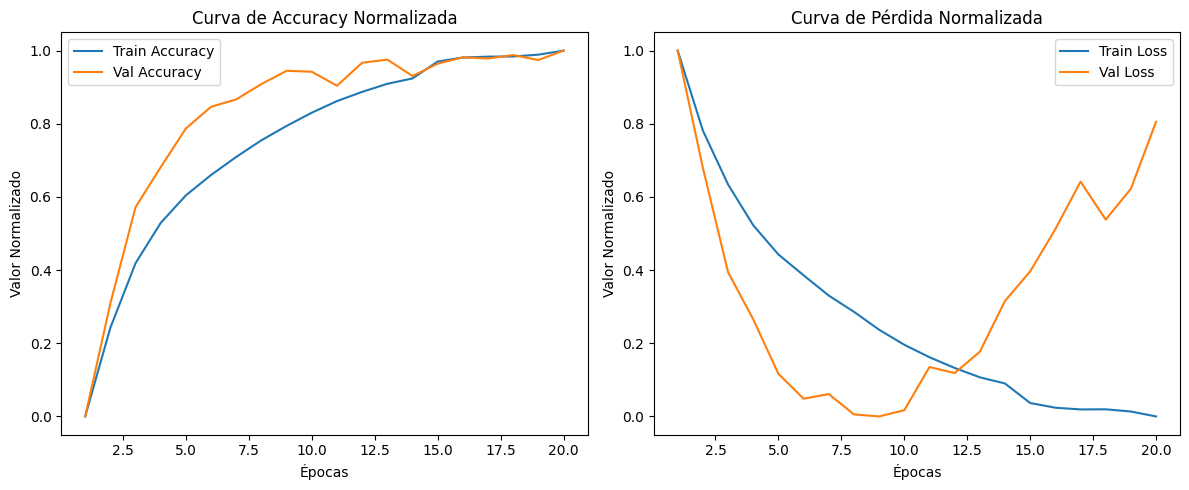

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Imaginemos que ya has entrenado tu modelo y guardaste el history.
# Por ejemplo:
# history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Extraer las métricas del history
acc_train = np.array(history.history['accuracy'])
acc_val   = np.array(history.history['val_accuracy'])
loss_train = np.array(history.history['loss'])
loss_val   = np.array(history.history['val_loss'])

# Función para normalizar un vector entre 0 y 1
def min_max_scale(values):
    min_v = np.min(values)
    max_v = np.max(values)
    if max_v == min_v:
        # Si, por algún motivo, los valores son todos iguales, evitar división por cero
        return np.zeros_like(values)
    return (values - min_v) / (max_v - min_v)

# Normalizar cada conjunto de datos
acc_train_norm = min_max_scale(acc_train)
acc_val_norm   = min_max_scale(acc_val)
loss_train_norm = min_max_scale(loss_train)
loss_val_norm   = min_max_scale(loss_val)

epochs = range(1, len(acc_train) + 1)

# Gráfico: Accuracy y Loss normalizados en subplots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc_train_norm, label='Train Accuracy')
plt.plot(epochs, acc_val_norm, label='Val Accuracy')
plt.title('Curva de Accuracy Normalizada')
plt.xlabel('Épocas')
plt.ylabel('Valor Normalizado')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss_train_norm, label='Train Loss')
plt.plot(epochs, loss_val_norm, label='Val Loss')
plt.title('Curva de Pérdida Normalizada')
plt.xlabel('Épocas')
plt.ylabel('Valor Normalizado')
plt.legend()

plt.tight_layout()
plt.show()


Model Evaluation

Test Loss: 1.4111
Test Accuracy: 0.7768
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


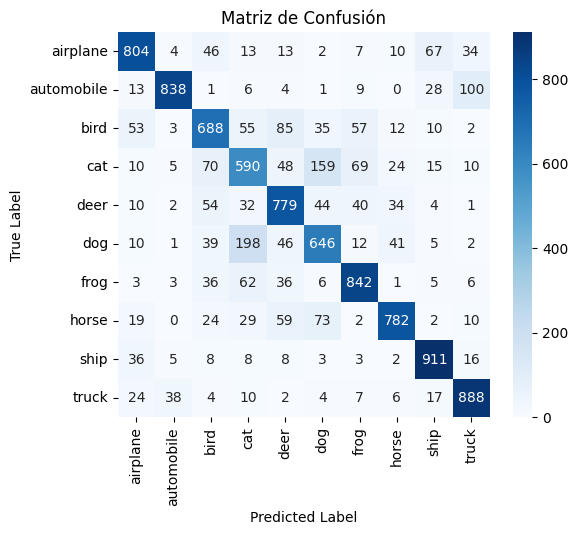

Clasification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.80      0.81      1000
  automobile       0.93      0.84      0.88      1000
        bird       0.71      0.69      0.70      1000
         cat       0.59      0.59      0.59      1000
        deer       0.72      0.78      0.75      1000
         dog       0.66      0.65      0.65      1000
        frog       0.80      0.84      0.82      1000
       horse       0.86      0.78      0.82      1000
        ship       0.86      0.91      0.88      1000
       truck       0.83      0.89      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluar en el test set para obtener Loss y Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2. Obtener las predicciones del modelo
y_pred = model.predict(x_test)
# Convertirlas a clases predichas (enteros)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir las etiquetas verdaderas (one-hot) a enteros
y_true = np.argmax(y_test, axis=1)

# 3. Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)


# (Opcional) Graficar la matriz de confusión de forma más amigable
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Classification Report (Precision, Recall, F1-score, Support)
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Clasification Report:")
print(report)

Error analysis

Total de imágenes mal clasificadas: 2232


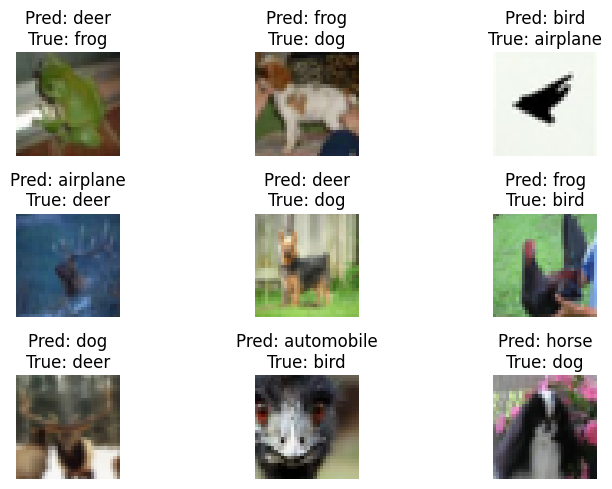

In [ ]:
#MOSTRAR IMAGENES MAL CLASIFICADAS
import matplotlib.pyplot as plt
import numpy as np

# Obtener los índices de las imágenes mal clasificadas
misclassified_indices = np.where(y_pred_classes != y_true)[0]
print(f"Total de imágenes mal clasificadas: {len(misclassified_indices)}")

# Seleccionar cuántas mostrar (por ejemplo, 9)
num_to_show = 9
misclassified_indices = misclassified_indices[:num_to_show]

# Graficar las imágenes mal clasificadas
plt.figure(figsize=(8,5))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(3, 3, i+1)
    # Si x_test está en [0,1], plt.imshow lo maneja correctamente
    plt.imshow(x_test[idx])
    plt.title(
        f"Pred: {class_names[y_pred_classes[idx]]}\n"
        f"True: {class_names[y_true[idx]]}"
    )
    plt.axis('off')

plt.tight_layout()
plt.show()


Clase: airplane
  Ejemplos totales: 1000
  Bien clasificados: 804
  Tasa de error: 0.1960

Clase: automobile
  Ejemplos totales: 1000
  Bien clasificados: 838
  Tasa de error: 0.1620

Clase: bird
  Ejemplos totales: 1000
  Bien clasificados: 688
  Tasa de error: 0.3120

Clase: cat
  Ejemplos totales: 1000
  Bien clasificados: 590
  Tasa de error: 0.4100

Clase: deer
  Ejemplos totales: 1000
  Bien clasificados: 779
  Tasa de error: 0.2210

Clase: dog
  Ejemplos totales: 1000
  Bien clasificados: 646
  Tasa de error: 0.3540

Clase: frog
  Ejemplos totales: 1000
  Bien clasificados: 842
  Tasa de error: 0.1580

Clase: horse
  Ejemplos totales: 1000
  Bien clasificados: 782
  Tasa de error: 0.2180

Clase: ship
  Ejemplos totales: 1000
  Bien clasificados: 911
  Tasa de error: 0.0890

Clase: truck
  Ejemplos totales: 1000
  Bien clasificados: 888
  Tasa de error: 0.1120



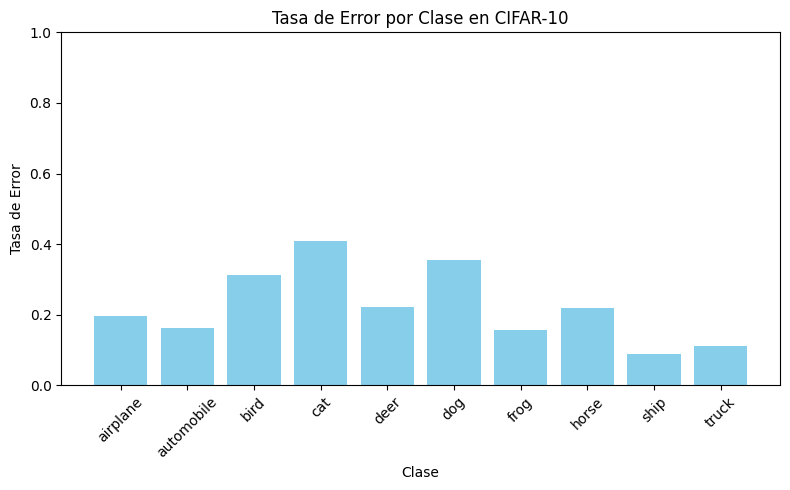

In [ ]:
#TASA DE ERROR POR CLASE
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(class_names)  # Para CIFAR-10 = 10

# Calcular y almacenar las tasas de error por clase
error_rates = []

for i in range(num_classes):
    # Índices de todos los ejemplos cuya clase real es i
    idx = np.where(y_true == i)[0]

    # Cuántos de ellos se clasificaron correctamente
    correct = np.sum(y_pred_classes[idx] == i)

    # Total de ejemplos de la clase i
    total = len(idx)

    # Tasa de error para la clase i = 1 - exactitud
    error_class_i = 1.0 - (correct / total)
    error_rates.append(error_class_i)

    # Mostrar datos en consola
    print(f"Clase: {class_names[i]}")
    print(f"  Ejemplos totales: {total}")
    print(f"  Bien clasificados: {correct}")
    print(f"  Tasa de error: {error_class_i:.4f}\n")

# Graficar la tasa de error por clase en un diagrama de barras
plt.figure(figsize=(8,5))
plt.bar(range(num_classes), error_rates, color='skyblue')
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel("Clase")
plt.ylabel("Tasa de Error")
plt.title("Tasa de Error por Clase en CIFAR-10")
plt.ylim([0, 1])  # Ajusta según prefieras
plt.tight_layout()
plt.show()



# Modelo 2.3 ConvNeXtTiny(Pre-Train)

Procesado de Datos

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import convnext

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convertir las etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Parámetros
batch_size = 64
image_size = (224, 224)  # Tamaño requerido por ConvNeXt

# Función de preprocesamiento
def preprocess_image(image, label):
    # Redimensionar a 224x224
    image = tf.image.resize(image, image_size)
    # Aplicar preprocesamiento específico de ConvNeXt
    image = convnext.preprocess_input(image)
    return image, label

# Crear un pipeline de datos eficiente con tf.data
def create_dataset(images, labels, batch_size, shuffle=True):
    # Crear el dataset inicial
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(images))
    # Aplicar el preprocesamiento
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # Dividir en lotes y optimizar el pipeline
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Crear datasets para entrenamiento y prueba
train_dataset = create_dataset(x_train, y_train, batch_size)
test_dataset = create_dataset(x_test, y_test, batch_size, shuffle=False)

# Verificar un lote
for images, labels in train_dataset.take(1):
    print(f"Shape de las imágenes: {images.shape}")
    print(f"Shape de las etiquetas: {labels.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Shape de las imágenes: (64, 224, 224, 3)
Shape de las etiquetas: (64, 10)


Creación del Modelo ConvNeXtTiny

In [2]:
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras import layers, models

def create_convnext_tiny(num_classes=10, dropout_rate=0.5):
    """
    Crea un modelo basado en ConvNeXt-Tiny preentrenado en ImageNet, adaptado para CIFAR-10.
    """
    # Cargar el modelo base ConvNeXt-Tiny
    base_model = ConvNeXtTiny(
        include_top=False,  # Excluir la capa superior preentrenada
        weights="imagenet", # Usar pesos preentrenados en ImageNet
        input_shape=(224, 224, 3)  # Tamaño de entrada requerido por ConvNeXt-Tiny
    )

    # Congelar el modelo base
    base_model.trainable = False

    # Construir el modelo completo
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),               # Reduce las dimensiones espaciales
        layers.Dense(128, activation="relu"),          # Capa densa intermedia
        layers.Dropout(dropout_rate),                  # Regularización para evitar sobreajuste
        layers.Dense(num_classes, activation="softmax")  # Capa de salida con softmax
    ])

    return model

# Crear el modelo
model = create_convnext_tiny()
model.summary()


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)           │ (None, 7, 7, 768)           │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 768)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,919,850 (106.51 MB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

Entrenar modelo

In [3]:
# Compilar el modelo
model.compile(
    optimizer="adam",                       # Optimizador Adam
    loss="categorical_crossentropy",        # Pérdida para clasificación multiclase
    metrics=["accuracy"]                    # Métrica de precisión
)

# Entrenar el modelo
history = model.fit(
    train_dataset,                          # Dataset de entrenamiento (generador)
    validation_data=test_dataset,           # Dataset de prueba (generador)
    epochs=10,                              # Número de épocas
    verbose=1                               # Mostrar detalles del entrenamiento
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 267s 317ms/step - accuracy: 0.7804 - loss: 0.6831 - val_accuracy: 0.9080 - val_loss: 0.2682
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 235s 294ms/step - accuracy: 0.9068 - loss: 0.2836 - val_accuracy: 0.9170 - val_loss: 0.2413
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 295ms/step - accuracy: 0.9179 - loss: 0.2460 - val_accuracy: 0.9186 - val_loss: 0.2347
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 295ms/step - accuracy: 0.9255 - loss: 0.2237 - val_accuracy: 0.9230 - val_loss: 0.2272
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 231s 295ms/step - accuracy: 0.9304 - loss: 0.2037 - val_accuracy: 0.9245 - val_loss: 0.2208
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 265s 299ms/step - accuracy: 0.9347 - loss: 0.1919 - val_accuracy: 0.9270 - val_loss: 0.2166
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 298ms/step - accuracy: 0.9384 - loss: 0.1816 - val_accuracy: 0.9241 - val_loss: 0.2188
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 231s 295ms/step - accuracy: 0.9398 -

Learning Curve/ Loss Curve

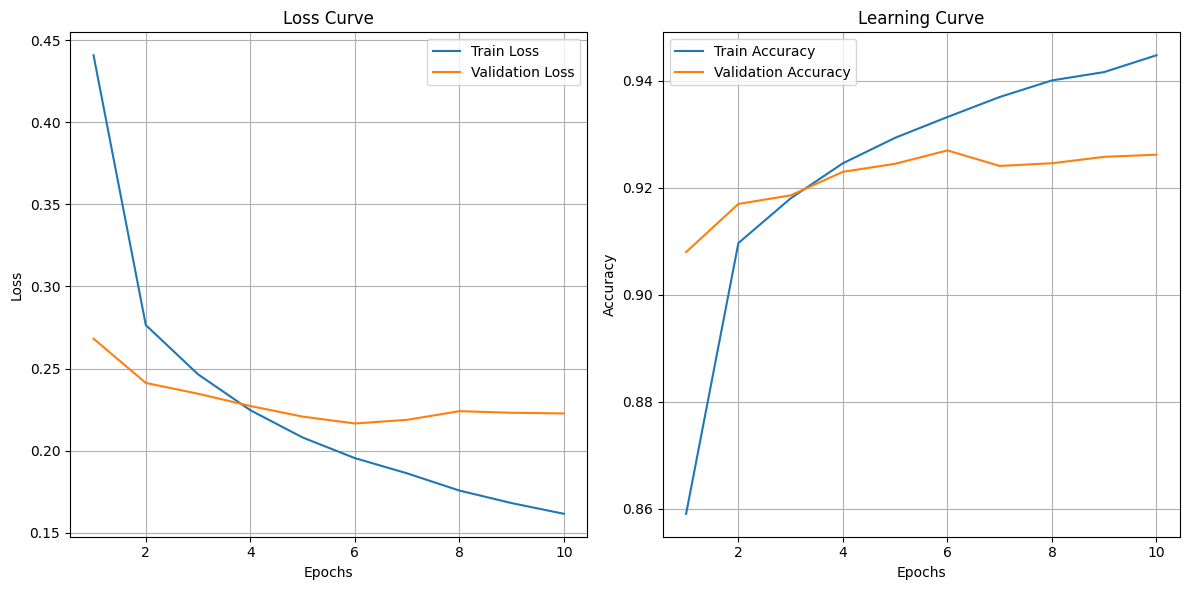

In [4]:
import matplotlib.pyplot as plt

# Función para graficar las learning curves y loss curves
def plot_training_history(history):
    """
    Genera gráficas de las curvas de pérdida (loss) y precisión (accuracy)
    a partir del historial de entrenamiento de Keras.
    """
    # Extraer datos del historial
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Gráfica de pérdida
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Gráfica de precisión
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Train Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Llamar a la función con el historial de entrenamiento
plot_training_history(history)


Model Evaluation

157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 244ms/step - accuracy: 0.9239 - loss: 0.2296
Test Loss: 0.2227
Test Accuracy: 92.62%
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 244ms/step


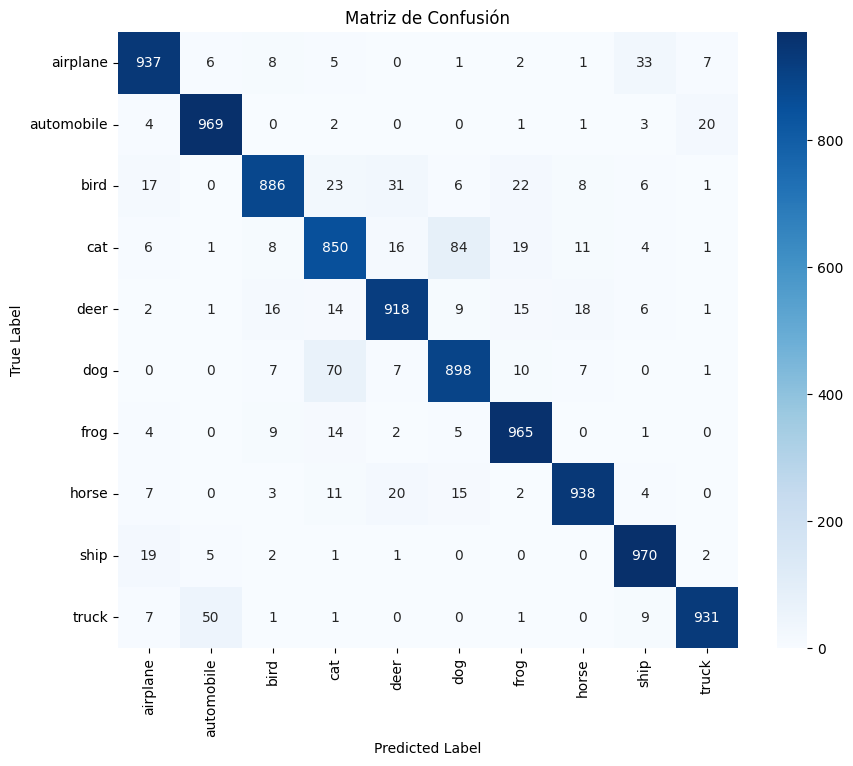


Classification Report:

              precision    recall  f1-score   support

    airplane       0.93      0.94      0.94      1000
  automobile       0.94      0.97      0.95      1000
        bird       0.94      0.89      0.91      1000
         cat       0.86      0.85      0.85      1000
        deer       0.92      0.92      0.92      1000
         dog       0.88      0.90      0.89      1000
        frog       0.93      0.96      0.95      1000
       horse       0.95      0.94      0.95      1000
        ship       0.94      0.97      0.95      1000
       truck       0.97      0.93      0.95      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

# Mostrar test loss y accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# Obtener predicciones
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases
y_true = np.concatenate([np.argmax(labels.numpy(), axis=1) for _, labels in test_dataset], axis=0)  # Etiquetas reales

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Definir los nombres de las clases de CIFAR-10
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cifar10_labels, yticklabels=cifar10_labels)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Informe de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=cifar10_labels)
print("\nClassification Report:\n")
print(class_report)


Modelo del error

Error rate per class:
airplane: 6.30%
automobile: 3.10%
bird: 11.40%
cat: 15.00%
deer: 8.20%
dog: 10.20%
frog: 3.50%
horse: 6.20%
ship: 3.00%
truck: 6.90%


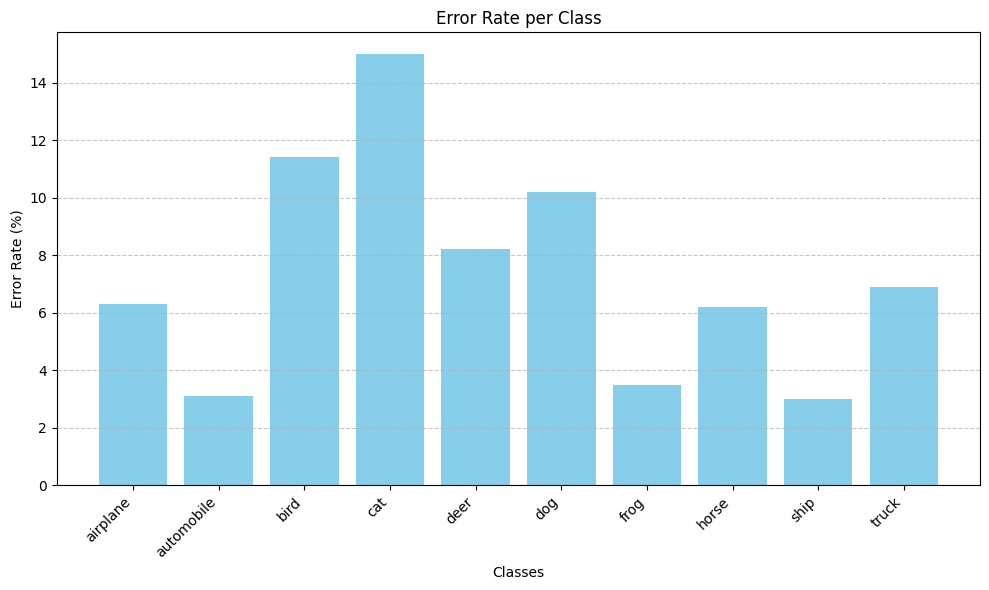

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def error_analysis_per_class(y_true, y_pred, class_names):
    """
    Calcula el porcentaje de errores por clase y genera una gráfica.

    Args:
        y_true: Etiquetas reales (numpy array).
        y_pred: Etiquetas predichas (numpy array).
        class_names: Lista con los nombres de las clases.
    """
    # Inicializar contadores
    total_per_class = np.zeros(len(class_names))
    incorrect_per_class = np.zeros(len(class_names))

    # Contar los ejemplos totales y los errores por clase
    for true, pred in zip(y_true, y_pred):
        total_per_class[true] += 1
        if true != pred:
            incorrect_per_class[true] += 1

    # Calcular porcentaje de errores por clase
    error_rates = (incorrect_per_class / total_per_class) * 100

    # Imprimir tasas de error por clase
    print("Error rate per class:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {error_rates[i]:.2f}%")

    # Graficar los errores por clase
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, error_rates, color='skyblue')
    plt.title("Error Rate per Class")
    plt.xlabel("Classes")
    plt.ylabel("Error Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Definir los nombres de las clases
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Obtener etiquetas reales y predicciones
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.concatenate(
    [np.argmax(labels.numpy(), axis=1) for _, labels in test_dataset], axis=0
)

# Llamar a la función de análisis de errores
error_analysis_per_class(y_true_classes, y_pred_classes, cifar10_labels)


# Modelo 2.4 ResNet





Procesamiento de datos con normalizacion [-1,1]

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



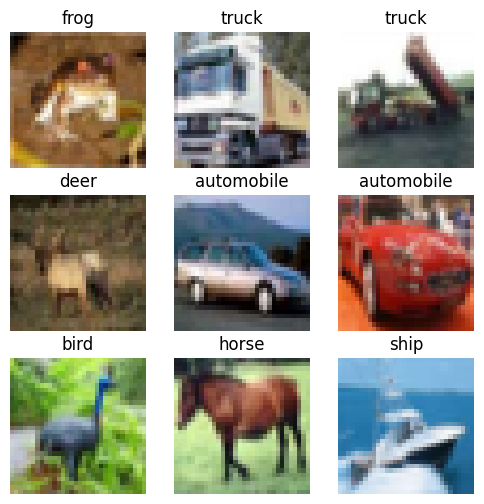

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Explorar la forma de los datos
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)
print("y_test shape:", y_test.shape)    # (10000, 1)
print("\f")

# Normalizar las imágenes al rango [-1, 1]
x_train = x_train.astype('float32') / 127.5 - 1
x_test = x_test.astype('float32') / 127.5 - 1

# Convertir las etiquetas a codificación one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualizar algunas imágenes para verificar que la carga está bien
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))  # Figura de 6x6 pulgadas
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow((x_train[i] + 1) / 2, interpolation='nearest')  # Desnormalizar para mostrar imágenes correctamente
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)




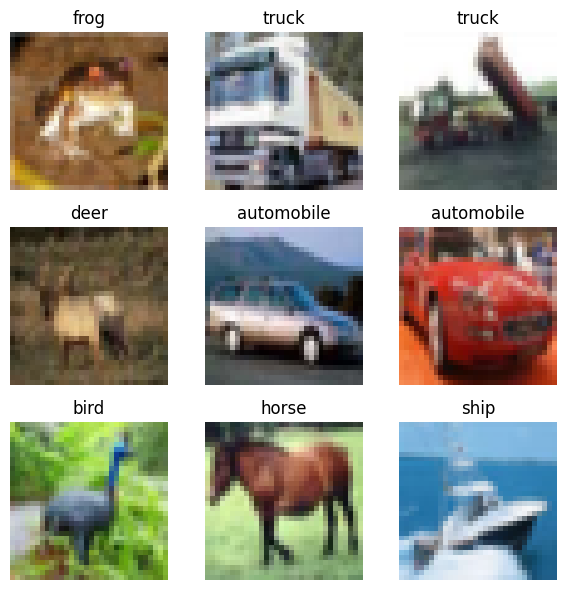

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# --- CARGAR EL DATASET CIFAR-10 ---
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# --- IMPRIMIR FORMAS DE LOS DATOS ---
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)
print("y_test shape:", y_test.shape)    # (10000, 1)
print("\n")

# --- NORMALIZACIÓN PARA RESNET50 ---
# Convertir al rango esperado [0, 255] y aplicar `preprocess_input` dentro del modelo
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# --- CODIFICACIÓN ONE-HOT PARA LAS ETIQUETAS ---
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# --- VISUALIZAR 9 IMÁGENES DE MUESTRA ---
# Visualización de imágenes desnormalizadas para asegurar colores correctos
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))  # Tamaño de la figura
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i] / 255.0)  # Normalizar para visualización [0, 1]
    plt.title(class_names[y_train[i].argmax()])  # Mostrar etiqueta
    plt.axis('off')
plt.tight_layout()
plt.show()


Crear Modelo ResNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Resizing

# --- CREACIÓN DEL MODELO ---
def create_resnet50_cifar10_fine_tune(input_shape=(32, 32, 3), num_classes=10, dropout_rate=0.5):
    """
    Crea un modelo ResNet50 preentrenado y lo ajusta para CIFAR-10, habilitando Fine-Tuning.
    """
    # Redimensionar las imágenes para que se adapten a ResNet50 (224x224x3)
    resize_layer = tf.keras.layers.Resizing(224, 224, name="resize_layer")

    # Añadir capa de preprocesamiento para ResNet50
    preprocess_layer = tf.keras.applications.resnet50.preprocess_input

    # Cargar el modelo base ResNet50 preentrenado en ImageNet
    base_model = tf.keras.applications.ResNet50(
        include_top=False,               # Excluye la capa de clasificación preentrenada
        weights="imagenet",              # Pesos preentrenados en ImageNet
        input_shape=(224, 224, 3)        # Tamaño estándar de entrada de ResNet50
    )

    # Congelar inicialmente todas las capas del modelo base
    base_model.trainable = False

    # Definir la entrada
    inputs = Input(shape=input_shape, name="input_layer")

    # Pasar la entrada por las capas de redimensionamiento, preprocesamiento y el modelo base
    x = resize_layer(inputs)
    x = preprocess_layer(x)  # Aplicar preprocesamiento esperado por ResNet50
    x = base_model(x, training=False)

    # Añadir capas personalizadas
    x = GlobalAveragePooling2D(name="global_avg_pool")(x)  # Reduce las dimensiones espaciales
    x = Dropout(dropout_rate, name="dropout")(x)           # Añade regularización
    outputs = Dense(num_classes, activation="softmax", name="output_layer")(x)  # Capa de clasificación

    # Construir el modelo inicial (con capas congeladas)
    model = Model(inputs=inputs, outputs=outputs, name="ResNet50_CIFAR10")

    # Descongelar parcialmente el modelo base para Fine-Tuning
    base_model.trainable = True
    for layer in base_model.layers[:-30]:  # Congelar capas inferiores
        layer.trainable = False

    # Mostrar el resumen del modelo
    model.summary()

    return model

# Crear el modelo con Fine-Tuning habilitado
model = create_resnet50_cifar10_fine_tune(input_shape=(32, 32, 3), num_classes=10)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "ResNet50_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resize_layer (Resizing)   │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ resize_layer[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ resize_layer[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ resize_layer[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_avg_pool           │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ global_avg_pool[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer (Dense)      │ (None, 10)             │         20,490 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 14,470,666 (55.20 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

Entrenar Modelo

In [ ]:
# --- ENTRENAMIENTO CON FINE-TUNING ---
def train_resnet50_cifar10_fine_tune(model, x_train, y_train, x_test, y_test, learning_rate=1e-5, epochs=20, batch_size=64):
    """
    Entrena el modelo ResNet50 con CIFAR-10 y Fine-Tuning habilitado.
    """
    # Compilar el modelo con un learning rate bajo para Fine-Tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # Optimizador Adam con LR bajo
        loss="categorical_crossentropy",                                 # Pérdida para clasificación multiclase
        metrics=["accuracy"]                                             # Métrica de evaluación
    )

    # Configurar callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,               # Detener si no hay mejoras tras 5 épocas
        restore_best_weights=True # Restaurar los mejores pesos
    )
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_resnet50_fine_tune.keras",
        monitor="val_loss",
        save_best_only=True
    )
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )

    # Entrenar el modelo
    history = model.fit(
        x_train, y_train,                   # Datos de entrenamiento
        validation_data=(x_test, y_test),   # Datos de validación
        epochs=epochs,                      # Número de épocas
        batch_size=batch_size,              # Tamaño de batch
        callbacks=[early_stopping, model_checkpoint, lr_scheduler],
        verbose=1                           # Nivel de información (1 = detallado)
    )
    return history

# Ejecutar el entrenamiento con Fine-Tuning
history = train_resnet50_cifar10_fine_tune(
    model=model,
    x_train=x_train, y_train=y_train,   # Datos de entrenamiento
    x_test=x_test, y_test=y_test,       # Datos de validación
    epochs=20,                          # Número de épocas
    batch_size=64                       # Tamaño de batch
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 234s 263ms/step - accuracy: 0.5277 - loss: 1.4626 - val_accuracy: 0.8954 - val_loss: 0.3088 - learning_rate: 1.0000e-05
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 223ms/step - accuracy: 0.8834 - loss: 0.3477 - val_accuracy: 0.9187 - val_loss: 0.2389 - learning_rate: 1.0000e-05
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 228ms/step - accuracy: 0.9273 - loss: 0.2185 - val_accuracy: 0.9297 - val_loss: 0.2114 - learning_rate: 1.0000e-05
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 217s 247ms/step - accuracy: 0.9512 - loss: 0.1475 - val_accuracy: 0.9327 - val_loss: 0.2081 - learning_rate: 1.0000e-05
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 220ms/step - accuracy: 0.9701 - loss: 0.0946 - val_accuracy: 0.9348 - val_loss: 0.2096 - learning_rate: 1.0000e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 221s 245ms/step - accuracy: 0.9823 - loss: 0.0569 - val_accuracy: 0.9360 - val_loss: 0.2178 - learning_rate: 1.0000e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 

Learning Curve/ Loss Curve

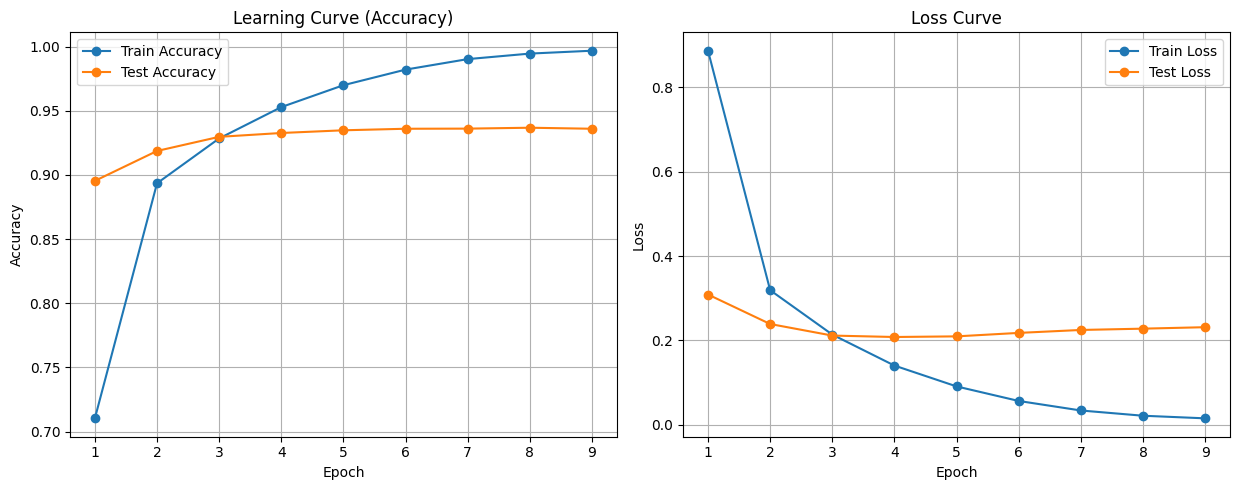

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    """
    Dibuja las curvas de accuracy y loss para entrenamiento y validación.
    """
    # Extraer datos del historial
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    # Tamaño de las figuras
    plt.figure(figsize=(12.5, 5))

    # Subplot 1: Learning Curve (accuracy)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, label='Train Accuracy', marker='o')
    plt.plot(epochs, val_accuracy, label='Test Accuracy', marker='o')
    plt.title('Learning Curve (Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Loss Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss', marker='o')
    plt.plot(epochs, val_loss, label='Test Loss', marker='o')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# Llamar a la función con el historial
plot_learning_curves(history)

Evaluacion del modelo

Test Loss: 0.2081
Test Accuracy: 0.9327

Confusion Matrix:



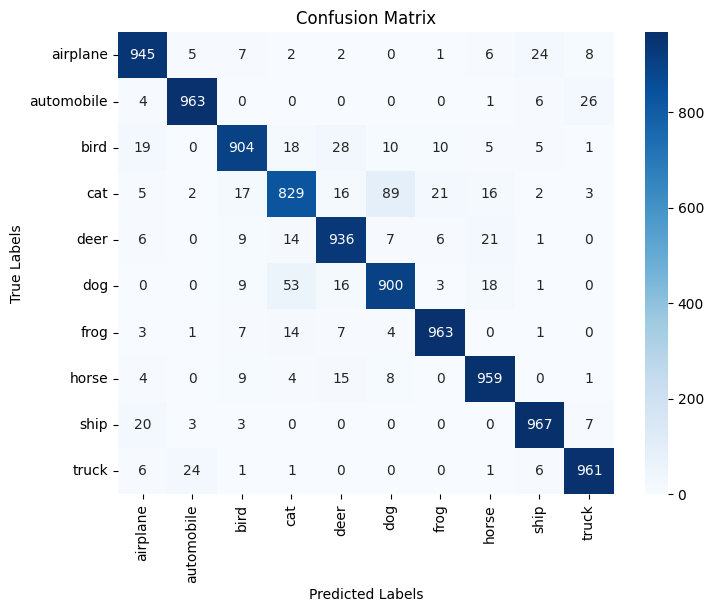

Classification Report:

              precision    recall  f1-score   support

    airplane       0.93      0.94      0.94      1000
  automobile       0.96      0.96      0.96      1000
        bird       0.94      0.90      0.92      1000
         cat       0.89      0.83      0.86      1000
        deer       0.92      0.94      0.93      1000
         dog       0.88      0.90      0.89      1000
        frog       0.96      0.96      0.96      1000
       horse       0.93      0.96      0.95      1000
        ship       0.95      0.97      0.96      1000
       truck       0.95      0.96      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, x_test, y_test, class_names):
    """
    Evalúa el modelo en el conjunto de prueba y muestra métricas clave.
    """
    # Evaluación en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # Predicciones
    y_pred_probs = model.predict(x_test, verbose=0)      # Probabilidades
    y_pred_classes = np.argmax(y_pred_probs, axis=1)     # Predicciones (clases)
    y_true_classes = np.argmax(y_test, axis=1)           # Clases verdaderas

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    print("Confusion Matrix:\n")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Clasificación: Precision, Recall, F1-Score y Support
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
    print("Classification Report:\n")
    print(report)

# Nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Evaluar el modelo
evaluate_model(model, x_test, y_test, class_names)


Analisis de Errores

Tasa de error por clase:
Clase: airplane, Tasa de error: 5.50%
Clase: automobile, Tasa de error: 3.70%
Clase: bird, Tasa de error: 9.60%
Clase: cat, Tasa de error: 17.10%
Clase: deer, Tasa de error: 6.40%
Clase: dog, Tasa de error: 10.00%
Clase: frog, Tasa de error: 3.70%
Clase: horse, Tasa de error: 4.10%
Clase: ship, Tasa de error: 3.30%
Clase: truck, Tasa de error: 3.90%


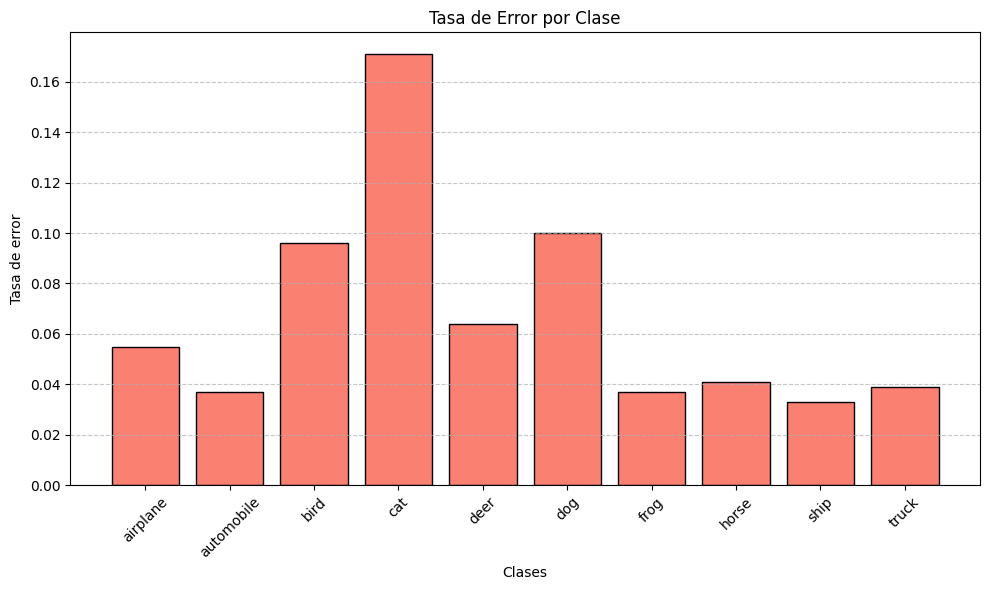

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def analyze_errors(model, x_test, y_test, class_names):
    """
    Analiza los errores del modelo mostrando la tasa de error por clase.
    """
    # Predicciones del modelo
    y_pred_probs = model.predict(x_test, verbose=0)      # Probabilidades
    y_pred_classes = np.argmax(y_pred_probs, axis=1)     # Predicciones (clases)
    y_true_classes = np.argmax(y_test, axis=1)           # Clases verdaderas

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Calcular la tasa de error por clase
    class_errors = 1 - (np.diag(conf_matrix) / np.sum(conf_matrix, axis=1))

    # Mostrar la tasa de error por clase
    print("Tasa de error por clase:")
    for i, class_name in enumerate(class_names):
        print(f"Clase: {class_name}, Tasa de error: {class_errors[i]:.2%}")

    # Visualización de errores por clase
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, class_errors, color='salmon', edgecolor='black')
    plt.xlabel('Clases')
    plt.ylabel('Tasa de error')
    plt.title('Tasa de Error por Clase')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Analizar los errores del modelo
analyze_errors(model, x_test, y_test, class_names)

# Data Augmentation con GANs

Procesamiento de datos

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)



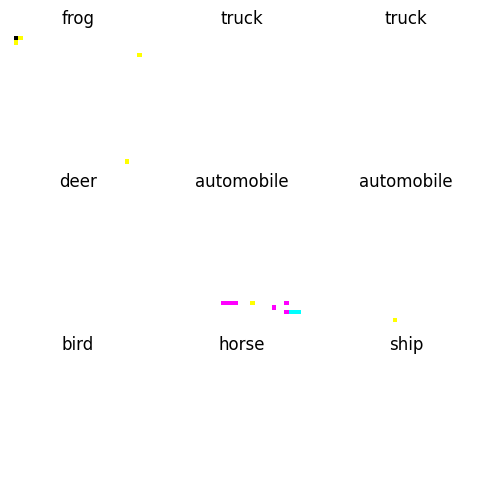

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Explorar la forma de los datos
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)  # (50000, 1)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)
print("y_test shape:", y_test.shape)    # (10000, 1)
print("\f")

# Normalizar las imágenes al rango [-1, 1]
x_train = (x_train.astype('float32') - 0.5) * 2
x_test = (x_test.astype('float32') - 0.5) * 2

# Convertir las etiquetas a codificación one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualizar algunas imágenes para verificar que la carga está bien
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(6,6))  # Figura de 6x6 pulgadas
for i in range(9):
    plt.subplot(3,3,i+1)
    # Reescalar la imagen a [0, 1] para visualizarla correctamente
    plt.imshow(((x_train[i] + 1) / 2).clip(0, 1), interpolation='nearest')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()


Generador

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Dimensiones del vector de ruido y la imagen
latent_dim = 100  # Dimensión del vector de ruido
image_shape = (32, 32, 3)  # Dimensión de las imágenes CIFAR-10
num_classes = 10  # Número de clases en CIFAR-10

# Generador
def build_generator(latent_dim, num_classes):
    noise = layers.Input(shape=(latent_dim,))  # Vector de ruido
    label = layers.Input(shape=(num_classes,))  # Etiqueta de clase (one-hot)

    # Concatenar ruido y etiqueta
    x = layers.Concatenate()([noise, label])

    # Capas densas y convolucionales transpuestas
    x = layers.Dense(8 * 8 * 256, activation="relu")(x)
    x = layers.Reshape((8, 8, 256))(x)

    x = layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu")(x)

    # Capa de salida para generar imagen
    img = layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding="same", activation="tanh")(x)

    return tf.keras.Model([noise, label], img, name="Generator")

# Construcción de los modelos
generator = build_generator(latent_dim, num_classes)

# Resumen de los modelos
generator.summary()

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_15            │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 110)            │              0 │ input_layer_14[0][0],  │
│ (Concatenate)             │                        │                │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 16384)          │      1,818,624 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 8, 8, 256)      │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_6        │ (None, 16, 16, 128)    │        524,416 │ reshape_4[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_7        │ (None, 32, 32, 64)     │        131,136 │ conv2d_transpose_6[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_8        │ (None, 32, 32, 3)      │          1,731 │ conv2d_transpose_7[0]… │
│ (Conv2DTranspose)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,475,907 (9.44 MB)

 Trainable params: 2,475,907 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

Discriminador

In [ ]:
# Función para construir el Discriminador
def build_discriminator(image_shape, num_classes):
    img = layers.Input(shape=image_shape)  # Imagen de entrada
    label = layers.Input(shape=(num_classes,))  # Etiqueta de clase (one-hot)

    # Expandir etiqueta a la dimensión de la imagen
    label_layer = layers.Dense(image_shape[0] * image_shape[1], activation="relu")(label)
    label_layer = layers.Reshape((image_shape[0], image_shape[1], 1))(label_layer)

    # Concatenar la imagen con la etiqueta expandida
    x = layers.Concatenate()([img, label_layer])

    # Capas convolucionales para clasificación
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)

    # Capa de salida para decidir real o generado
    validity = layers.Dense(1, activation="sigmoid")(x)

    return tf.keras.Model([img, label], validity, name="Discriminator")

# Construcción de los modelos
discriminator = build_discriminator(image_shape, num_classes)

# Resumen de los modelos
discriminator.summary()

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1024)           │         11,264 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_16            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_5 (Reshape)       │ (None, 32, 32, 1)      │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 32, 32, 4)      │              0 │ input_layer_16[0][0],  │
│ (Concatenate)             │                        │                │ reshape_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 64)     │          2,368 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 8, 8, 128)      │         73,856 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 8192)           │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8192)           │              0 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │          8,193 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 95,681 (373.75 KB)

 Trainable params: 95,681 (373.75 KB)

 Non-trainable params: 0 (0.00 B)

Train model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Hiperparámetros
batch_size = 64
epochs = 2000
latent_dim = 100  # Dimensión del ruido
num_classes = 10  # Número de clases
image_shape = (32, 32, 3)

# Función para generar ruido aleatorio
def generate_latent_points(latent_dim, batch_size, num_classes):
    # Ruido aleatorio
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    # Etiquetas aleatorias
    labels = np.random.randint(0, num_classes, batch_size)
    labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)
    return noise, labels_one_hot, labels

# Función para generar imágenes falsas
def generate_fake_samples(generator, latent_dim, batch_size, num_classes):
    noise, labels_one_hot, labels = generate_latent_points(latent_dim, batch_size, num_classes)
    images = generator.predict([noise, labels_one_hot], verbose=0)
    return images, labels_one_hot, labels

# Función para seleccionar un conjunto de imágenes reales
def generate_real_samples(x_train, y_train, batch_size):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    images, labels_one_hot = x_train[idx], y_train[idx]
    return images, labels_one_hot

# Compilación del discriminador
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Optimizador para el generador
generator_optimizer = Adam(0.0002, 0.5)

# Combinar ambos modelos (solo para entrenar el generador)
noise_input = tf.keras.Input(shape=(latent_dim,))
label_input = tf.keras.Input(shape=(num_classes,))
generated_image = generator([noise_input, label_input])
validity = discriminator([generated_image, label_input])
combined = tf.keras.Model([noise_input, label_input], validity)
combined.compile(optimizer=generator_optimizer, loss=BinaryCrossentropy())

# Entrenamiento
for epoch in range(epochs):
    # Entrenar discriminador
    real_images, real_labels = generate_real_samples(x_train, y_train, batch_size)
    real_validity = np.ones((batch_size, 1))
    fake_images, fake_labels_one_hot, _ = generate_fake_samples(generator, latent_dim, batch_size, num_classes)
    fake_validity = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch([real_images, real_labels], real_validity)
    d_loss_fake = discriminator.train_on_batch([fake_images, fake_labels_one_hot], fake_validity)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Entrenar generador
    noise, labels_one_hot, _ = generate_latent_points(latent_dim, batch_size, num_classes)
    valid_labels = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch([noise, labels_one_hot], valid_labels)

    # Convertir valores a flotantes explícitamente
    d_loss_value = float(d_loss[0])  # Pérdida del discriminador
    d_loss_accuracy = float(d_loss[1])  # Precisión del discriminador
    g_loss_value = float(g_loss[0]) if isinstance(g_loss, list) else float(g_loss)  # Pérdida del generador

    # Mostrar progreso
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss_value:.4f}, acc.: {100 * d_loss_accuracy:.2f}%] [G loss: {g_loss_value:.4f}]")




# Generar imágenes después del entrenamiento
noise, labels_one_hot, labels = generate_latent_points(latent_dim, 9, num_classes)
generated_images = generator.predict([noise, labels_one_hot])

# Visualización de resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow((generated_images[i] + 1) / 2)  # Desnormalizar para visualizar
    plt.title(f"Class: {labels[i]}")
    plt.axis('off')
plt.show()


0 [D loss: 54.7870, acc.: 12.50%] [G loss: 36.7560]
100 [D loss: 3.3231, acc.: 49.83%] [G loss: 3.3350]
200 [D loss: 4.3888, acc.: 49.91%] [G loss: 4.3968]
300 [D loss: 4.1332, acc.: 50.18%] [G loss: 4.1320]
400 [D loss: 3.5050, acc.: 52.73%] [G loss: 3.5048]
500 [D loss: 3.0415, acc.: 55.66%] [G loss: 3.0406]
600 [D loss: 2.6867, acc.: 58.38%] [G loss: 2.6865]
700 [D loss: 2.4171, acc.: 60.78%] [G loss: 2.4167]
800 [D loss: 2.1974, acc.: 63.00%] [G loss: 2.1970]
900 [D loss: 2.0169, acc.: 64.93%] [G loss: 2.0166]
1000 [D loss: 1.8701, acc.: 66.60%] [G loss: 1.8699]
1100 [D loss: 1.7475, acc.: 68.02%] [G loss: 1.7473]
1200 [D loss: 1.6458, acc.: 69.23%] [G loss: 1.6456]
1300 [D loss: 1.5592, acc.: 70.32%] [G loss: 1.5591]
1400 [D loss: 1.5318, acc.: 71.15%] [G loss: 1.5315]
1500 [D loss: 1.5011, acc.: 71.64%] [G loss: 1.5015]
1600 [D loss: 1.4777, acc.: 72.10%] [G loss: 1.4775]
1700 [D loss: 1.4559, acc.: 72.55%] [G loss: 1.4561]
1800 [D loss: 1.4379, acc.: 73.00%] [G loss: 1.4382]
190

KeyboardInterrupt: 

Visualizar imagenes creadas y etiquetadas.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


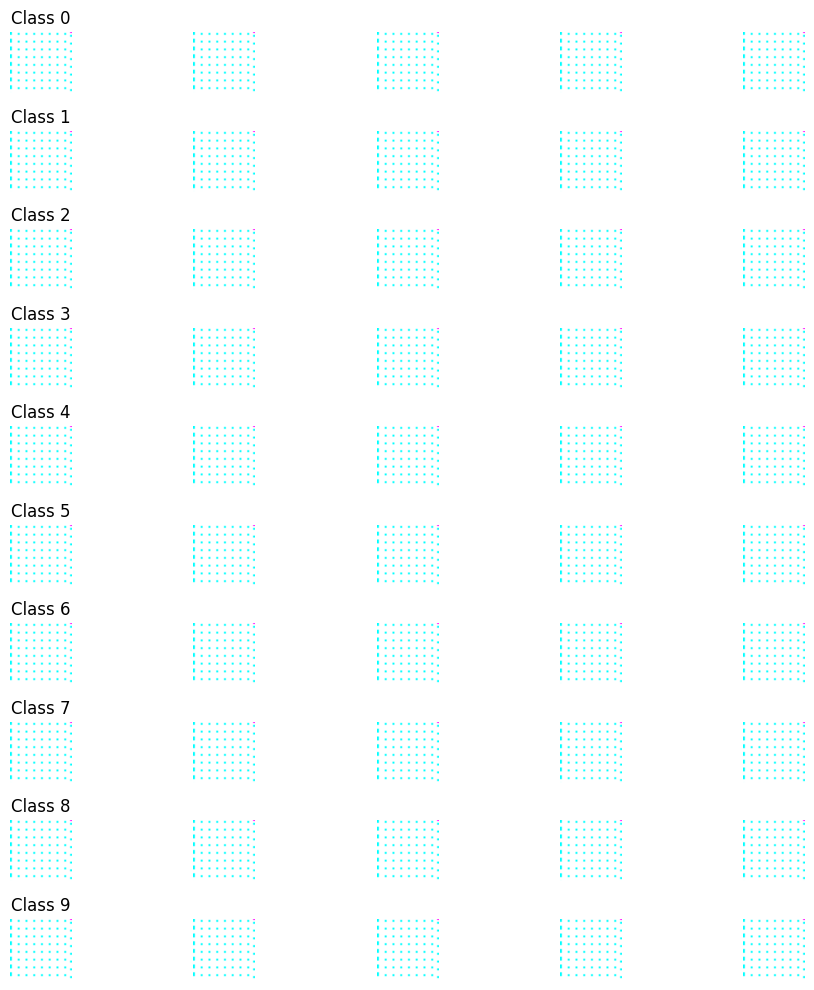

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_images_for_each_class(generator, latent_dim, num_classes, num_samples=5):
    """
    Genera imágenes para cada clase.
    """
    plt.figure(figsize=(10, 10))
    for class_idx in range(num_classes):
        noise = np.random.normal(0, 1, (num_samples, latent_dim))
        labels_one_hot = tf.keras.utils.to_categorical([class_idx] * num_samples, num_classes)
        generated_images = generator.predict([noise, labels_one_hot])

        for i in range(num_samples):
            plt.subplot(num_classes, num_samples, class_idx * num_samples + i + 1)
            plt.imshow((generated_images[i] + 1) / 2)  # Reescalar de [-1, 1] a [0, 1]
            plt.axis('off')
            if i == 0:
                plt.title(f"Class {class_idx}")
    plt.tight_layout()
    plt.show()

# Generar imágenes para cada clase
generate_images_for_each_class(generator, latent_dim, num_classes)


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import tensorflow as tf

# Cargar modelo InceptionV3 preentrenado
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

# Función para redimensionar imágenes
def preprocess_images(images, target_size=(75, 75)):
    images_resized = tf.image.resize(images, target_size)
    # Preprocesar imágenes para InceptionV3 (normalización específica)
    images_resized = preprocess_input(images_resized)
    return images_resized


from scipy.linalg import sqrtm
import numpy as np

def calculate_fid(real_images, generated_images):
    """
    Calcula el Frechet Inception Distance (FID).
    """
    # Redimensionar imágenes
    real_images_resized = preprocess_images(real_images)
    generated_images_resized = preprocess_images(generated_images)

    # Extraer características
    real_features = inception_model.predict(real_images_resized, verbose=0)
    generated_features = inception_model.predict(generated_images_resized, verbose=0)

    # Calcular medias y covarianzas
    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_gen, sigma_gen = np.mean(generated_features, axis=0), np.cov(generated_features, rowvar=False)

    # Calcular FID
    diff = mu_real - mu_gen
    cov_sqrt, _ = sqrtm(sigma_real.dot(sigma_gen), disp=False)
    if np.iscomplexobj(cov_sqrt):
        cov_sqrt = cov_sqrt.real

    fid = np.sum(diff**2) + np.trace(sigma_real + sigma_gen - 2 * cov_sqrt)
    return fid

# Usar una muestra para evaluar FID
real_images_sample = x_train[:500]  # Muestra de imágenes reales
generated_images_sample, _, _ = generate_fake_samples(generator, latent_dim, 500, num_classes)

fid_score = calculate_fid(real_images_sample, generated_images_sample)
print(f"FID Score: {fid_score}")



FID Score: 2209.4359709601254


In [ ]:
from scipy.stats import entropy

def calculate_inception_score(generated_images, num_splits=10):
    """
    Calcula el Inception Score (IS) para las imágenes generadas.
    """
    # Redimensionar y preprocesar imágenes
    generated_images_resized = preprocess_images(generated_images)

    # Obtener predicciones del modelo InceptionV3
    preds = inception_model.predict(generated_images_resized, verbose=0)

    # Verificar que las predicciones son válidas
    preds = np.clip(preds, 1e-8, 1)  # Evitar ceros en las probabilidades
    split_scores = []

    # Dividir en grupos para evitar problemas de memoria y cálculo
    for k in range(num_splits):
        part = preds[k * len(preds) // num_splits: (k + 1) * len(preds) // num_splits]

        # Verificar dimensiones antes del cálculo
        if len(part) == 0:
            continue

        # Calcular distribución promedio
        p_y = np.mean(part, axis=0)

        # Asegurarnos de que las dimensiones coincidan para calcular entropía
        scores = [entropy(p, p_y) for p in part]  # Entropía para cada muestra en el grupo
        split_scores.append(np.mean(scores))

    # Promediar los puntajes de los grupos y aplicar exponencial
    inception_score = np.exp(np.mean(split_scores))
    return inception_score

# Calcular Inception Score
is_score = calculate_inception_score(generated_images_sample)
print(f"Inception Score: {is_score}")

Inception Score: 1.0000793933868408


In [ ]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

def combine_and_save_dataset(real_images, real_labels, generator, latent_dim, num_classes, num_generated, output_path="augmented_cifar10.npz"):
    """
    Combina imágenes reales con imágenes generadas y guarda el conjunto combinado en un archivo .npz.

    Args:
    - real_images (numpy array): Imágenes reales del conjunto de datos original.
    - real_labels (numpy array): Etiquetas reales del conjunto de datos original.
    - generator (tf.keras.Model): Generador del modelo GAN.
    - latent_dim (int): Dimensión del vector de ruido para el generador.
    - num_classes (int): Número de clases en el conjunto de datos.
    - num_generated (int): Número total de imágenes a generar.
    - output_path (str): Ruta donde guardar el archivo combinado.
    """
    # Generar imágenes
    noise = np.random.normal(0, 1, (num_generated, latent_dim))
    labels_generated = np.random.randint(0, num_classes, num_generated)
    labels_generated_one_hot = to_categorical(labels_generated, num_classes)
    generated_images = generator.predict([noise, labels_generated_one_hot], verbose=0)

    # Combinar imágenes y etiquetas
    combined_images = np.concatenate((real_images, generated_images), axis=0)
    combined_labels = np.concatenate((real_labels, labels_generated_one_hot), axis=0)

    # Crear directorio si es necesario
    directory = os.path.dirname(output_path)
    if directory:
        os.makedirs(directory, exist_ok=True)

    # Guardar en un archivo .npz
    np.savez(output_path, images=combined_images, labels=combined_labels)
    print(f"Conjunto combinado guardado en: {output_path}")

# Parámetros
num_generated = 50000  # Número de imágenes a generar
output_path = "augmented_cifar10.npz"  # Ruta para guardar el archivo combinado

# Combinar y guardar el conjunto de datos
combine_and_save_dataset(
    real_images=x_train,
    real_labels=y_train,
    generator=generator,
    latent_dim=latent_dim,
    num_classes=num_classes,
    num_generated=num_generated,
    output_path=output_path
)

Conjunto combinado guardado en: augmented_cifar10.npz



# GANs using deep convolution (DCGAN)

Preparacion de los datos

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar las imágenes al rango [-1, 1]
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5

# Convertir las etiquetas a formato one-hot
num_classes = 10  # CIFAR-10 tiene 10 clases
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Imprimir información sobre los datos procesados
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape (one-hot):", y_train_one_hot.shape)  # (50000, 10)
print("x_test shape:", x_test.shape)  # (10000, 32, 32, 3)
print("y_test shape (one-hot):", y_test_one_hot.shape)  # (10000, 10)


x_train shape: (50000, 32, 32, 3)
y_train shape (one-hot): (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape (one-hot): (10000, 10)


Generador

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Reshape, Conv2DTranspose, ReLU
from tensorflow.keras.models import Sequential

def build_generator(latent_dim):
    model = Sequential(name="Generator")
    model.add(Dense(8 * 8 * 512, input_dim=latent_dim))
    model.add(Reshape((8, 8, 512)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2DTranspose(64, kernel_size=4, strides=1, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2DTranspose(3, kernel_size=4, strides=1, padding="same", activation="tanh"))
    return model

# Crear el generador
latent_dim = 100  # Dimensión del vector latente
generator = build_generator(latent_dim)
generator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32768)               │       3,309,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 256)         │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 3)           │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,069,443 (23.15 MB)

 Trainable params: 6,067,523 (23.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

Discriminador

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Flatten, Dropout, Dense, Conv2D

def build_discriminator(img_shape):
    """
    Discriminador del modelo DCGAN.
    """
    model = models.Sequential(name="Discriminator")

    # Capas convolucionales
    model.add(Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    return model

img_shape = (32, 32, 3)
discriminator = build_discriminator(img_shape)
discriminator.summary()

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_208 (Conv2D)                  │ (None, 16, 16, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_209 (Conv2D)                  │ (None, 8, 8, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)

Train

0 [D loss: 0.9664, acc.: 31.64%] [G loss: 1.2212]


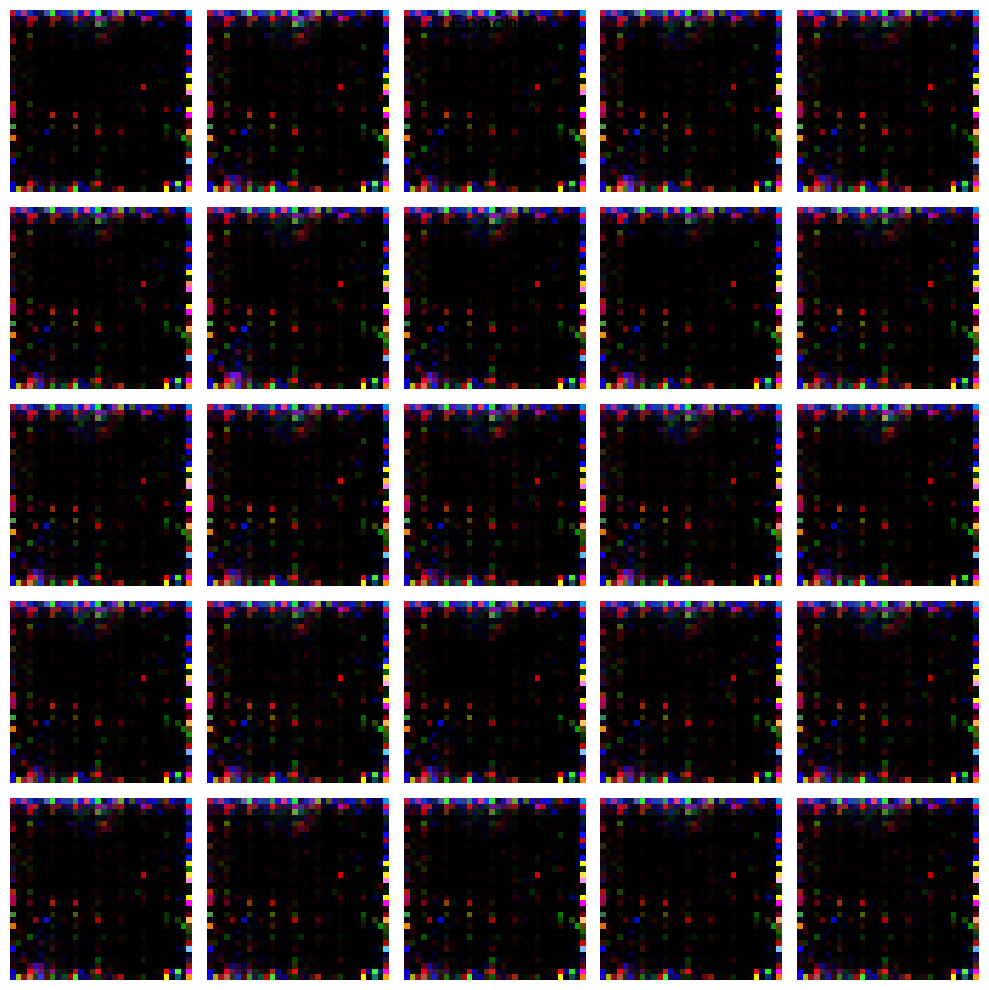

100 [D loss: 0.6808, acc.: 62.33%] [G loss: 0.6809]


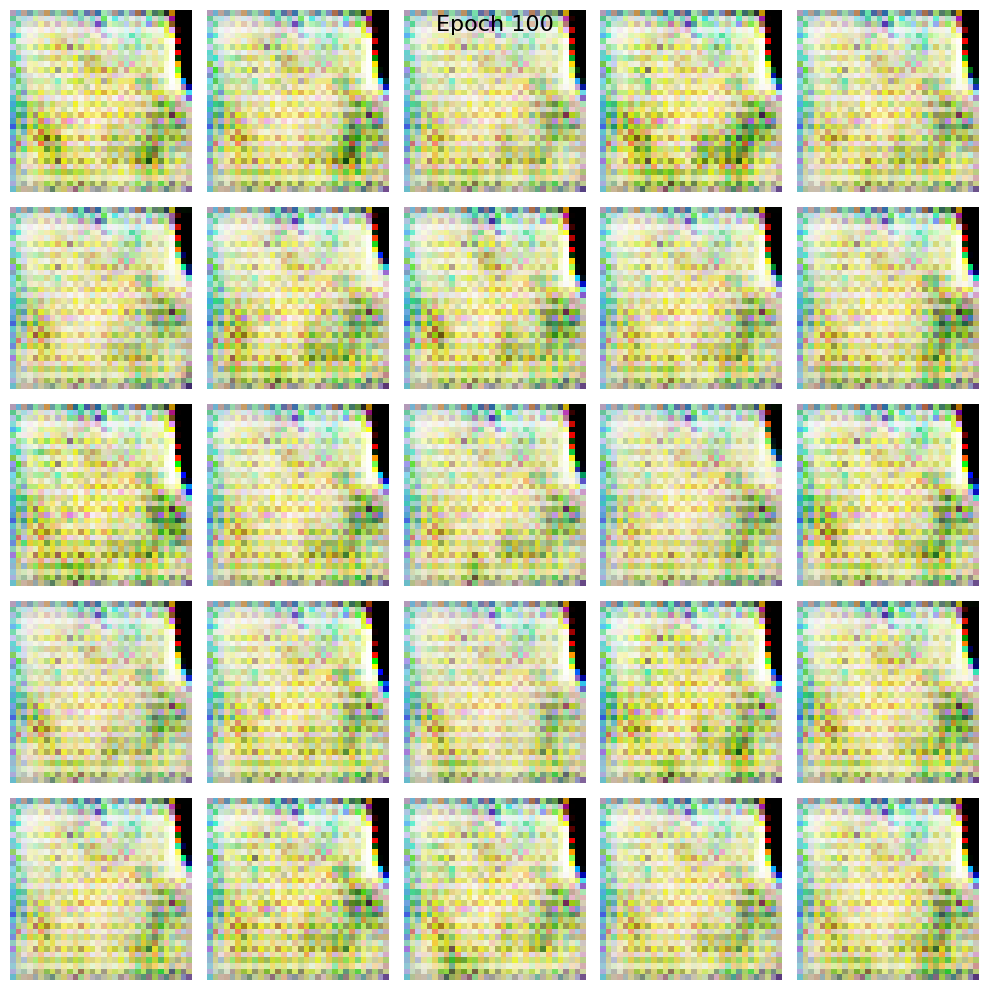

200 [D loss: 0.6817, acc.: 58.09%] [G loss: 0.6818]


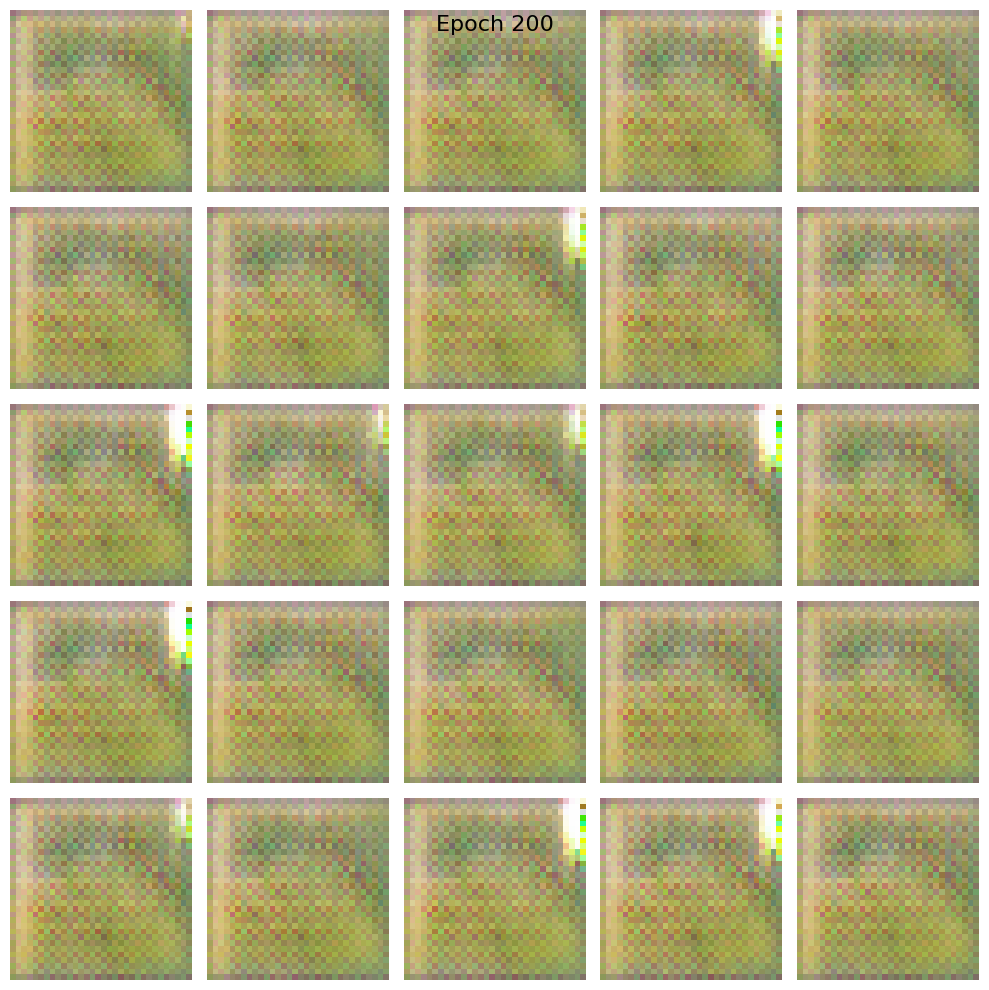

300 [D loss: 0.6586, acc.: 59.23%] [G loss: 0.6581]


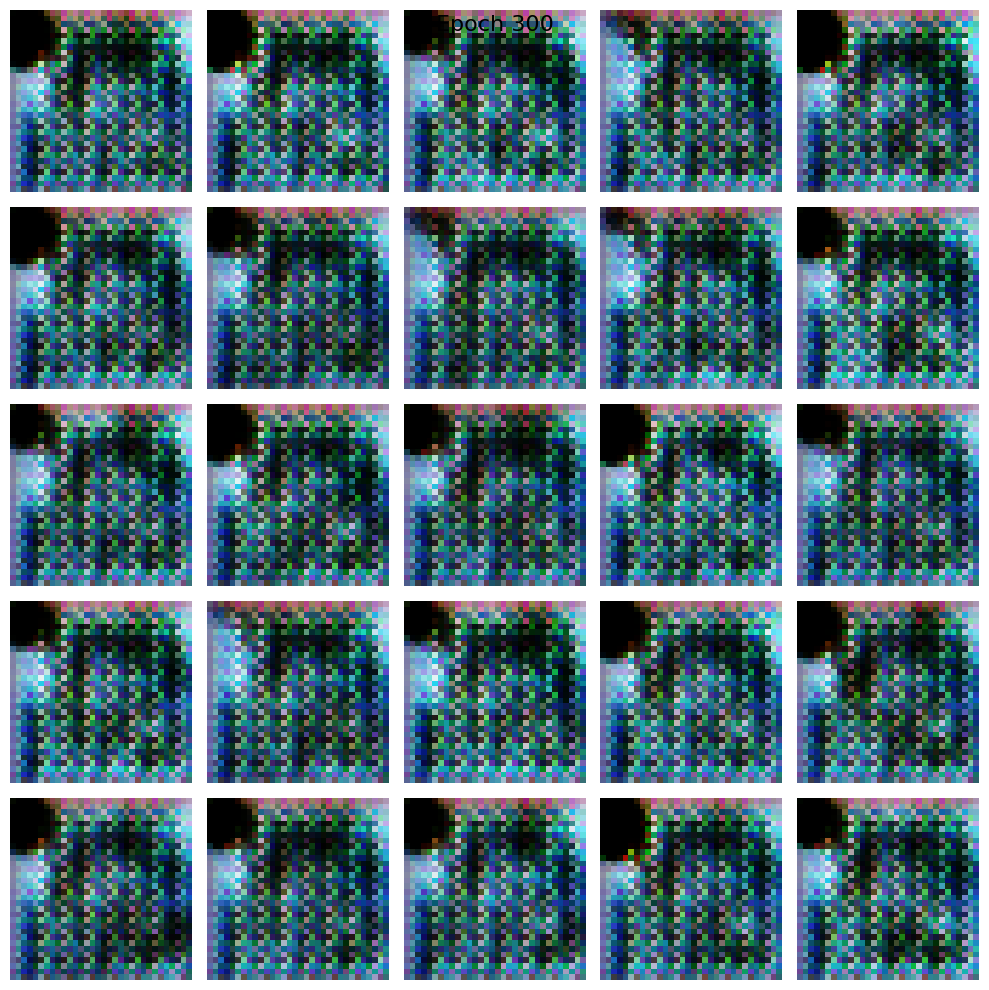

400 [D loss: 0.6671, acc.: 57.71%] [G loss: 0.6670]


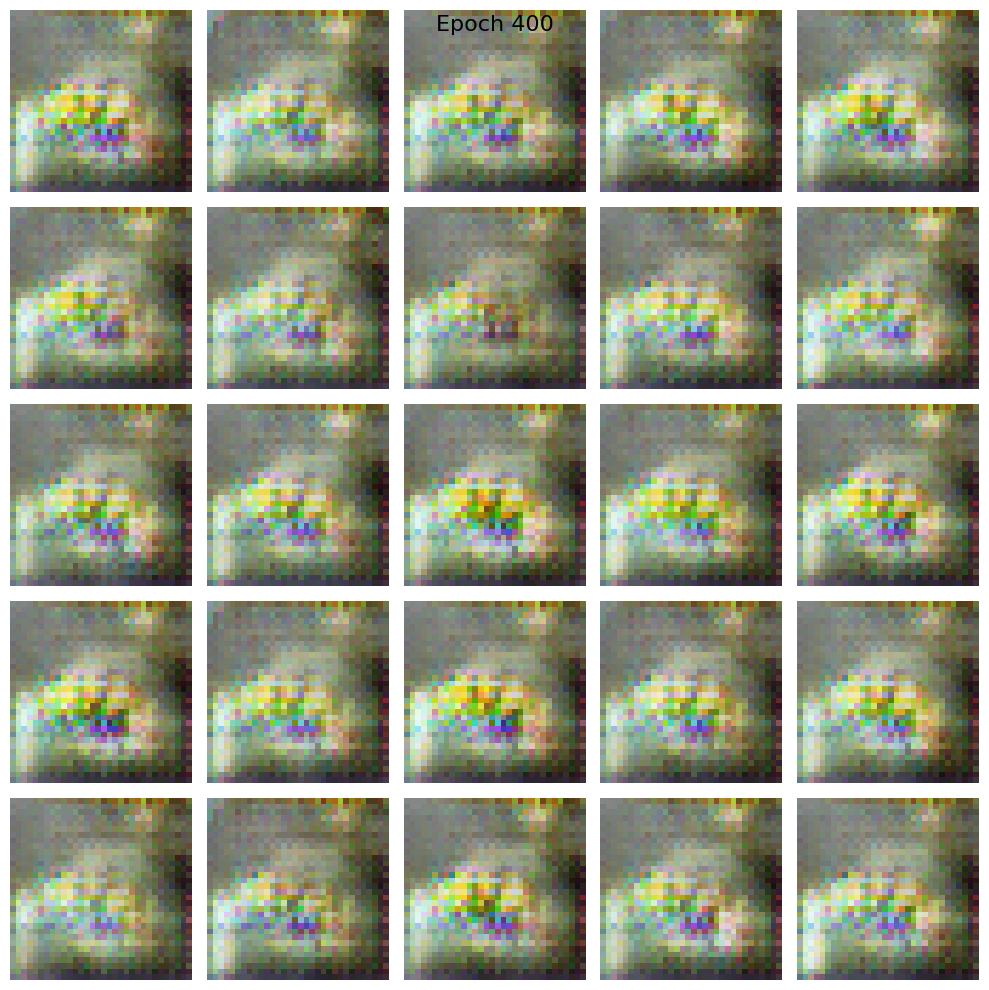

500 [D loss: 0.6638, acc.: 58.11%] [G loss: 0.6638]


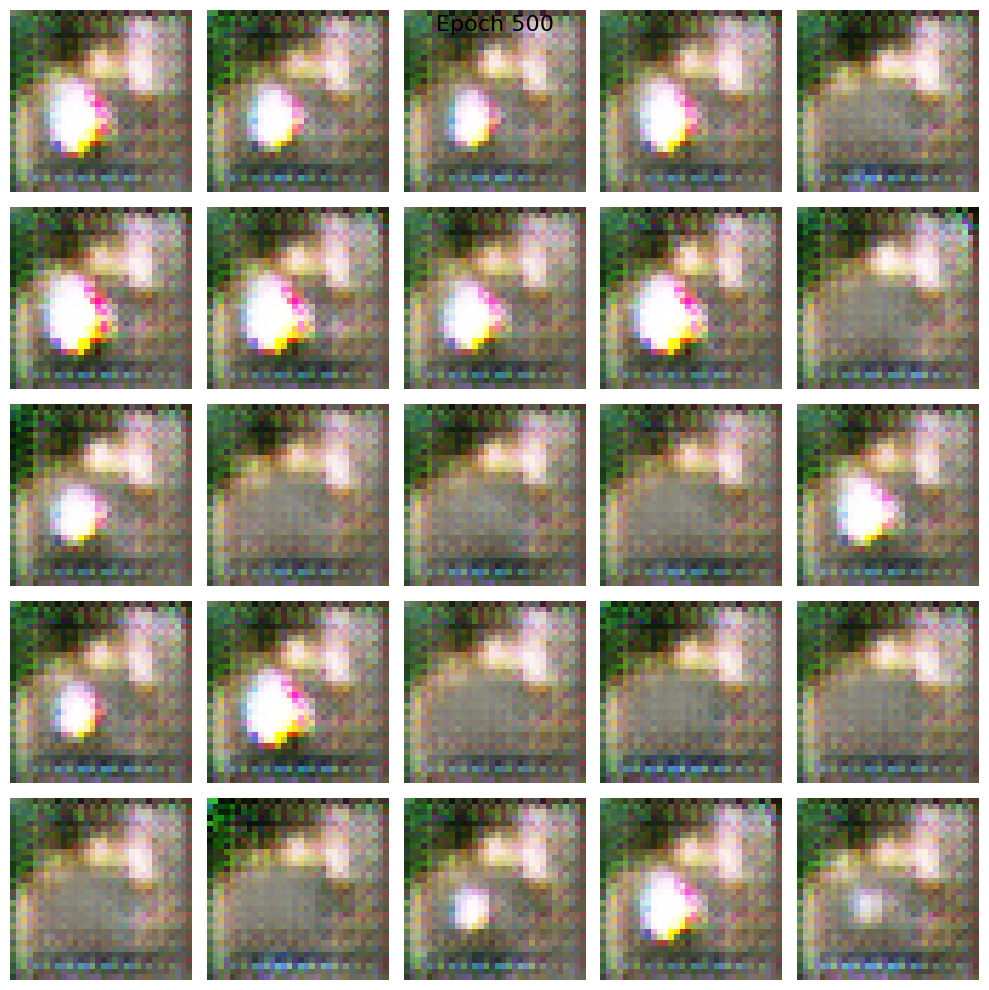

600 [D loss: 0.6740, acc.: 55.73%] [G loss: 0.6739]


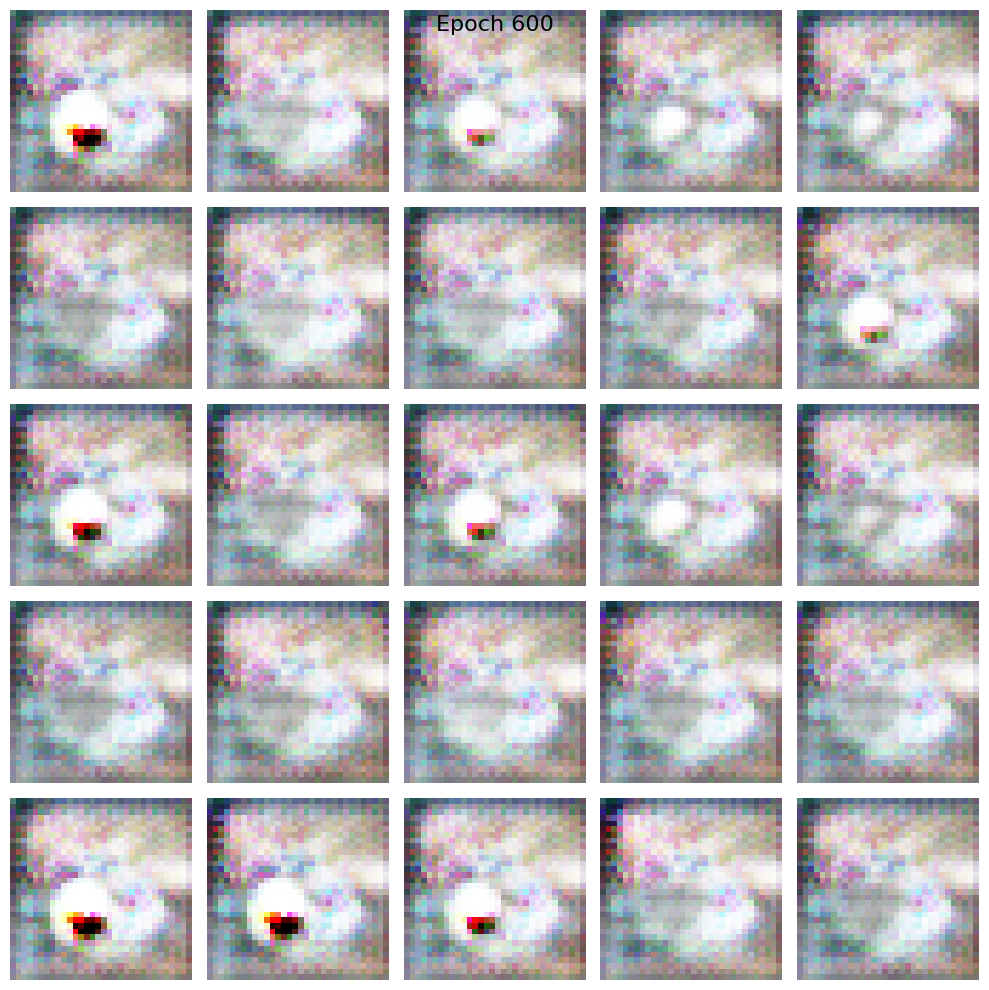

700 [D loss: 0.6745, acc.: 55.66%] [G loss: 0.6743]


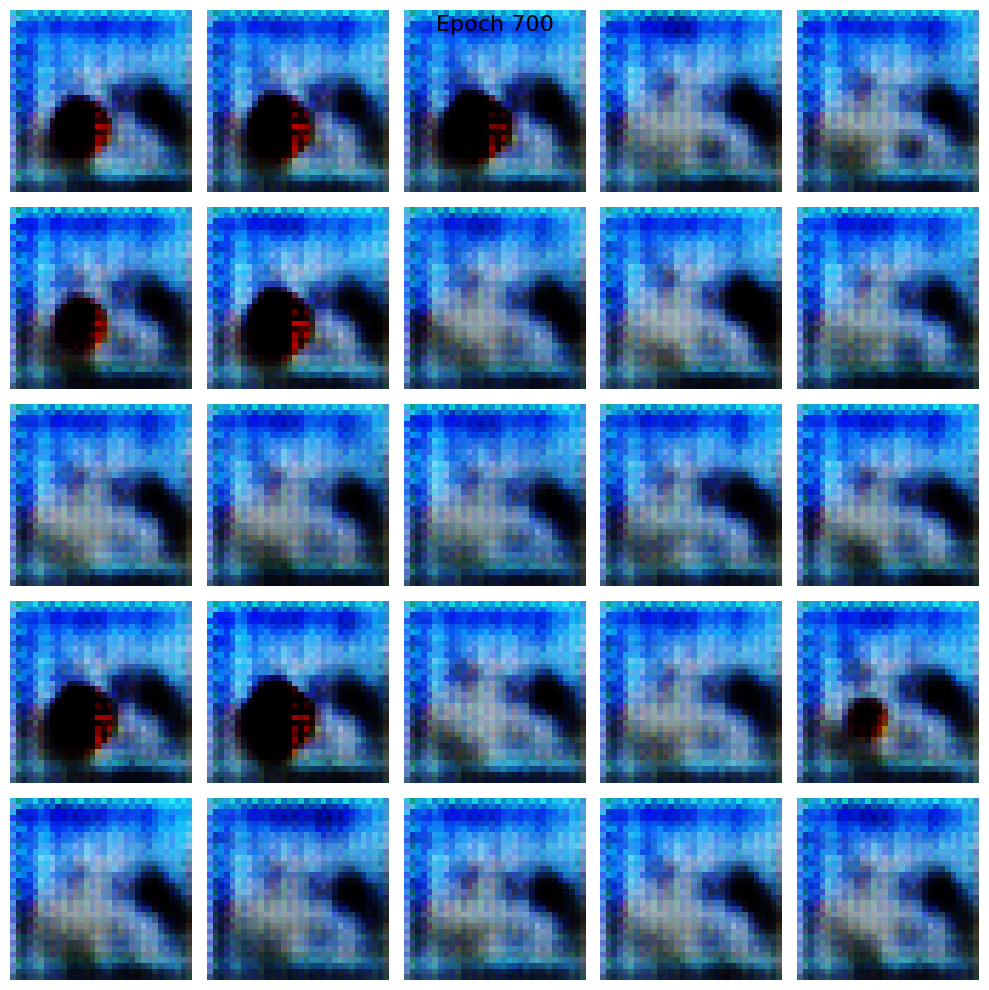

800 [D loss: 0.6756, acc.: 54.81%] [G loss: 0.6756]


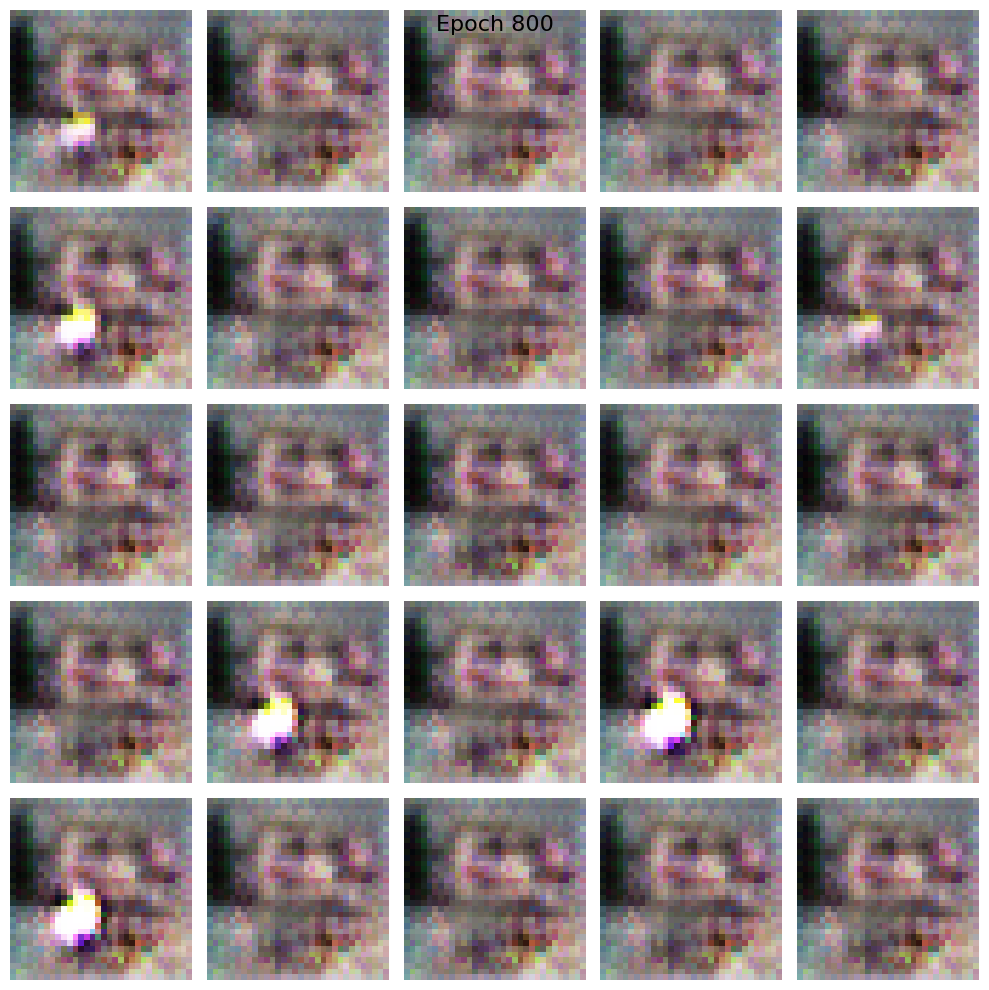

900 [D loss: 0.6808, acc.: 53.07%] [G loss: 0.6808]


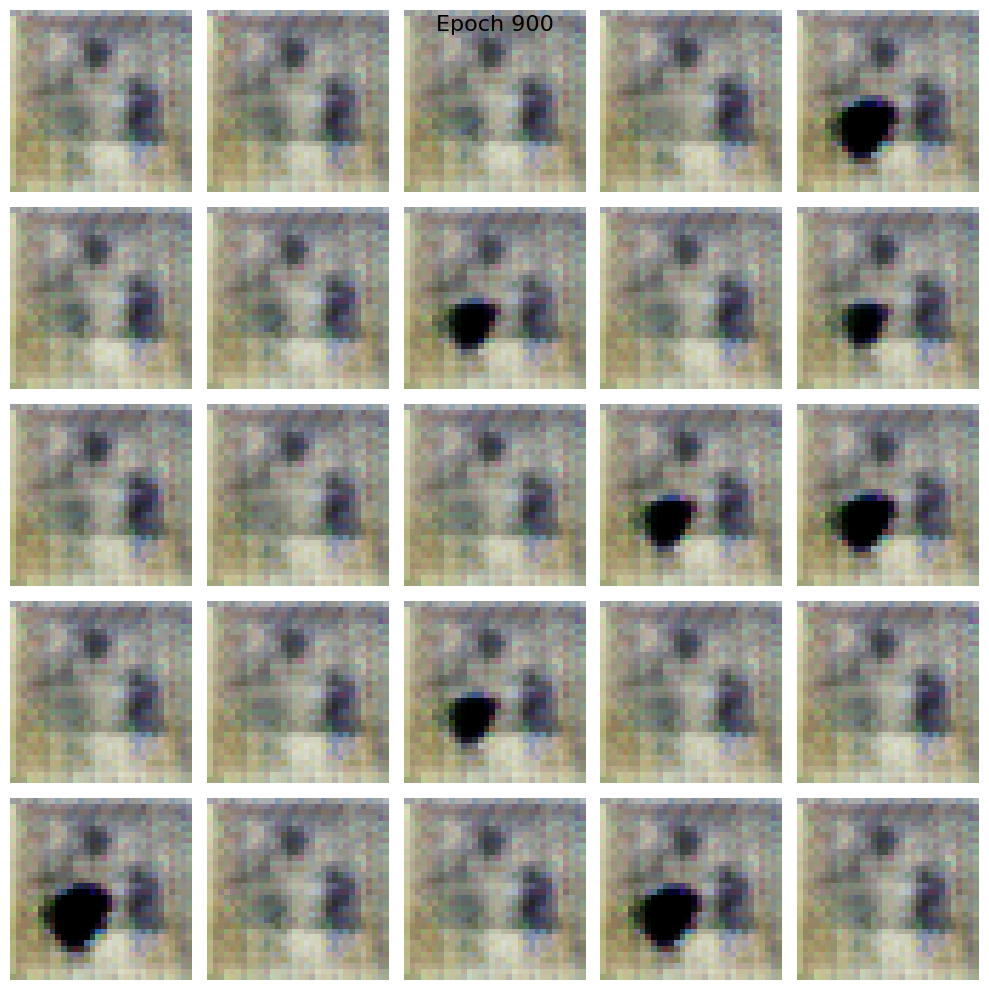

In [ ]:
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Dimensión del vector de ruido
latent_dim = 100
batch_size = 64
epochs = 900
save_interval = 100

# Optimizadores balanceados
generator_optimizer = Adam(learning_rate=0.0004, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Compilar el discriminador
discriminator.trainable = True
discriminator.compile(optimizer=discriminator_optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Crear el modelo combinado
discriminator.trainable = False
z = layers.Input(shape=(latent_dim,))
img = generator(z)
valid = discriminator(img)
combined = models.Model(z, valid)
combined.compile(optimizer=generator_optimizer, loss="binary_crossentropy")

# Función para mostrar imágenes generadas
def show_generated_images(epoch, generator, latent_dim, examples=25, grid_shape=(5, 5)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise, verbose=0)
    generated_images = (generated_images + 1) / 2  # Reescalar al rango [0, 1]

    plt.figure(figsize=(10, 10))
    for i in range(examples):
        plt.subplot(grid_shape[0], grid_shape[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f"Epoch {epoch}", fontsize=16)
    plt.show()

# Inicializar listas para pérdidas
d_losses = []
g_losses = []

# Entrenamiento
for epoch in range(epochs):
    # === Entrenamiento del Discriminador ===
    discriminator.trainable = True

    # Seleccionar imágenes reales y agregar ruido
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    real_imgs += np.random.normal(0, 0.05, real_imgs.shape)  # Ruido en las imágenes reales

    # Generar imágenes falsas y agregar ruido
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise, verbose=0)
    fake_imgs += np.random.normal(0, 0.05, fake_imgs.shape)  # Ruido en las imágenes falsas

    # Etiquetas reales y falsas
    real_validity = np.ones((batch_size, 1))  # Sin suavizado
    fake_validity = np.zeros((batch_size, 1))

    # Entrenar el discriminador
    d_loss_real = discriminator.train_on_batch(real_imgs, real_validity)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_validity)
    d_loss_value = 0.5 * (d_loss_real[0] + d_loss_fake[0])
    d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

    # === Entrenamiento del Generador ===
    discriminator.trainable = False
    for _ in range(3):  # Entrenar el generador tres veces por iteración
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Etiquetas reales para engañar al discriminador
        g_loss = combined.train_on_batch(noise, valid_labels)
    g_loss_value = g_loss if isinstance(g_loss, (float, int)) else g_loss[0]

    # Registrar pérdidas
    d_losses.append(d_loss_value)
    g_losses.append(g_loss_value)

    # Monitorear progreso
    if epoch % save_interval == 0:
        print(f"{epoch} [D loss: {d_loss_value:.4f}, acc.: {100 * d_acc:.2f}%] [G loss: {g_loss_value:.4f}]")
        show_generated_images(epoch, generator, latent_dim)

# Graficar pérdidas al finalizar el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.title("Losses over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Diversity

In [ ]:
from scipy.spatial.distance import euclidean
import numpy as np

def evaluate_diversity(generator, latent_dim, examples=100):
    """
    Evalúa la diversidad de las imágenes generadas calculando la distancia promedio entre imágenes.
    """
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise, verbose=0)
    generated_images = generated_images.reshape(examples, -1)  # Aplanar las imágenes

    # Calcular distancia promedio entre imágenes
    distances = []
    for i in range(examples):
        for j in range(i + 1, examples):
            dist = euclidean(generated_images[i], generated_images[j])
            distances.append(dist)

    avg_distance = np.mean(distances)
    print(f"Diversidad Promedio (Distancia entre imágenes): {avg_distance:.4f}")
    return avg_distance

# Evaluar diversidad
evaluate_diversity(generator, latent_dim)


Diversidad Promedio (Distancia entre imágenes): 0.4180


0.41797712835398587

Inception Score

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

def calculate_inception_score(generator, latent_dim, examples=100):
    """
    Calcula el Inception Score (IS) de las imágenes generadas.
    """
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

    # Generar imágenes y reescalar a 75x75 para InceptionV3
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise, verbose=0)
    generated_images = (generated_images + 1) / 2  # Reescalar a [0, 1]
    generated_images_resized = np.array([np.resize(img, (75, 75, 3)) for img in generated_images])

    # Preprocesar imágenes
    generated_images_resized = preprocess_input(generated_images_resized)

    # Calcular features con InceptionV3
    features = inception_model.predict(generated_images_resized, verbose=0)
    p_y = np.exp(features) / np.sum(np.exp(features), axis=1, keepdims=True)
    kl_div = p_y * (np.log(p_y + 1e-16) - np.log(np.mean(p_y, axis=0) + 1e-16))
    inception_score = np.exp(np.mean(np.sum(kl_div, axis=1)))

    print(f"Inception Score (IS): {inception_score:.4f}")
    return inception_score

# Calcular Inception Score
calculate_inception_score(generator, latent_dim)


Inception Score (IS): 1.0000


1.0000248

# Transfer Learning and Fine Tuning

Procesamiento de datos

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Parámetros
input_size = (32, 32)  # Resolución más pequeña para reducir consumo
batch_size = 32           # Batch size pequeño para reducir consumo de memoria
num_classes = 10         # CIFAR-10 tiene 10 clases

# Preprocesamiento
def preprocess_images_and_labels(image, label):
    image = tf.image.resize(image, input_size) / 255.0  # Redimensionar y normalizar
    label = tf.squeeze(label, axis=-1)                 # Eliminar dimensión extra
    label = tf.one_hot(label, depth=num_classes)       # Convertir etiquetas a formato one-hot
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset
    .map(preprocess_images_and_labels, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(10000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (
    test_dataset
    .map(preprocess_images_and_labels, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)
# Mostrar las formas originales de los datos
print("Formas de los datos originales:")
print("x_train shape:", x_train.shape)  # Imágenes de entrenamiento
print("y_train shape:", y_train.shape)  # Etiquetas de entrenamiento
print("x_test shape:", x_test.shape)    # Imágenes de prueba
print("y_test shape:", y_test.shape)    # Etiquetas de prueba

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Formas de los datos originales:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


MobileNetV2

In [ ]:
# Modelo con MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Congelar capas base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Mostrar estructura del modelo


<ipython-input-2-ca3edc806019>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train + Fine Tunning

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Entrenamiento Inicial
print("\n=== Entrenamiento Inicial (Congelando capas base) ===")
history_initial = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20, # puede ser 3
    callbacks=[early_stopping, reduce_lr]
)

# Fine-Tuning
print("\n=== Fine-Tuning ===")
base_model.trainable = True  # Descongelar las capas base para fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine_tuning = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=50, #creo que tendremos que amuntar a 50 o menos
    callbacks=[early_stopping, reduce_lr]
)


=== Entrenamiento Inicial (Congelando capas base) ===
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.2090 - loss: 2.1690 - val_accuracy: 0.2998 - val_loss: 1.9937 - learning_rate: 0.0010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2725 - loss: 2.0180 - val_accuracy: 0.3062 - val_loss: 1.9533 - learning_rate: 0.0010
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.2805 - loss: 1.9931 - val_accuracy: 0.3141 - val_loss: 1.9365 - learning_rate: 0.0010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2839 - loss: 1.9863 - val_accuracy: 0.3144 - val_loss: 1.9278 - learning_rate: 0.0010
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2815 - loss: 1.9804 - val_accuracy: 0.3149 - val_loss: 1.9231 - learning_rate: 0.0010
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.2865 - loss: 1.9724 - val_accuracy: 0.3131 - val_loss: 1.9195 - learning_rate: 0.0010
Epoch 7/20
156

Learning Curve/Loss Curve

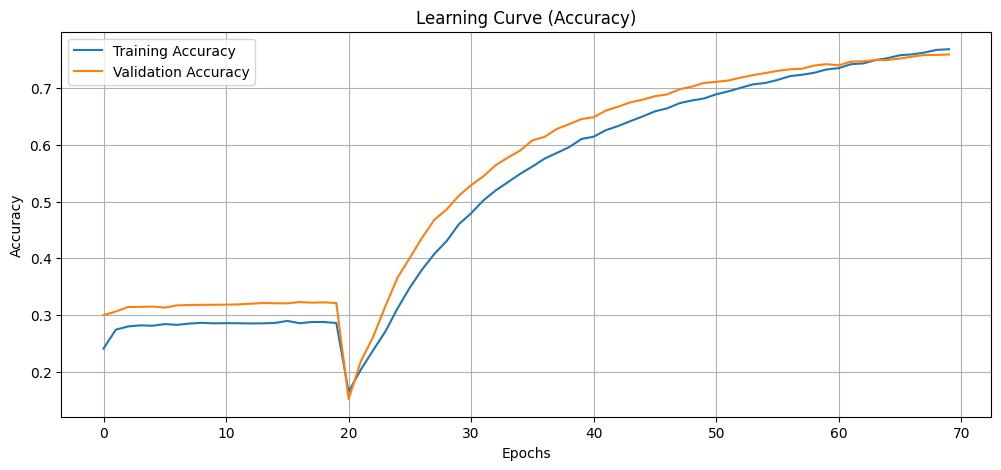

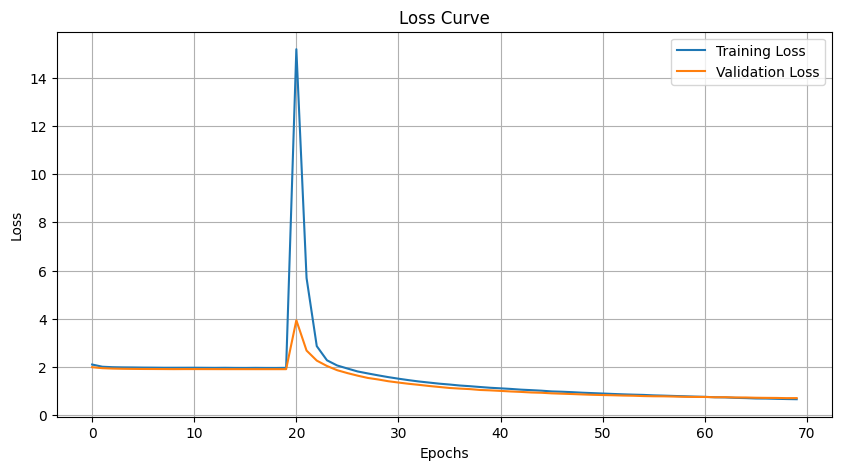

In [ ]:
import matplotlib.pyplot as plt

# Combinar resultados de entrenamiento inicial y fine-tuning
history_combined = {
    'accuracy': history_initial.history['accuracy'] + history_fine_tuning.history['accuracy'],
    'val_accuracy': history_initial.history['val_accuracy'] + history_fine_tuning.history['val_accuracy'],
    'loss': history_initial.history['loss'] + history_fine_tuning.history['loss'],
    'val_loss': history_initial.history['val_loss'] + history_fine_tuning.history['val_loss'],
}

# Learning Curve (Accuracy)
plt.figure(figsize=(12, 5))
plt.plot(history_combined['accuracy'], label='Training Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_combined['loss'], label='Training Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Evaluation Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7592 - loss: 0.7217
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step

=== Resultados del Modelo ===
Val Loss: 0.7116
Val Accuracy: 0.7591


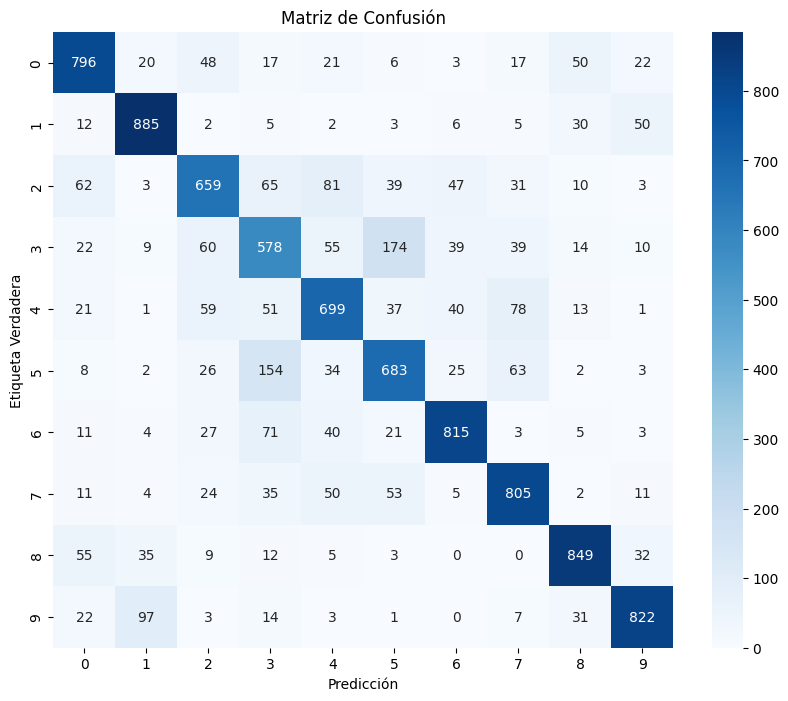


=== Reporte de Clasificación ===
              precision    recall  f1-score   support

     Clase 0       0.78      0.80      0.79      1000
     Clase 1       0.83      0.89      0.86      1000
     Clase 2       0.72      0.66      0.69      1000
     Clase 3       0.58      0.58      0.58      1000
     Clase 4       0.71      0.70      0.70      1000
     Clase 5       0.67      0.68      0.68      1000
     Clase 6       0.83      0.81      0.82      1000
     Clase 7       0.77      0.81      0.79      1000
     Clase 8       0.84      0.85      0.85      1000
     Clase 9       0.86      0.82      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
eval_results = model.evaluate(test_dataset, verbose=1)
val_loss = eval_results[0]
val_accuracy = eval_results[1]

# Obtener predicciones y etiquetas verdaderas
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true = np.concatenate([np.argmax(batch[1].numpy(), axis=1) for batch in test_dataset], axis=0)

# Imprimir val_accuracy y val_loss
print("\n=== Resultados del Modelo ===")
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")

# Generar e imprimir matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# Generar e imprimir reporte de clasificación
class_report = classification_report(y_true, y_pred, target_names=[f"Clase {i}" for i in range(num_classes)])
print("\n=== Reporte de Clasificación ===")
print(class_report)

Analisis de error

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Tasa de error por clase:
Airplane: 20.40%
Automobile: 11.50%
Bird: 34.10%
Cat: 42.20%
Deer: 30.10%
Dog: 31.70%
Frog: 18.50%
Horse: 19.50%
Ship: 15.10%
Truck: 17.80%


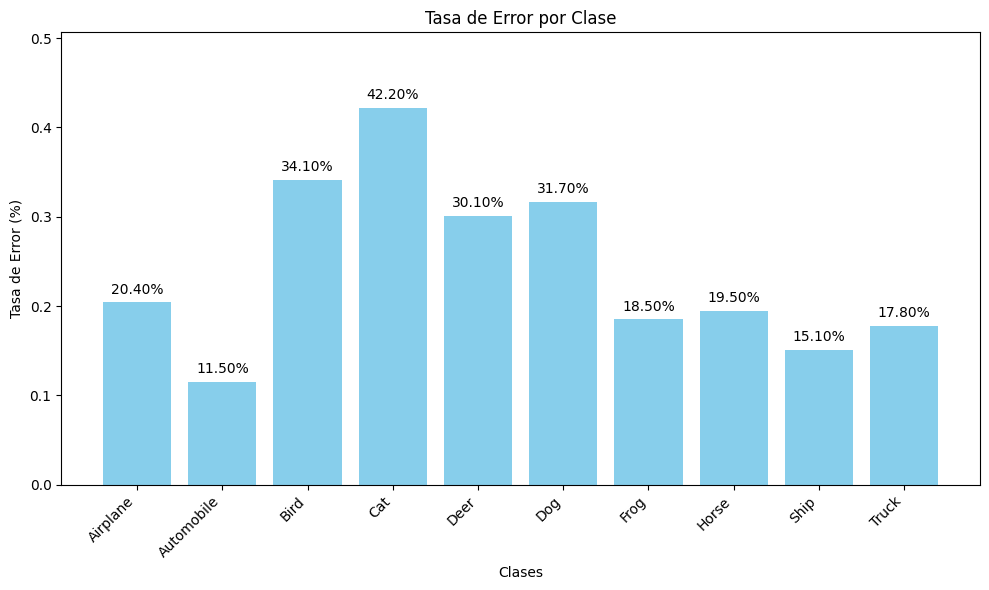

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir probabilidades a etiquetas
y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in test_dataset], axis=0)  # Etiquetas verdaderas

# Etiquetas de las clases (CIFAR-10)
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Encontrar las imágenes mal clasificadas
misclassified_indices = np.where(y_pred != y_true)[0]

# Tasa de error por clase
errors_per_class = {}
for i in range(len(class_labels)):
    total_per_class = np.sum(y_true == i)
    misclassified_per_class = np.sum((y_pred != y_true) & (y_true == i))
    error_rate = misclassified_per_class / total_per_class
    errors_per_class[class_labels[i]] = error_rate

# Mostrar la tasa de error por clase
print("Tasa de error por clase:")
for label, error_rate in errors_per_class.items():
    print(f"{label}: {error_rate:.2%}")

# Crear la gráfica de barras para la tasa de error por clase
def plot_error_rate(errors_per_class):
    classes = list(errors_per_class.keys())
    error_rates = list(errors_per_class.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, error_rates, color='skyblue')
    plt.xlabel('Clases')
    plt.ylabel('Tasa de Error (%)')
    plt.title('Tasa de Error por Clase')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(error_rates) * 1.2)  # Ajustar el límite del eje Y
    for i, v in enumerate(error_rates):
        plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# Llamar a la función con los datos calculados
plot_error_rate(errors_per_class)


# Transfer Learning and Fine-Tuning (CIFAR-100)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

# Cargar CIFAR-100
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Preprocesamiento
input_size = (64, 64)
batch_size = 32
num_classes = 100

def preprocess_images_and_labels(image, label):
    image = tf.image.resize(image, input_size)
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.squeeze(label, axis=-1)
    label = tf.one_hot(label, depth=num_classes)
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset
    .map(preprocess_images_and_labels, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(10000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (
    test_dataset
    .map(preprocess_images_and_labels, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Mostrar las formas originales de los datos
print("Formas de los datos originales:")
print("x_train shape:", x_train.shape)  # Imágenes de entrenamiento
print("y_train shape:", y_train.shape)  # Etiquetas de entrenamiento
print("x_test shape:", x_test.shape)    # Imágenes de prueba
print("y_test shape:", y_test.shape)    # Etiquetas de prueba

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Formas de los datos originales:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Modelo con MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Mostrar estructura del modelo

<ipython-input-2-789fd550f264>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 32, 32, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 32, 32, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 32, 32, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 32, 32, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 32, 32, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 32, 32, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 32, 32, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 32, 32, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 32, 32, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 33, 33, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 16, 16, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,386,084 (9.10 MB)

 Trainable params: 128,100 (500.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Entrenamiento Inicial
print("\n=== Entrenamiento Inicial (Congelando capas base) ===")
history_initial = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10, # mejor 10 solo
    callbacks=[early_stopping, reduce_lr]
)

# Fine-Tuning
print("\n=== Fine-Tuning ===")
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine_tuning = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


=== Entrenamiento Inicial (Congelando capas base) ===
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.2152 - loss: 3.5612 - val_accuracy: 0.3752 - val_loss: 2.5421 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.3984 - loss: 2.4185 - val_accuracy: 0.3923 - val_loss: 2.4822 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4288 - loss: 2.2438 - val_accuracy: 0.3978 - val_loss: 2.4934 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4467 - loss: 2.1493 - val_accuracy: 0.3924 - val_loss: 2.5389 - learning_rate: 0.0010
Epoch 5/10
1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 2.0933
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4583 - loss: 2.0934 - val_accuracy: 0.3919 - val_loss: 2.5626 - learning_rate: 0.0010
Epoch 6/10
1563

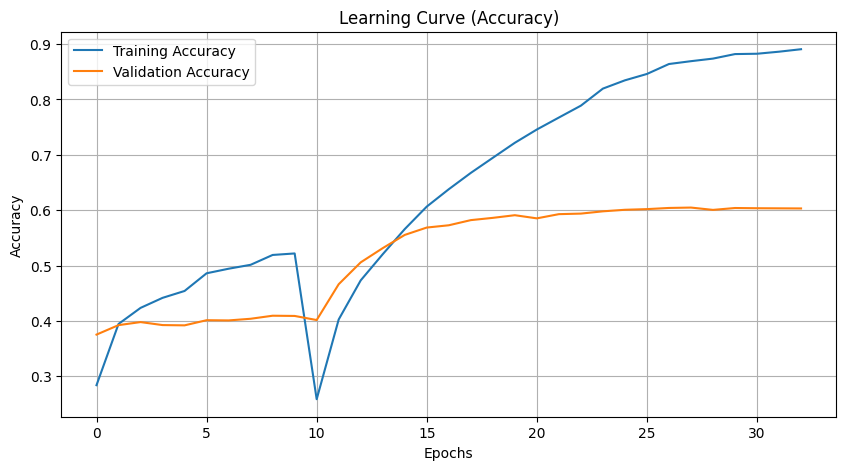

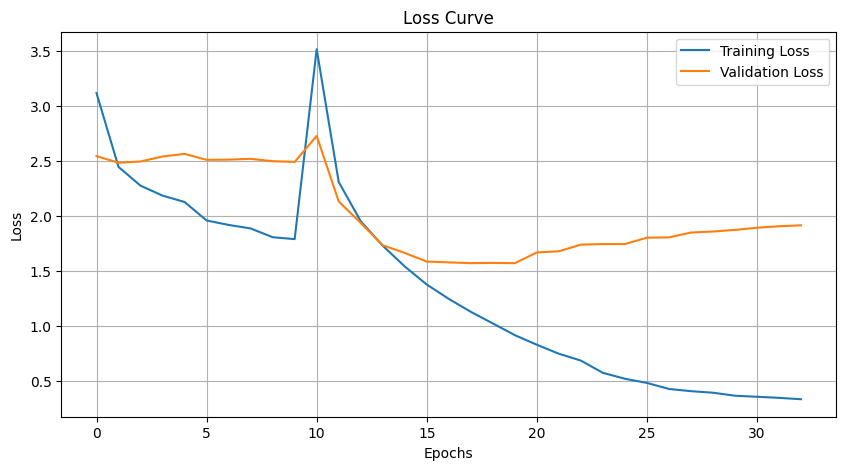

In [ ]:
import matplotlib.pyplot as plt

# Combinar resultados de entrenamiento inicial y fine-tuning
history_combined = {
    'accuracy': history_initial.history['accuracy'] + history_fine_tuning.history['accuracy'],
    'val_accuracy': history_initial.history['val_accuracy'] + history_fine_tuning.history['val_accuracy'],
    'loss': history_initial.history['loss'] + history_fine_tuning.history['loss'],
    'val_loss': history_initial.history['val_loss'] + history_fine_tuning.history['val_loss'],
}

# Learning Curve (Accuracy)
plt.figure(figsize=(10, 5))
plt.plot(history_combined['accuracy'], label='Training Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history_combined['loss'], label='Training Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6030 - loss: 1.8815
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

=== Resultados del Modelo ===
Val Loss: 1.8490
Val Accuracy: 0.6047


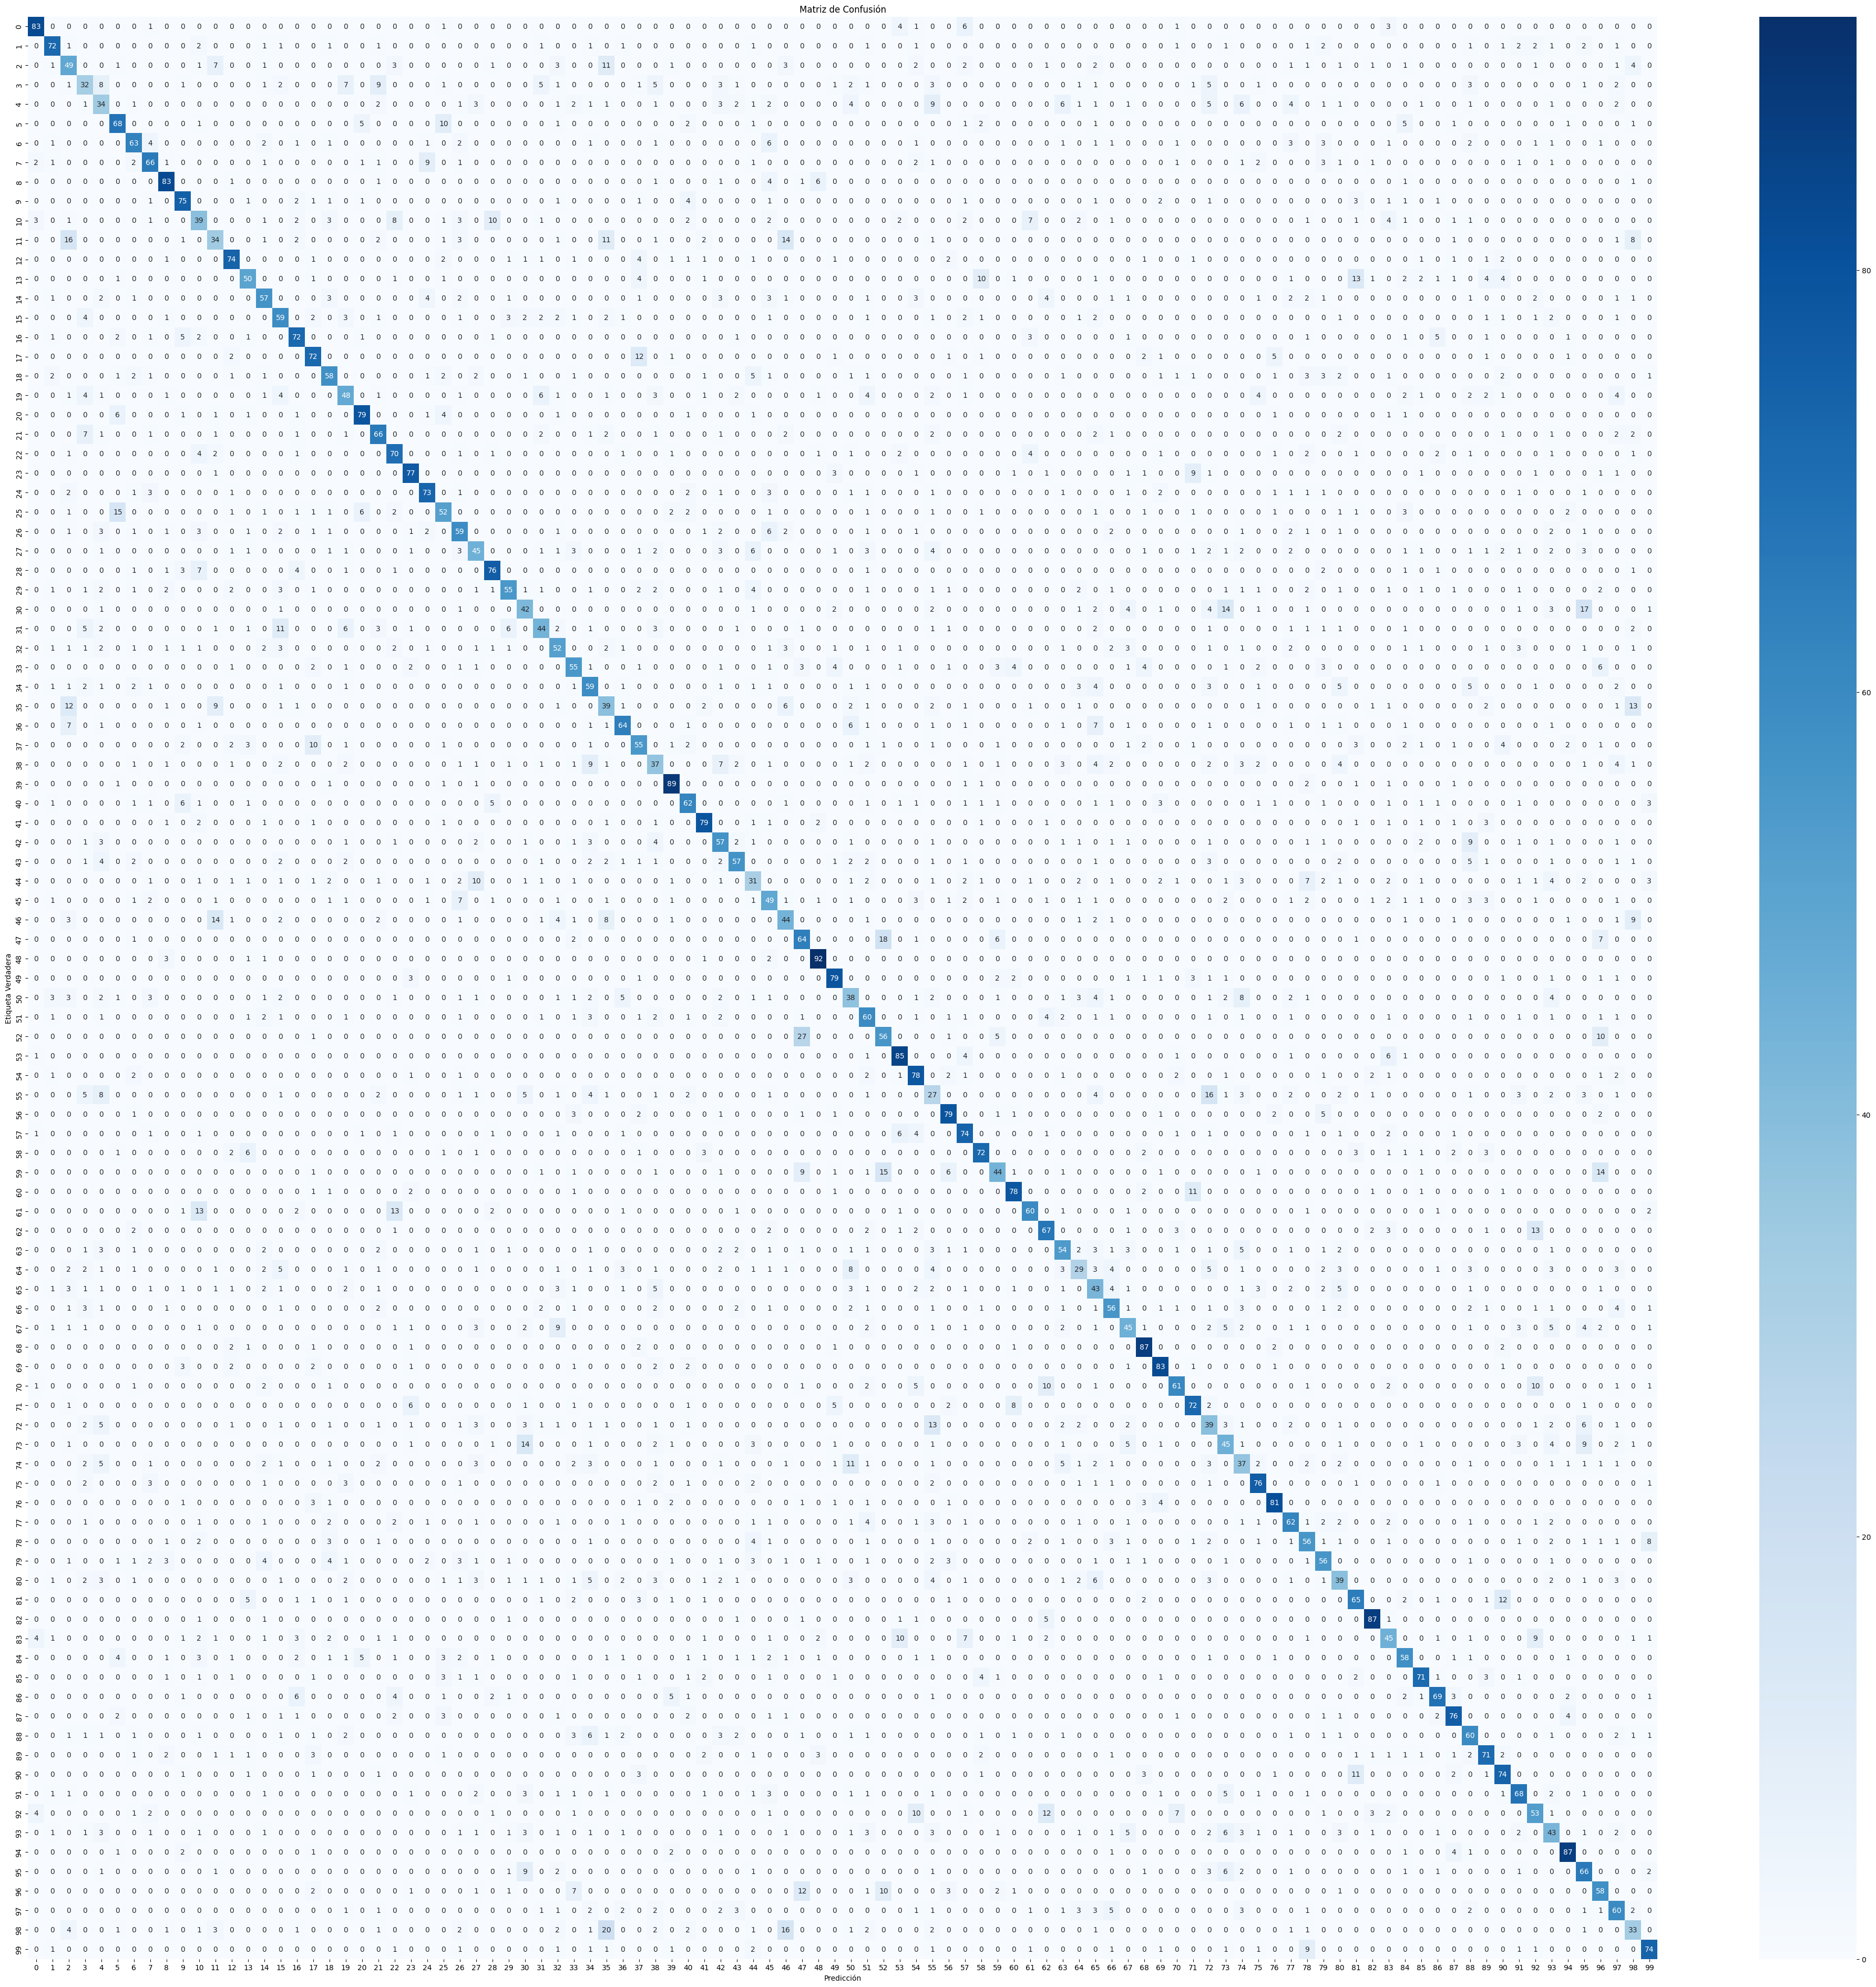


=== Reporte de Clasificación ===
              precision    recall  f1-score   support

     Clase 0       0.84      0.83      0.83       100
     Clase 1       0.75      0.72      0.73       100
     Clase 2       0.42      0.49      0.45       100
     Clase 3       0.39      0.32      0.35       100
     Clase 4       0.34      0.34      0.34       100
     Clase 5       0.64      0.68      0.66       100
     Clase 6       0.66      0.63      0.65       100
     Clase 7       0.67      0.66      0.67       100
     Clase 8       0.77      0.83      0.80       100
     Clase 9       0.71      0.75      0.73       100
    Clase 10       0.42      0.39      0.40       100
    Clase 11       0.43      0.34      0.38       100
    Clase 12       0.74      0.74      0.74       100
    Clase 13       0.64      0.50      0.56       100
    Clase 14       0.60      0.57      0.58       100
    Clase 15       0.53      0.59      0.56       100
    Clase 16       0.69      0.72      0.71    

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
eval_results = model.evaluate(test_dataset, verbose=1)
val_loss = eval_results[0]
val_accuracy = eval_results[1]

# Obtener predicciones y etiquetas verdaderas
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true = np.concatenate([np.argmax(batch[1].numpy(), axis=1) for batch in test_dataset], axis=0)

# Imprimir val_accuracy y val_loss
print("\n=== Resultados del Modelo ===")
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")

# Generar e imprimir matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(50, 48))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# Generar e imprimir reporte de clasificación
class_report = classification_report(y_true, y_pred, target_names=[f"Clase {i}" for i in range(num_classes)])
print("\n=== Reporte de Clasificación ===")
print(class_report)


In [ ]:
# Análisis del error por clase
def analyze_errors(conf_matrix, class_names):
    errors = {}
    for i, class_name in enumerate(class_names):
        true_positives = conf_matrix[i, i]
        false_positives = conf_matrix[:, i].sum() - true_positives
        false_negatives = conf_matrix[i, :].sum() - true_positives
        errors[class_name] = {
            "True Positives": true_positives,
            "False Positives": false_positives,
            "False Negatives": false_negatives,
            "Error Rate": (false_positives + false_negatives) / conf_matrix[i, :].sum()
        }
    return errors

class_names = [f"Clase {i}" for i in range(num_classes)]
error_analysis = analyze_errors(conf_matrix, class_names)

print("\n=== Análisis de Error por Clase ===")
for class_name, metrics in error_analysis.items():
    print(f"{class_name}: ")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


=== Análisis de Error por Clase ===
Clase 0: 
  True Positives: 83
  False Positives: 16
  False Negatives: 17
  Error Rate: 0.33
Clase 1: 
  True Positives: 72
  False Positives: 24
  False Negatives: 28
  Error Rate: 0.52
Clase 2: 
  True Positives: 49
  False Positives: 68
  False Negatives: 51
  Error Rate: 1.19
Clase 3: 
  True Positives: 32
  False Positives: 51
  False Negatives: 68
  Error Rate: 1.19
Clase 4: 
  True Positives: 34
  False Positives: 67
  False Negatives: 66
  Error Rate: 1.33
Clase 5: 
  True Positives: 68
  False Positives: 38
  False Negatives: 32
  Error Rate: 0.7
Clase 6: 
  True Positives: 63
  False Positives: 32
  False Negatives: 37
  Error Rate: 0.69
Clase 7: 
  True Positives: 66
  False Positives: 32
  False Negatives: 34
  Error Rate: 0.66
Clase 8: 
  True Positives: 83
  False Positives: 25
  False Negatives: 17
  Error Rate: 0.42
Clase 9: 
  True Positives: 75
  False Positives: 31
  False Negatives: 25
  Error Rate: 0.56
Clase 10: 
  True Positi

# Vision Transformer (ViT)

Procesado de datos

In [ ]:
import torch
from timm import create_model
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm  # Para mostrar barra de progreso

# Preprocesamiento para entrenamiento
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar a 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Volteo horizontal aleatorio
    transforms.RandomCrop(32, padding=4),   # Recorte aleatorio
    transforms.ToTensor(),                   # Convertir a tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])  # Normalización CIFAR-10
])

# Preprocesamiento para prueba
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar a 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])
])

# Cargar datasets
train_dataset = CIFAR10(root="./data", train=True, download=True, transform=train_transform)
test_dataset = CIFAR10(root="./data", train=False, download=True, transform=test_transform)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Lote pequeño para CPU
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Modelo ViT

In [ ]:
from timm import create_model
import torch
import torch.nn.functional as F  # Interpolación desde PyTorch
from torchsummary import summary

# Crear el modelo con pesos preentrenados
model = create_model(
    "vit_tiny_patch16_224",  # Modelo Tiny ViT
    pretrained=True,         # Usar pesos preentrenados
    num_classes=10           # Ajustado para CIFAR-10 (10 clases)
)

# Modificar el modelo para manejar imágenes de 32x32
model.patch_embed.img_size = (32, 32)  # Cambiar tamaño de entrada
model.patch_embed.grid_size = (2, 2)  # Ajustar el grid
model.head = torch.nn.Linear(model.head.in_features, 10)  # Redefinir la cabeza de salida

# Ajustar los positional embeddings
def resize_positional_embeddings(model, new_grid_size):
    pos_embed = model.pos_embed
    cls_token = pos_embed[:, 0, :]  # Separar el token de clasificación
    pos_tokens = pos_embed[:, 1:, :]  # Extraer los tokens de posición

    # Calcular nuevo tamaño de grid y redimensionar
    current_grid_size = int(pos_tokens.shape[1] ** 0.5)  # Grid actual
    pos_tokens = pos_tokens.reshape(1, current_grid_size, current_grid_size, -1).permute(0, 3, 1, 2)
    pos_tokens = F.interpolate(pos_tokens, size=new_grid_size, mode='bicubic', align_corners=False)
    pos_tokens = pos_tokens.permute(0, 2, 3, 1).reshape(1, -1, pos_tokens.shape[1])

    # Combinar de nuevo con el token de clasificación y convertir a Parameter
    new_pos_embed = torch.cat([cls_token.unsqueeze(1), pos_tokens], dim=1)
    model.pos_embed = torch.nn.Parameter(new_pos_embed)  # Convertir a nn.Parameter

# Aplicar ajuste
resize_positional_embeddings(model, new_grid_size=(2, 2))  # Nuevo grid para 32x32

# Mostrar el resumen del modelo
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 192, 2, 2]         147,648
          Identity-2               [-1, 4, 192]               0
        PatchEmbed-3               [-1, 4, 192]               0
           Dropout-4               [-1, 5, 192]               0
          Identity-5               [-1, 5, 192]               0
          Identity-6               [-1, 5, 192]               0
         LayerNorm-7               [-1, 5, 192]             384
            Linear-8               [-1, 5, 576]         111,168
          Identity-9             [-1, 3, 5, 64]               0
         Identity-10             [-1, 3, 5, 64]               0
           Linear-11               [-1, 5, 192]          37,056
          Dropout-12               [-1, 5, 192]               0
        Attention-13               [-1, 5, 192]               0
         Identity-14               [-1,

Train Model

In [ ]:
from torch.optim.lr_scheduler import StepLR

# Optimizador con tasa de aprendizaje reducida
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)  # Tasa de aprendizaje baja

# Scheduler para reducir la tasa de aprendizaje cada 5 épocas
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)


In [ ]:
# Inicializar listas para guardar métricas
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Entrenamiento
epochs = 20
criterion = CrossEntropyLoss()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

    # Bucle de entrenamiento
    for images, labels in loop:
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calcular pérdida

        # Backward pass
        optimizer.zero_grad()  # Resetear gradientes
        loss.backward()
        optimizer.step()

        # Actualizar métricas
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loop.set_postfix(loss=running_loss / len(train_loader))

    # Guardar métricas de entrenamiento
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validación
    model.eval()
    running_loss_test = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calcular pérdida

            # Actualizar métricas de prueba
            running_loss_test += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    # Guardar métricas de prueba
    test_loss = running_loss_test / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}: Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Actualizar el scheduler
    scheduler.step()

Epoch 1/20: 100%|██████████| 1563/1563 [06:11<00:00,  4.21it/s, loss=1.48]


Epoch 1: Train Loss: 1.4762, Train Accuracy: 46.01%
Epoch 1: Test Loss: 1.2179, Test Accuracy: 56.07%


Epoch 2/20: 100%|██████████| 1563/1563 [06:00<00:00,  4.33it/s, loss=1.14]


Epoch 2: Train Loss: 1.1393, Train Accuracy: 59.05%
Epoch 2: Test Loss: 1.0278, Test Accuracy: 62.91%


Epoch 3/20: 100%|██████████| 1563/1563 [06:04<00:00,  4.29it/s, loss=1.01]


Epoch 3: Train Loss: 1.0143, Train Accuracy: 63.61%
Epoch 3: Test Loss: 0.9478, Test Accuracy: 65.96%


Epoch 4/20: 100%|██████████| 1563/1563 [06:02<00:00,  4.32it/s, loss=0.94]


Epoch 4: Train Loss: 0.9399, Train Accuracy: 66.36%
Epoch 4: Test Loss: 0.8573, Test Accuracy: 69.62%


Epoch 5/20: 100%|██████████| 1563/1563 [06:06<00:00,  4.26it/s, loss=0.89]


Epoch 5: Train Loss: 0.8901, Train Accuracy: 68.26%
Epoch 5: Test Loss: 0.8611, Test Accuracy: 69.40%


Epoch 6/20: 100%|██████████| 1563/1563 [06:00<00:00,  4.34it/s, loss=0.825]


Epoch 6: Train Loss: 0.8253, Train Accuracy: 70.49%
Epoch 6: Test Loss: 0.8069, Test Accuracy: 71.56%


Epoch 7/20: 100%|██████████| 1563/1563 [06:02<00:00,  4.31it/s, loss=0.81]


Epoch 7: Train Loss: 0.8098, Train Accuracy: 71.24%
Epoch 7: Test Loss: 0.7983, Test Accuracy: 71.85%


Epoch 8/20: 100%|██████████| 1563/1563 [06:03<00:00,  4.30it/s, loss=0.808]


Epoch 8: Train Loss: 0.8083, Train Accuracy: 71.14%
Epoch 8: Test Loss: 0.7953, Test Accuracy: 71.89%


Epoch 9/20: 100%|██████████| 1563/1563 [06:16<00:00,  4.15it/s, loss=0.798]


Epoch 9: Train Loss: 0.7982, Train Accuracy: 71.73%
Epoch 9: Test Loss: 0.7887, Test Accuracy: 72.01%


Epoch 10/20: 100%|██████████| 1563/1563 [06:06<00:00,  4.27it/s, loss=0.796]


Epoch 10: Train Loss: 0.7965, Train Accuracy: 71.62%
Epoch 10: Test Loss: 0.7943, Test Accuracy: 71.58%


Epoch 11/20: 100%|██████████| 1563/1563 [06:07<00:00,  4.26it/s, loss=0.787]


Epoch 11: Train Loss: 0.7870, Train Accuracy: 71.82%
Epoch 11: Test Loss: 0.7842, Test Accuracy: 72.02%


Epoch 12/20: 100%|██████████| 1563/1563 [06:06<00:00,  4.27it/s, loss=0.788]


Epoch 12: Train Loss: 0.7881, Train Accuracy: 71.89%
Epoch 12: Test Loss: 0.7843, Test Accuracy: 72.10%


Epoch 13/20: 100%|██████████| 1563/1563 [06:00<00:00,  4.34it/s, loss=0.783]


Epoch 13: Train Loss: 0.7827, Train Accuracy: 72.21%
Epoch 13: Test Loss: 0.7844, Test Accuracy: 72.07%


Epoch 14/20: 100%|██████████| 1563/1563 [05:58<00:00,  4.36it/s, loss=0.784]


Epoch 14: Train Loss: 0.7843, Train Accuracy: 72.02%
Epoch 14: Test Loss: 0.7841, Test Accuracy: 72.19%


Epoch 15/20: 100%|██████████| 1563/1563 [06:01<00:00,  4.33it/s, loss=0.786]


Epoch 15: Train Loss: 0.7859, Train Accuracy: 71.95%
Epoch 15: Test Loss: 0.7842, Test Accuracy: 72.22%


Epoch 16/20: 100%|██████████| 1563/1563 [06:51<00:00,  3.80it/s, loss=0.78]


Epoch 16: Train Loss: 0.7797, Train Accuracy: 72.18%
Epoch 16: Test Loss: 0.7831, Test Accuracy: 72.20%


Epoch 17/20: 100%|██████████| 1563/1563 [06:33<00:00,  3.97it/s, loss=0.785]


Epoch 17: Train Loss: 0.7848, Train Accuracy: 72.00%
Epoch 17: Test Loss: 0.7828, Test Accuracy: 72.18%


Epoch 18/20: 100%|██████████| 1563/1563 [06:09<00:00,  4.23it/s, loss=0.785]


Epoch 18: Train Loss: 0.7851, Train Accuracy: 71.94%
Epoch 18: Test Loss: 0.7825, Test Accuracy: 72.16%


Epoch 19/20: 100%|██████████| 1563/1563 [06:06<00:00,  4.26it/s, loss=0.785]


Epoch 19: Train Loss: 0.7850, Train Accuracy: 71.97%
Epoch 19: Test Loss: 0.7825, Test Accuracy: 72.19%


Epoch 20/20: 100%|██████████| 1563/1563 [05:55<00:00,  4.40it/s, loss=0.784]


Epoch 20: Train Loss: 0.7838, Train Accuracy: 72.26%
Epoch 20: Test Loss: 0.7823, Test Accuracy: 72.17%


Learning curve/Loss Curve

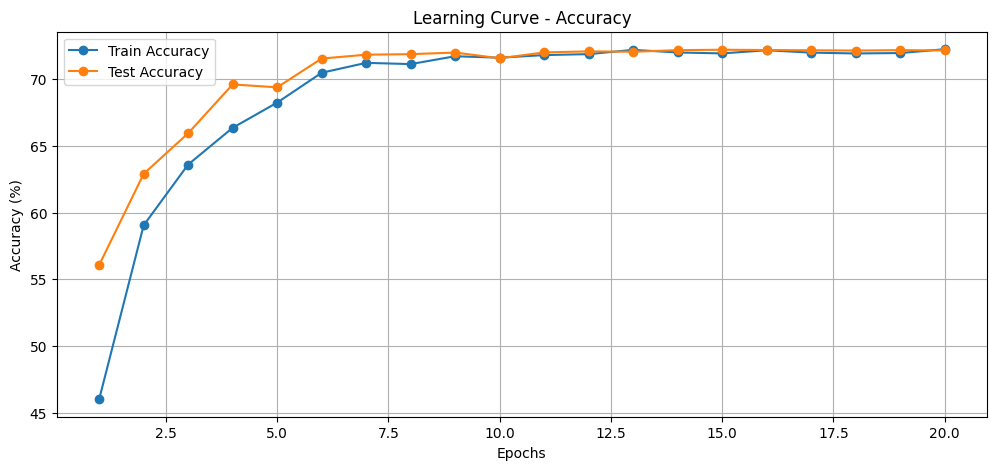

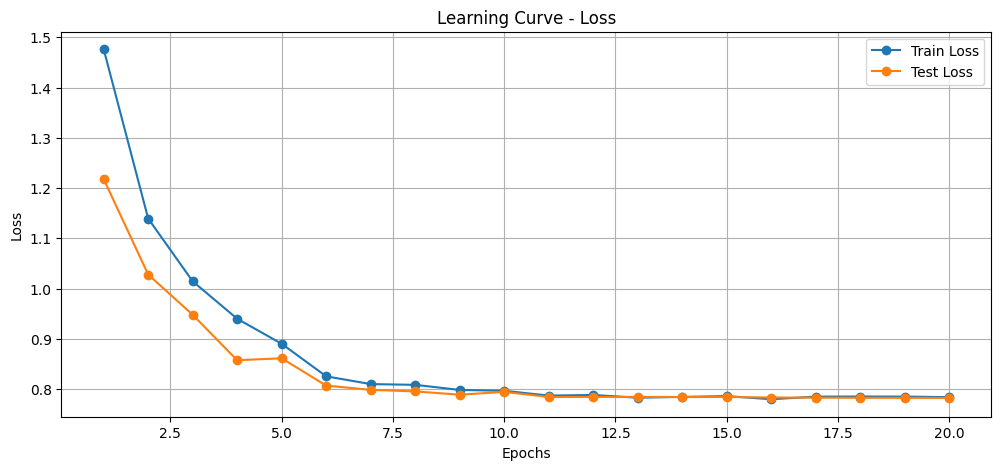

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar las curvas de precisión y pérdida
def plot_learning_curves(train_accuracies, test_accuracies, train_losses, test_losses):
    epochs = range(1, len(train_accuracies) + 1)

    # Gráfica de precisión
    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Learning Curve - Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfica de pérdida
    plt.figure(figsize=(12, 5))
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve - Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de que train_accuracies, test_accuracies, train_losses, test_losses estén definidos
plot_learning_curves(train_accuracies, test_accuracies, train_losses, test_losses)


Model Evaluation

Test Loss: 0.7823
Test Accuracy: 72.17%


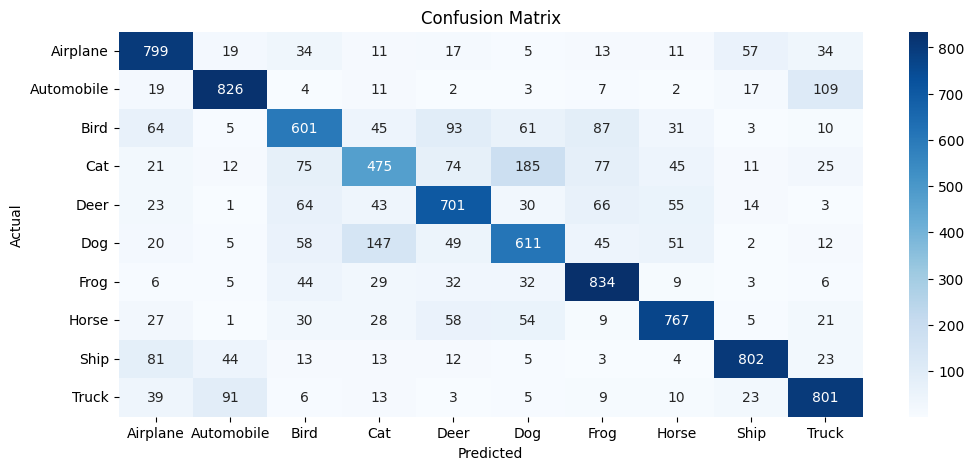


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.73      0.80      0.76      1000
  Automobile       0.82      0.83      0.82      1000
        Bird       0.65      0.60      0.62      1000
         Cat       0.58      0.47      0.52      1000
        Deer       0.67      0.70      0.69      1000
         Dog       0.62      0.61      0.61      1000
        Frog       0.73      0.83      0.78      1000
       Horse       0.78      0.77      0.77      1000
        Ship       0.86      0.80      0.83      1000
       Truck       0.77      0.80      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Función para evaluar el modelo y obtener métricas
def evaluate_model(model, test_loader, criterion, class_names):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calcular pérdida
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Calcular métricas
    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Generar matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)
    generate_confusion_matrix(cm, class_names)

    # Generar reporte de clasificación
    report = classification_report(all_labels, all_preds, target_names=class_names)
    print("\nClassification Report:")
    print(report)

# Función para generar una matriz de confusión bonita
def generate_confusion_matrix(cm, class_names):
    plt.figure(figsize=(12, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Definir las clases de CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Evaluar el modelo después del entrenamiento
criterion = torch.nn.CrossEntropyLoss()
evaluate_model(model, test_loader, criterion, class_names)


Analisis de Error

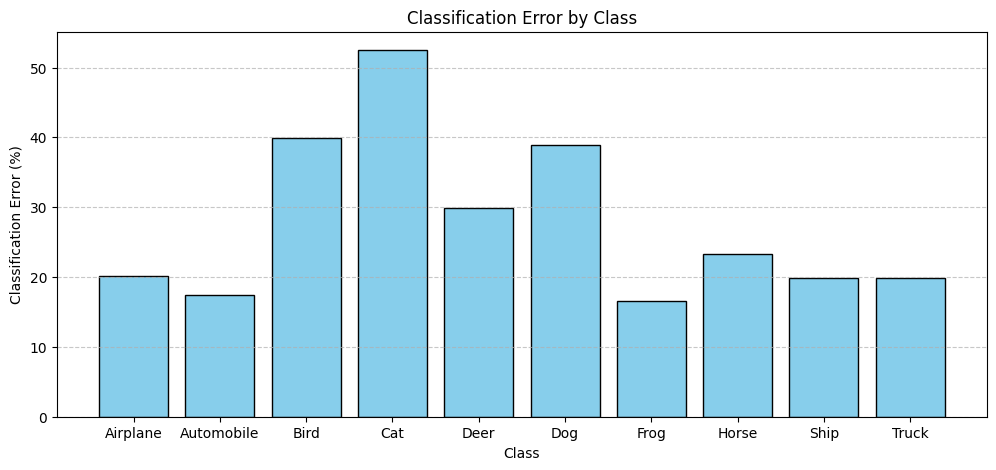

Error en la clase Airplane: 20.10%
Error en la clase Automobile: 17.40%
Error en la clase Bird: 39.90%
Error en la clase Cat: 52.50%
Error en la clase Deer: 29.90%
Error en la clase Dog: 38.90%
Error en la clase Frog: 16.60%
Error en la clase Horse: 23.30%
Error en la clase Ship: 19.80%
Error en la clase Truck: 19.90%


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el error de clasificación por clase
def classification_error_by_class(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generar matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)

    # Calcular el error de clasificación por clase
    errors = []
    for i in range(len(class_names)):
        total_samples = cm[i, :].sum()  # Total de muestras reales de la clase i
        correct_predictions = cm[i, i]  # Predicciones correctas para la clase i
        error = 1 - (correct_predictions / total_samples)
        errors.append(error * 100)  # Error en porcentaje

    # Graficar el error por clase
    plt.figure(figsize=(12, 5))
    plt.bar(class_names, errors, color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Classification Error (%)')
    plt.title('Classification Error by Class')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Imprimir errores por clase
    for i, class_name in enumerate(class_names):
        print(f"Error en la clase {class_name}: {errors[i]:.2f}%")

# Definir las clases de CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Llamar a la función para calcular y graficar los errores
classification_error_by_class(model, test_loader, class_names)


# Vision Transformer (ViT mejorado)

Procesado de datos

In [ ]:
import torch
from timm import create_model
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm  # Para mostrar barra de progreso

# Preprocesamiento para entrenamiento
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar a 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Volteo horizontal aleatorio
    transforms.RandomCrop(32, padding=4),   # Recorte aleatorio
    transforms.ToTensor(),                   # Convertir a tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])  # Normalización CIFAR-10
])

# Preprocesamiento para prueba
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar a 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])
])

# Cargar datasets
train_dataset = CIFAR10(root="./data", train=True, download=True, transform=train_transform)
test_dataset = CIFAR10(root="./data", train=False, download=True, transform=test_transform)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Lote pequeño para CPU
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Crear modelo ViT

In [ ]:
from timm import create_model
import torch
import torch.nn.functional as F  # Interpolación desde PyTorch
from torchsummary import summary
from torch.optim.lr_scheduler import CosineAnnealingLR

# Crear el modelo con pesos preentrenados
model = create_model(
    "vit_tiny_patch16_224",  # Modelo Tiny ViT
    pretrained=True,         # Usar pesos preentrenados
    num_classes=10           # Ajustado para CIFAR-10 (10 clases)
)

# Modificar el modelo para manejar imágenes de 32x32
model.patch_embed.img_size = (32, 32)  # Cambiar tamaño de entrada
model.patch_embed.grid_size = (2, 2)  # Ajustar el grid
model.head = torch.nn.Linear(model.head.in_features, 10)  # Redefinir la cabeza de salida

# Ajustar los positional embeddings
def resize_positional_embeddings(model, new_grid_size):
    pos_embed = model.pos_embed
    cls_token = pos_embed[:, 0, :]  # Separar el token de clasificación
    pos_tokens = pos_embed[:, 1:, :]  # Extraer los tokens de posición

    # Calcular nuevo tamaño de grid y redimensionar
    current_grid_size = int(pos_tokens.shape[1] ** 0.5)  # Grid actual
    pos_tokens = pos_tokens.reshape(1, current_grid_size, current_grid_size, -1).permute(0, 3, 1, 2)
    pos_tokens = F.interpolate(pos_tokens, size=new_grid_size, mode='bicubic', align_corners=False)
    pos_tokens = pos_tokens.permute(0, 2, 3, 1).reshape(1, -1, pos_tokens.shape[1])

    # Combinar de nuevo con el token de clasificación y convertir a Parameter
    new_pos_embed = torch.cat([cls_token.unsqueeze(1), pos_tokens], dim=1)
    model.pos_embed = torch.nn.Parameter(new_pos_embed)  # Convertir a nn.Parameter

# Aplicar ajuste
resize_positional_embeddings(model, new_grid_size=(2, 2))  # Nuevo grid para 32x32

# Mostrar el resumen del modelo
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 192, 2, 2]         147,648
          Identity-2               [-1, 4, 192]               0
        PatchEmbed-3               [-1, 4, 192]               0
           Dropout-4               [-1, 5, 192]               0
          Identity-5               [-1, 5, 192]               0
          Identity-6               [-1, 5, 192]               0
         LayerNorm-7               [-1, 5, 192]             384
            Linear-8               [-1, 5, 576]         111,168
          Identity-9             [-1, 3, 5, 64]               0
         Identity-10             [-1, 3, 5, 64]               0
           Linear-11               [-1, 5, 192]          37,056
          Dropout-12               [-1, 5, 192]               0
        Attention-13               [-1, 5, 192]               0
         Identity-14               [-1,

Train Model

In [ ]:
# Regularización
model.head = torch.nn.Sequential(
    torch.nn.Dropout(0.3),  # Dropout antes de la capa final
    torch.nn.Linear(model.head.in_features, 10)
)

# Optimización con SGD y CosineAnnealing
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
# Inicializar listas para guardar métricas
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Entrenamiento
epochs = 20
criterion = CrossEntropyLoss()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

    # Bucle de entrenamiento
    for images, labels in loop:
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calcular pérdida

        # Backward pass
        optimizer.zero_grad()  # Resetear gradientes
        loss.backward()
        optimizer.step()

        # Actualizar métricas
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loop.set_postfix(loss=running_loss / len(train_loader))

    # Guardar métricas de entrenamiento
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validación
    model.eval()
    running_loss_test = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calcular pérdida

            # Actualizar métricas de prueba
            running_loss_test += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    # Guardar métricas de prueba
    test_loss = running_loss_test / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}: Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Actualizar el scheduler
    scheduler.step()


Epoch 1/20: 100%|██████████| 1563/1563 [05:56<00:00,  4.38it/s, loss=1.88]


Epoch 1: Train Loss: 1.8812, Train Accuracy: 28.72%
Epoch 1: Test Loss: 1.5379, Test Accuracy: 42.30%


Epoch 2/20: 100%|██████████| 1563/1563 [05:22<00:00,  4.85it/s, loss=1.45]


Epoch 2: Train Loss: 1.4530, Train Accuracy: 46.76%
Epoch 2: Test Loss: 1.2620, Test Accuracy: 53.52%


Epoch 3/20: 100%|██████████| 1563/1563 [05:28<00:00,  4.76it/s, loss=1.28]


Epoch 3: Train Loss: 1.2847, Train Accuracy: 53.38%
Epoch 3: Test Loss: 1.1686, Test Accuracy: 58.30%


Epoch 4/20: 100%|██████████| 1563/1563 [05:25<00:00,  4.80it/s, loss=1.19]


Epoch 4: Train Loss: 1.1917, Train Accuracy: 57.19%
Epoch 4: Test Loss: 1.0694, Test Accuracy: 61.78%


Epoch 5/20: 100%|██████████| 1563/1563 [05:23<00:00,  4.83it/s, loss=1.12]


Epoch 5: Train Loss: 1.1234, Train Accuracy: 59.73%
Epoch 5: Test Loss: 1.0354, Test Accuracy: 63.23%


Epoch 6/20: 100%|██████████| 1563/1563 [05:21<00:00,  4.86it/s, loss=1.07]


Epoch 6: Train Loss: 1.0707, Train Accuracy: 61.68%
Epoch 6: Test Loss: 1.0426, Test Accuracy: 62.96%


Epoch 7/20: 100%|██████████| 1563/1563 [05:19<00:00,  4.89it/s, loss=1.02]


Epoch 7: Train Loss: 1.0225, Train Accuracy: 63.69%
Epoch 7: Test Loss: 0.9552, Test Accuracy: 65.92%


Epoch 8/20: 100%|██████████| 1563/1563 [05:22<00:00,  4.85it/s, loss=0.977]


Epoch 8: Train Loss: 0.9770, Train Accuracy: 65.25%
Epoch 8: Test Loss: 0.8992, Test Accuracy: 68.31%


Epoch 9/20: 100%|██████████| 1563/1563 [05:25<00:00,  4.80it/s, loss=0.928]


Epoch 9: Train Loss: 0.9275, Train Accuracy: 66.96%
Epoch 9: Test Loss: 0.8706, Test Accuracy: 68.98%


Epoch 10/20: 100%|██████████| 1563/1563 [05:27<00:00,  4.78it/s, loss=0.889]


Epoch 10: Train Loss: 0.8892, Train Accuracy: 68.31%
Epoch 10: Test Loss: 0.8292, Test Accuracy: 70.48%


Epoch 11/20: 100%|██████████| 1563/1563 [05:27<00:00,  4.78it/s, loss=0.84]


Epoch 11: Train Loss: 0.8396, Train Accuracy: 70.15%
Epoch 11: Test Loss: 0.8267, Test Accuracy: 71.20%


Epoch 12/20: 100%|██████████| 1563/1563 [05:24<00:00,  4.82it/s, loss=0.8]


Epoch 12: Train Loss: 0.7996, Train Accuracy: 71.63%
Epoch 12: Test Loss: 0.7926, Test Accuracy: 72.24%


Epoch 13/20: 100%|██████████| 1563/1563 [05:23<00:00,  4.83it/s, loss=0.759]


Epoch 13: Train Loss: 0.7588, Train Accuracy: 72.90%
Epoch 13: Test Loss: 0.7589, Test Accuracy: 73.74%


Epoch 14/20: 100%|██████████| 1563/1563 [05:23<00:00,  4.84it/s, loss=0.718]


Epoch 14: Train Loss: 0.7179, Train Accuracy: 74.43%
Epoch 14: Test Loss: 0.7424, Test Accuracy: 74.08%


Epoch 15/20: 100%|██████████| 1563/1563 [05:23<00:00,  4.83it/s, loss=0.678]


Epoch 15: Train Loss: 0.6783, Train Accuracy: 76.30%
Epoch 15: Test Loss: 0.7110, Test Accuracy: 75.24%


Epoch 16/20: 100%|██████████| 1563/1563 [05:27<00:00,  4.78it/s, loss=0.649]


Epoch 16: Train Loss: 0.6485, Train Accuracy: 77.06%
Epoch 16: Test Loss: 0.6921, Test Accuracy: 75.93%


Epoch 17/20: 100%|██████████| 1563/1563 [05:22<00:00,  4.84it/s, loss=0.614]


Epoch 17: Train Loss: 0.6142, Train Accuracy: 78.24%
Epoch 17: Test Loss: 0.6908, Test Accuracy: 76.34%


Epoch 18/20: 100%|██████████| 1563/1563 [05:25<00:00,  4.80it/s, loss=0.588]


Epoch 18: Train Loss: 0.5880, Train Accuracy: 79.03%
Epoch 18: Test Loss: 0.6654, Test Accuracy: 76.91%


Epoch 19/20: 100%|██████████| 1563/1563 [05:25<00:00,  4.80it/s, loss=0.572]


Epoch 19: Train Loss: 0.5724, Train Accuracy: 79.80%
Epoch 19: Test Loss: 0.6621, Test Accuracy: 76.95%


Epoch 20/20: 100%|██████████| 1563/1563 [05:25<00:00,  4.80it/s, loss=0.563]


Epoch 20: Train Loss: 0.5634, Train Accuracy: 80.07%
Epoch 20: Test Loss: 0.6584, Test Accuracy: 77.29%


Learning Curve/Loss Curve

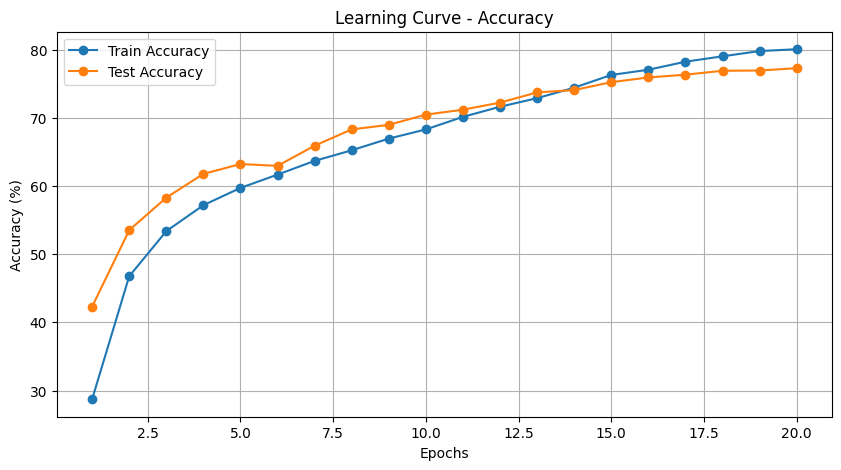

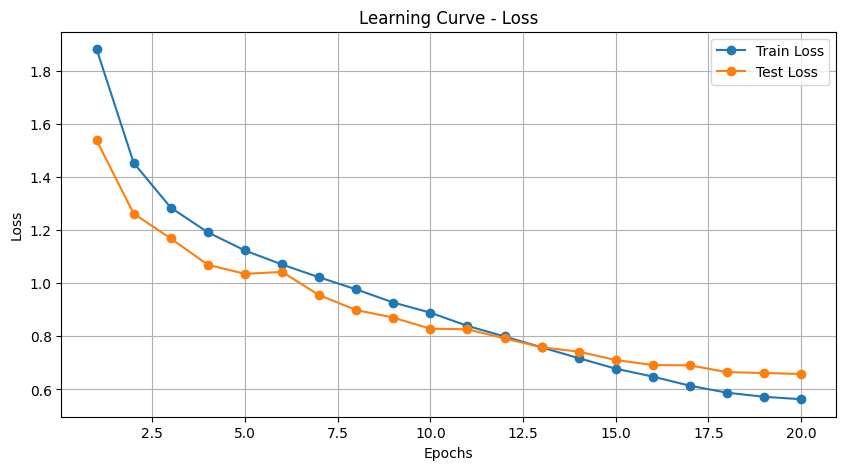

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar las curvas de precisión y pérdida
def plot_learning_curves(train_accuracies, test_accuracies, train_losses, test_losses):
    epochs = range(1, len(train_accuracies) + 1)

    # Gráfica de precisión
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Learning Curve - Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfica de pérdida
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve - Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de que train_accuracies, test_accuracies, train_losses, test_losses estén definidos
plot_learning_curves(train_accuracies, test_accuracies, train_losses, test_losses)

Evaluacion del modelo

Test Loss: 0.6584
Test Accuracy: 77.29%


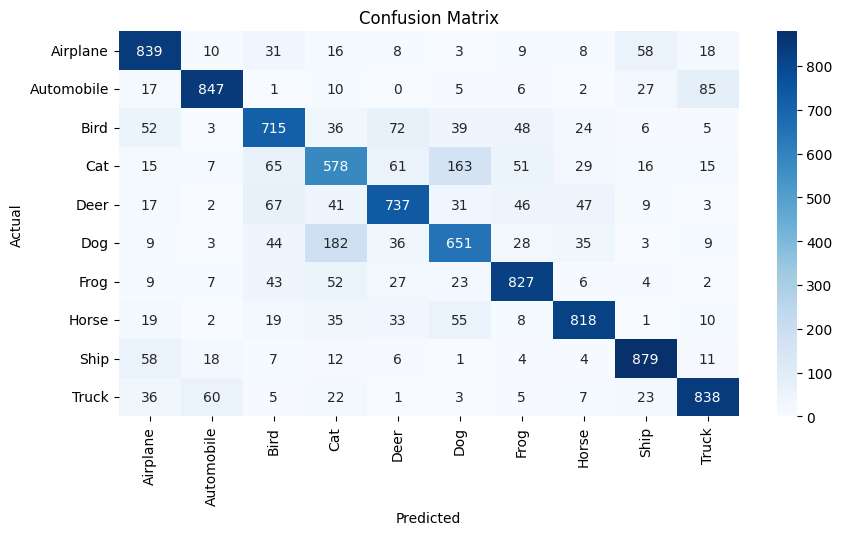


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.78      0.84      0.81      1000
  Automobile       0.88      0.85      0.86      1000
        Bird       0.72      0.71      0.72      1000
         Cat       0.59      0.58      0.58      1000
        Deer       0.75      0.74      0.74      1000
         Dog       0.67      0.65      0.66      1000
        Frog       0.80      0.83      0.81      1000
       Horse       0.83      0.82      0.83      1000
        Ship       0.86      0.88      0.87      1000
       Truck       0.84      0.84      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Función para evaluar el modelo y obtener métricas
def evaluate_model(model, test_loader, criterion, class_names):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calcular pérdida
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Calcular métricas
    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Generar matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)
    generate_confusion_matrix(cm, class_names)

    # Generar reporte de clasificación
    report = classification_report(all_labels, all_preds, target_names=class_names)
    print("\nClassification Report:")
    print(report)

# Función para generar una matriz de confusión bonita
def generate_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Definir las clases de CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Evaluar el modelo después del entrenamiento
criterion = torch.nn.CrossEntropyLoss()
evaluate_model(model, test_loader, criterion, class_names)


Analisis del error

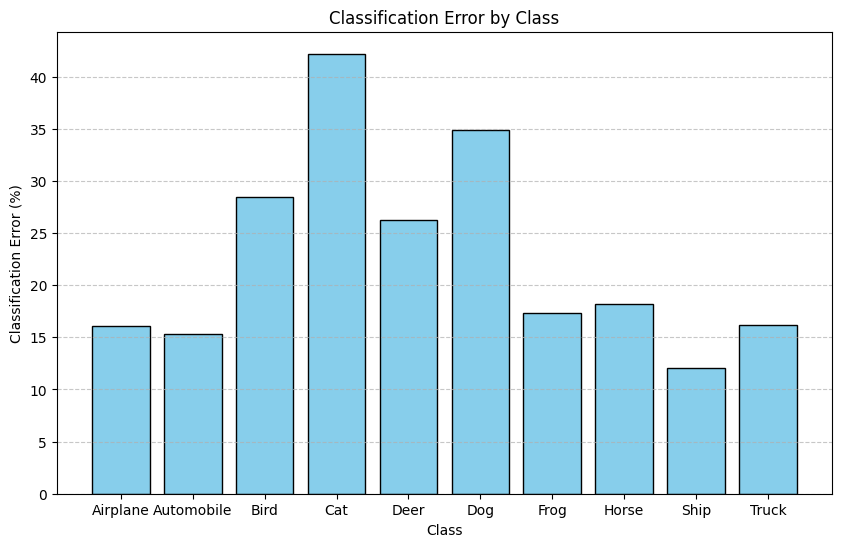

Error en la clase Airplane: 16.10%
Error en la clase Automobile: 15.30%
Error en la clase Bird: 28.50%
Error en la clase Cat: 42.20%
Error en la clase Deer: 26.30%
Error en la clase Dog: 34.90%
Error en la clase Frog: 17.30%
Error en la clase Horse: 18.20%
Error en la clase Ship: 12.10%
Error en la clase Truck: 16.20%


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el error de clasificación por clase
def classification_error_by_class(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generar matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)

    # Calcular el error de clasificación por clase
    errors = []
    for i in range(len(class_names)):
        total_samples = cm[i, :].sum()  # Total de muestras reales de la clase i
        correct_predictions = cm[i, i]  # Predicciones correctas para la clase i
        error = 1 - (correct_predictions / total_samples)
        errors.append(error * 100)  # Error en porcentaje

    # Graficar el error por clase
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, errors, color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Classification Error (%)')
    plt.title('Classification Error by Class')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Imprimir errores por clase
    for i, class_name in enumerate(class_names):
        print(f"Error en la clase {class_name}: {errors[i]:.2f}%")

# Definir las clases de CIFAR-10
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Llamar a la función para calcular y graficar los errores
classification_error_by_class(model, test_loader, class_names)

# Convolucional Encoder

Procesado de datos

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from timm import create_model
from torchsummary import summary

# Configuración básica
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
epochs = 10
learning_rate = 0.001

# Preprocesamiento de datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Crear Model Encoder convolucional seguido de un ViT

In [ ]:
# Modelo: Encoder convolucional seguido de un ViT
class EncoderViT(nn.Module):
    def __init__(self):
        super(EncoderViT, self).__init__()
        # Encoder convolucional
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU()
        )
        # Clasificador
        self.classifier = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.encoder(x)  # Salida del encoder
        x = self.classifier(x)  # Pasar por el clasificador
        return x

model = EncoderViT().to(device)

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Función para evaluar el modelo
def evaluate(model, loader):
    model.eval()
    total_loss, total_correct = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()
    accuracy = 100 * total_correct / len(loader.dataset)
    return total_loss / len(loader), accuracy
# Mostrar el resumen del modelo
summary(model, input_size=(3, 32, 32))  # Ajusta el tamaño según tus datos

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 16, 16]             448
              ReLU-2           [-1, 16, 16, 16]               0
            Conv2d-3             [-1, 32, 8, 8]           4,640
              ReLU-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 4, 4]          18,496
              ReLU-6             [-1, 64, 4, 4]               0
           Flatten-7                 [-1, 1024]               0
            Linear-8                  [-1, 128]         131,200
              ReLU-9                  [-1, 128]               0
           Linear-10                  [-1, 256]          33,024
             ReLU-11                  [-1, 256]               0
           Linear-12                   [-1, 10]           2,570
Total params: 190,378
Trainable params: 190,378
Non-trainable params: 0
-------------------------------

Train model

In [ ]:
# Listas para almacenar los valores de pérdida y precisión
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# Entrenamiento con registro
for epoch in range(epochs):
    model.train()
    total_loss, total_correct = 0, 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward y backward
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += (outputs.argmax(1) == labels).sum().item()
        progress_bar.set_postfix(loss=loss.item())

    train_loss = total_loss / len(train_loader)
    train_accuracy = 100 * total_correct / len(train_loader.dataset)
    test_loss, test_accuracy = evaluate(model, test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Mostrar los resultados por epoch
    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/10: 100%|██████████| 1563/1563 [01:15<00:00, 20.75batch/s, loss=0.378]


Epoch 1/10: Train Loss: 0.4175, Train Accuracy: 84.83%, Test Loss: 1.2877, Test Accuracy: 65.12%


Epoch 2/10: 100%|██████████| 1563/1563 [00:50<00:00, 30.97batch/s, loss=0.467]


Epoch 2/10: Train Loss: 0.3666, Train Accuracy: 86.92%, Test Loss: 1.3528, Test Accuracy: 65.35%


Epoch 3/10: 100%|██████████| 1563/1563 [00:51<00:00, 30.16batch/s, loss=0.544]


Epoch 3/10: Train Loss: 0.3291, Train Accuracy: 88.07%, Test Loss: 1.4823, Test Accuracy: 65.49%


Epoch 4/10: 100%|██████████| 1563/1563 [00:51<00:00, 30.48batch/s, loss=0.809]


Epoch 4/10: Train Loss: 0.2979, Train Accuracy: 89.14%, Test Loss: 1.5346, Test Accuracy: 65.60%


Epoch 5/10: 100%|██████████| 1563/1563 [00:54<00:00, 28.43batch/s, loss=0.0191]


Epoch 5/10: Train Loss: 0.2789, Train Accuracy: 89.82%, Test Loss: 1.6015, Test Accuracy: 65.66%


Epoch 6/10: 100%|██████████| 1563/1563 [00:51<00:00, 30.64batch/s, loss=0.12]


Epoch 6/10: Train Loss: 0.2497, Train Accuracy: 91.00%, Test Loss: 1.7074, Test Accuracy: 65.04%


Epoch 7/10: 100%|██████████| 1563/1563 [00:51<00:00, 30.64batch/s, loss=0.078]


Epoch 7/10: Train Loss: 0.2361, Train Accuracy: 91.58%, Test Loss: 1.7435, Test Accuracy: 65.40%


Epoch 8/10: 100%|██████████| 1563/1563 [00:50<00:00, 30.85batch/s, loss=0.122]


Epoch 8/10: Train Loss: 0.2181, Train Accuracy: 92.10%, Test Loss: 1.8975, Test Accuracy: 63.65%


Epoch 9/10: 100%|██████████| 1563/1563 [00:50<00:00, 30.95batch/s, loss=0.229]


Epoch 9/10: Train Loss: 0.2068, Train Accuracy: 92.57%, Test Loss: 2.0721, Test Accuracy: 64.82%


Epoch 10/10: 100%|██████████| 1563/1563 [00:50<00:00, 30.86batch/s, loss=0.556]


Epoch 10/10: Train Loss: 0.1972, Train Accuracy: 92.94%, Test Loss: 2.0802, Test Accuracy: 63.85%


Learning curve/ Loss curve

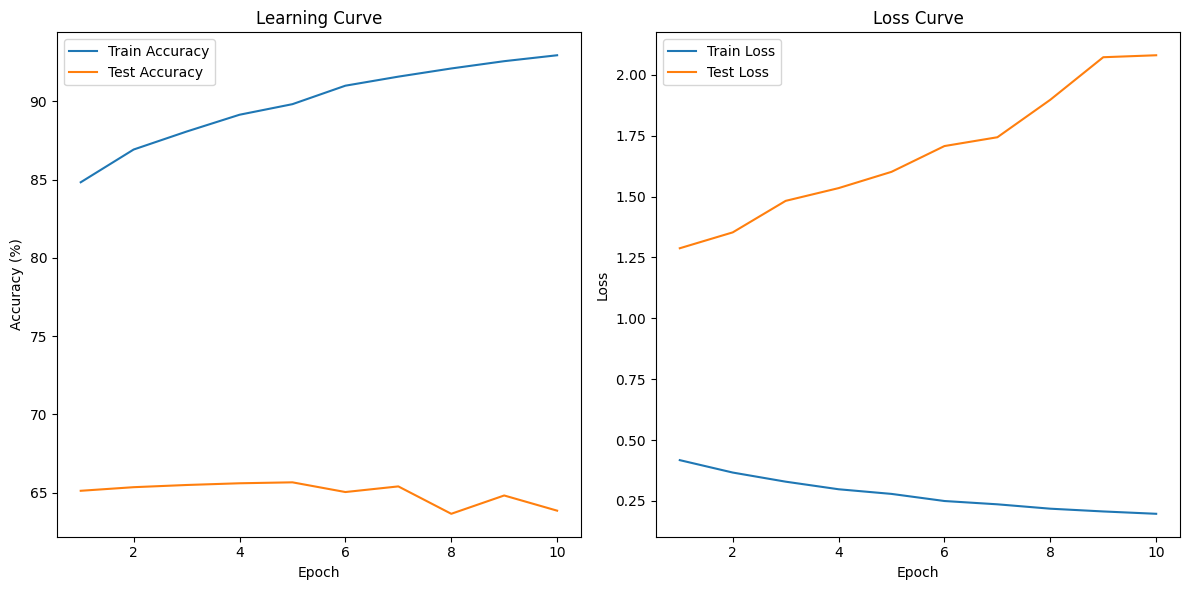

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gráficas
plt.figure(figsize=(12, 6))

# Learning Curve
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Learning Curve")
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.tight_layout()
plt.show()

Model Evaluation

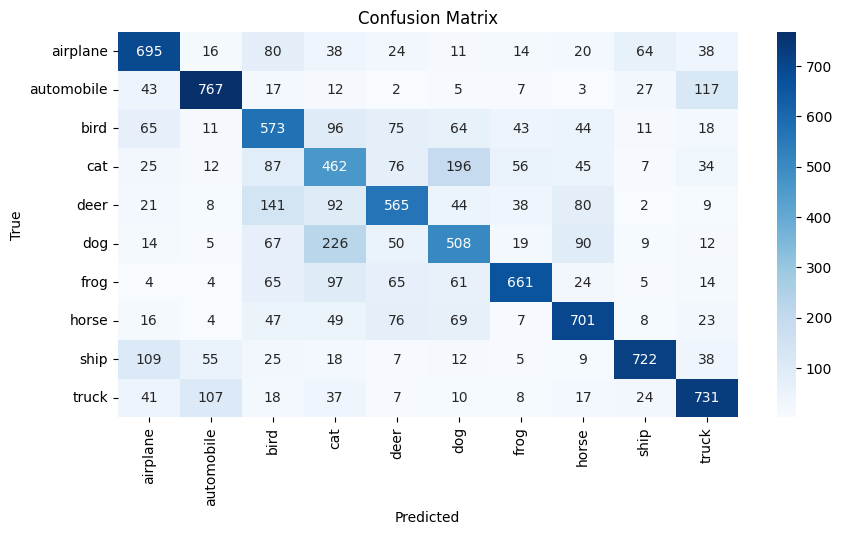

Classification Report:
               precision    recall  f1-score   support

    airplane       0.67      0.69      0.68      1000
  automobile       0.78      0.77      0.77      1000
        bird       0.51      0.57      0.54      1000
         cat       0.41      0.46      0.43      1000
        deer       0.60      0.56      0.58      1000
         dog       0.52      0.51      0.51      1000
        frog       0.77      0.66      0.71      1000
       horse       0.68      0.70      0.69      1000
        ship       0.82      0.72      0.77      1000
       truck       0.71      0.73      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Evaluación y predicción
def evaluate_with_predictions(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)

# Obtener predicciones
y_pred, y_true = evaluate_with_predictions(model, test_loader)

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Reporte de clasificación
report = classification_report(y_true, y_pred, target_names=train_dataset.classes)
print("Classification Report:\n", report)


Tasa de Errores por clase

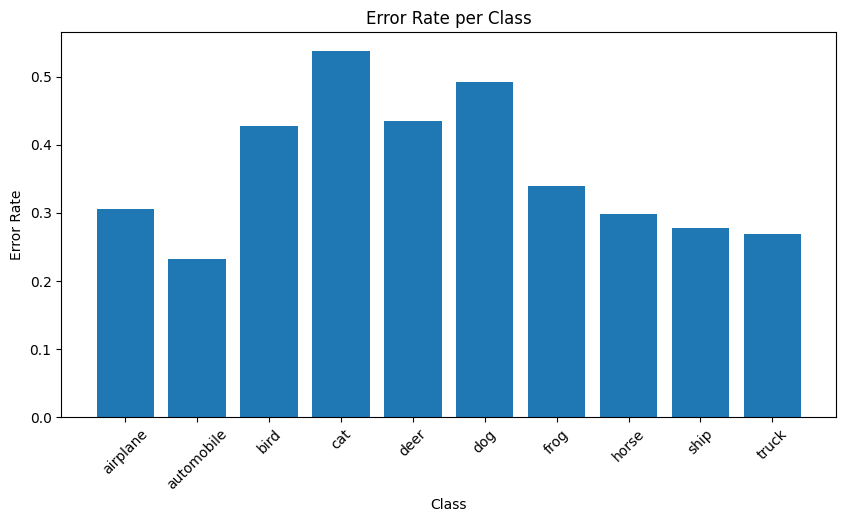

Class 'airplane': Error Rate = 30.50%
Class 'automobile': Error Rate = 23.30%
Class 'bird': Error Rate = 42.70%
Class 'cat': Error Rate = 53.80%
Class 'deer': Error Rate = 43.50%
Class 'dog': Error Rate = 49.20%
Class 'frog': Error Rate = 33.90%
Class 'horse': Error Rate = 29.90%
Class 'ship': Error Rate = 27.80%
Class 'truck': Error Rate = 26.90%


In [ ]:
# Calcular errores por clase
class_errors = np.zeros(len(train_dataset.classes))
class_counts = np.zeros(len(train_dataset.classes))

for true, pred in zip(y_true, y_pred):
    class_counts[true] += 1
    if true != pred:
        class_errors[true] += 1

error_rates = class_errors / class_counts

# Mostrar gráfica de errores por clase
plt.figure(figsize=(10, 5))
plt.bar(train_dataset.classes, error_rates)
plt.xlabel("Class")
plt.ylabel("Error Rate")
plt.title("Error Rate per Class")
plt.xticks(rotation=45)
plt.show()

# Clases con mayores errores
for i, class_name in enumerate(train_dataset.classes):
    print(f"Class '{class_name}': Error Rate = {error_rates[i]:.2%}")


# Convolutional Enconder (mejorado)

Preprocesado de datos

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from timm import create_model

# Configuración básica
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Define el dispositivo
batch_size = 64  # Tamaño del batch
epochs = 30  # Número de épocas
learning_rate = 0.005  # Tasa de aprendizaje


# Preprocesamiento de datos
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Flip horizontal aleatorio
    transforms.RandomRotation(10),  # Rotación aleatoria
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]), download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Modelo Encoder/Clasificador

In [ ]:
# Modelo: Encoder convolucional seguido de un ViT
class EncoderViT(nn.Module):
    def __init__(self):
        super(EncoderViT, self).__init__()
        # Encoder convolucional
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 128),
            nn.Dropout(0.6),  # Aumentar Dropout del 50% al 60%
            nn.ReLU()
        )
        # Clasificador
        self.classifier = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.6),  # Aumentar Dropout del 50% al 60%
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

# Instancia del modelo y asignación al dispositivo
model = EncoderViT().to(device)

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Reducir el learning rate cada 5 épocas

# Función para evaluar el modelo
def evaluate(model, loader):
    model.eval()
    total_loss, total_correct = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()
    accuracy = 100 * total_correct / len(loader.dataset)
    return total_loss / len(loader), accuracy


Model Train

In [ ]:
# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Scheduler para ajustar el learning rate dinámicamente
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Listas para registrar las métricas
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

best_accuracy = 0

# Entrenamiento con registro
for epoch in range(epochs):
    model.train()
    total_loss, total_correct = 0, 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward y backward
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += (outputs.argmax(1) == labels).sum().item()
        progress_bar.set_postfix(loss=loss.item())

    # Calcular métricas de entrenamiento y validación
    train_loss = total_loss / len(train_loader)
    train_accuracy = 100 * total_correct / len(train_loader.dataset)
    test_loss, test_accuracy = evaluate(model, test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Ajustar el learning rate dinámicamente con ReduceLROnPlateau
    scheduler.step(test_loss)

    # Guardar el mejor modelo
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        torch.save(model.state_dict(), "best_model.pth")

    # Mostrar métricas
    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/30: 100%|██████████| 782/782 [00:26<00:00, 29.38batch/s, loss=1.76]


Epoch 1/30: Train Loss: 1.9131, Train Accuracy: 26.14%, Test Loss: 1.6472, Test Accuracy: 41.11%


Epoch 2/30: 100%|██████████| 782/782 [00:23<00:00, 33.00batch/s, loss=1.81]


Epoch 2/30: Train Loss: 1.7238, Train Accuracy: 33.29%, Test Loss: 1.6092, Test Accuracy: 43.75%


Epoch 3/30: 100%|██████████| 782/782 [00:23<00:00, 32.62batch/s, loss=1.32]


Epoch 3/30: Train Loss: 1.6514, Train Accuracy: 37.21%, Test Loss: 1.4998, Test Accuracy: 45.80%


Epoch 4/30: 100%|██████████| 782/782 [00:24<00:00, 32.30batch/s, loss=1.37]


Epoch 4/30: Train Loss: 1.6000, Train Accuracy: 39.66%, Test Loss: 1.5201, Test Accuracy: 46.62%


Epoch 5/30: 100%|██████████| 782/782 [00:24<00:00, 32.23batch/s, loss=1.02]


Epoch 5/30: Train Loss: 1.5555, Train Accuracy: 41.69%, Test Loss: 1.4283, Test Accuracy: 51.00%


Epoch 6/30: 100%|██████████| 782/782 [00:24<00:00, 32.46batch/s, loss=1.52]


Epoch 6/30: Train Loss: 1.5276, Train Accuracy: 43.52%, Test Loss: 1.4204, Test Accuracy: 50.99%


Epoch 7/30: 100%|██████████| 782/782 [00:24<00:00, 32.30batch/s, loss=1.56]


Epoch 7/30: Train Loss: 1.4971, Train Accuracy: 44.97%, Test Loss: 1.3714, Test Accuracy: 53.75%


Epoch 8/30: 100%|██████████| 782/782 [00:24<00:00, 32.46batch/s, loss=1.19]


Epoch 8/30: Train Loss: 1.4774, Train Accuracy: 46.21%, Test Loss: 1.3632, Test Accuracy: 53.10%


Epoch 9/30: 100%|██████████| 782/782 [00:24<00:00, 32.23batch/s, loss=1.33]


Epoch 9/30: Train Loss: 1.4662, Train Accuracy: 46.75%, Test Loss: 1.3756, Test Accuracy: 53.40%


Epoch 10/30: 100%|██████████| 782/782 [00:24<00:00, 31.85batch/s, loss=1.58]


Epoch 10/30: Train Loss: 1.4478, Train Accuracy: 47.85%, Test Loss: 1.3848, Test Accuracy: 54.18%


Epoch 11/30: 100%|██████████| 782/782 [00:24<00:00, 31.89batch/s, loss=1.29]


Epoch 11/30: Train Loss: 1.4251, Train Accuracy: 48.67%, Test Loss: 1.3178, Test Accuracy: 57.22%


Epoch 12/30: 100%|██████████| 782/782 [00:24<00:00, 32.15batch/s, loss=1.76]


Epoch 12/30: Train Loss: 1.4071, Train Accuracy: 49.85%, Test Loss: 1.3479, Test Accuracy: 55.20%


Epoch 13/30: 100%|██████████| 782/782 [00:24<00:00, 32.33batch/s, loss=1.65]


Epoch 13/30: Train Loss: 1.4009, Train Accuracy: 49.97%, Test Loss: 1.2866, Test Accuracy: 55.94%


Epoch 14/30: 100%|██████████| 782/782 [00:23<00:00, 32.59batch/s, loss=1.26]


Epoch 14/30: Train Loss: 1.3943, Train Accuracy: 50.41%, Test Loss: 1.2934, Test Accuracy: 57.28%


Epoch 15/30: 100%|██████████| 782/782 [00:24<00:00, 32.58batch/s, loss=1.02]


Epoch 15/30: Train Loss: 1.3762, Train Accuracy: 51.14%, Test Loss: 1.2963, Test Accuracy: 55.29%


Epoch 16/30: 100%|██████████| 782/782 [00:24<00:00, 32.40batch/s, loss=1.65]


Epoch 16/30: Train Loss: 1.3679, Train Accuracy: 51.41%, Test Loss: 1.2987, Test Accuracy: 57.10%


Epoch 17/30: 100%|██████████| 782/782 [00:24<00:00, 32.47batch/s, loss=1.4]


Epoch 17/30: Train Loss: 1.3542, Train Accuracy: 52.04%, Test Loss: 1.2646, Test Accuracy: 58.83%


Epoch 18/30: 100%|██████████| 782/782 [00:23<00:00, 32.65batch/s, loss=1.13]


Epoch 18/30: Train Loss: 1.3481, Train Accuracy: 52.03%, Test Loss: 1.2986, Test Accuracy: 57.75%


Epoch 19/30: 100%|██████████| 782/782 [00:24<00:00, 32.48batch/s, loss=1.11]


Epoch 19/30: Train Loss: 1.3391, Train Accuracy: 52.90%, Test Loss: 1.2273, Test Accuracy: 58.83%


Epoch 20/30: 100%|██████████| 782/782 [00:24<00:00, 32.40batch/s, loss=1.19]


Epoch 20/30: Train Loss: 1.3352, Train Accuracy: 52.73%, Test Loss: 1.2170, Test Accuracy: 60.54%


Epoch 21/30: 100%|██████████| 782/782 [00:23<00:00, 32.59batch/s, loss=1.49]


Epoch 21/30: Train Loss: 1.3293, Train Accuracy: 53.11%, Test Loss: 1.2206, Test Accuracy: 60.60%


Epoch 22/30: 100%|██████████| 782/782 [00:23<00:00, 33.15batch/s, loss=1.16]


Epoch 22/30: Train Loss: 1.3209, Train Accuracy: 53.61%, Test Loss: 1.2123, Test Accuracy: 58.83%


Epoch 23/30: 100%|██████████| 782/782 [00:27<00:00, 28.16batch/s, loss=1.21]


Epoch 23/30: Train Loss: 1.3204, Train Accuracy: 53.71%, Test Loss: 1.2097, Test Accuracy: 59.74%


Epoch 24/30: 100%|██████████| 782/782 [00:26<00:00, 29.25batch/s, loss=0.893]


Epoch 24/30: Train Loss: 1.3160, Train Accuracy: 53.47%, Test Loss: 1.2140, Test Accuracy: 60.14%


Epoch 25/30: 100%|██████████| 782/782 [00:23<00:00, 32.99batch/s, loss=1.5]


Epoch 25/30: Train Loss: 1.3172, Train Accuracy: 53.58%, Test Loss: 1.2359, Test Accuracy: 58.66%


Epoch 26/30: 100%|██████████| 782/782 [00:23<00:00, 32.83batch/s, loss=1.19]


Epoch 26/30: Train Loss: 1.3104, Train Accuracy: 54.25%, Test Loss: 1.2110, Test Accuracy: 60.88%


Epoch 27/30: 100%|██████████| 782/782 [00:23<00:00, 32.70batch/s, loss=1.45]


Epoch 27/30: Train Loss: 1.3063, Train Accuracy: 54.27%, Test Loss: 1.2659, Test Accuracy: 56.89%


Epoch 28/30: 100%|██████████| 782/782 [00:23<00:00, 32.60batch/s, loss=1.06]


Epoch 28/30: Train Loss: 1.2360, Train Accuracy: 56.57%, Test Loss: 1.1420, Test Accuracy: 59.86%


Epoch 29/30: 100%|██████████| 782/782 [00:23<00:00, 32.73batch/s, loss=1.67]


Epoch 29/30: Train Loss: 1.2206, Train Accuracy: 57.50%, Test Loss: 1.1739, Test Accuracy: 61.42%


Epoch 30/30: 100%|██████████| 782/782 [00:24<00:00, 32.46batch/s, loss=1.35]


Epoch 30/30: Train Loss: 1.2050, Train Accuracy: 58.02%, Test Loss: 1.1686, Test Accuracy: 61.65%


Learning Curve/ Loss Curve

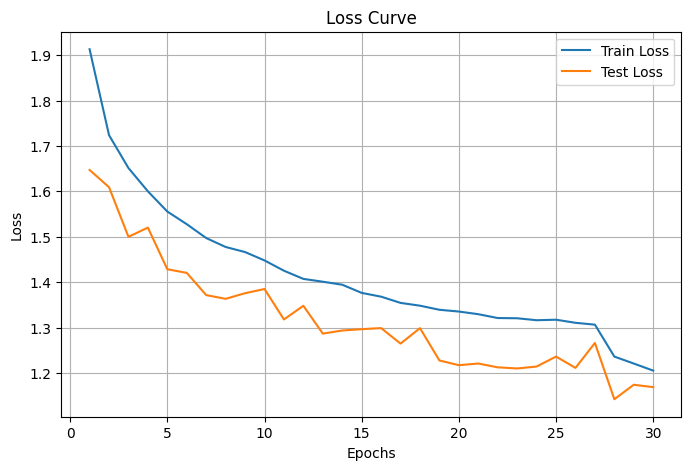

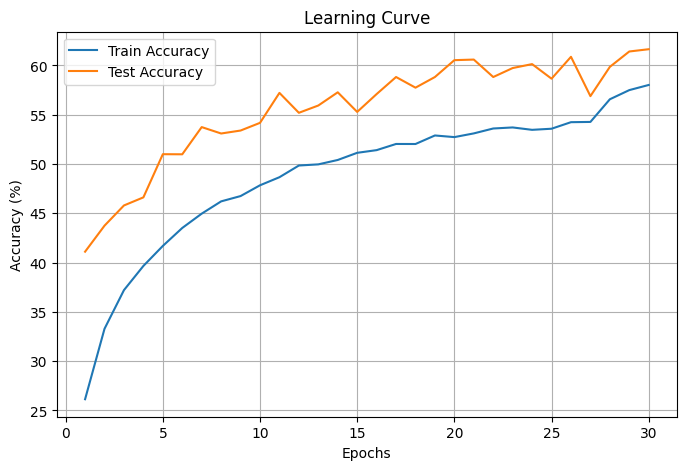

In [ ]:
import matplotlib.pyplot as plt

# Gráfica de pérdida (loss curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(test_losses) + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Gráfica de precisión (learning curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


Model Evaluation

Test Loss: 1.1686
Test Accuracy: 61.65%


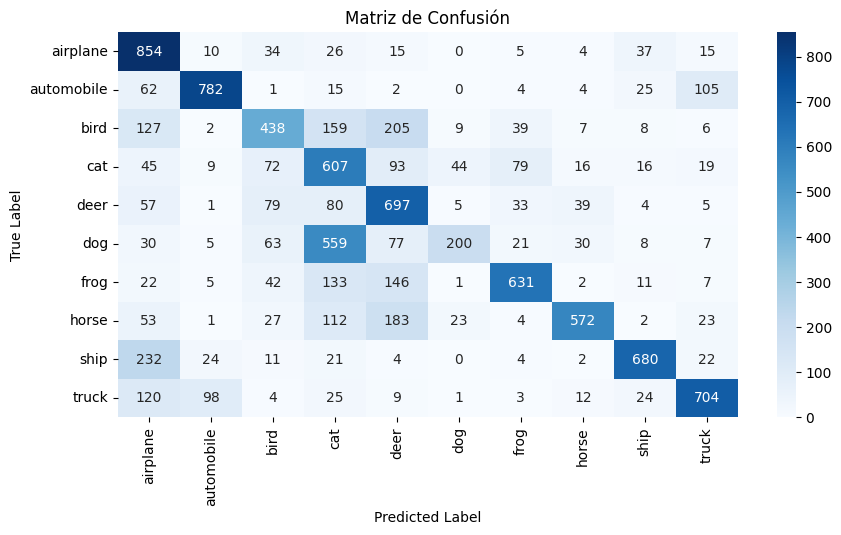


Classification Report:

              precision    recall  f1-score   support

    airplane       0.53      0.85      0.66      1000
  automobile       0.83      0.78      0.81      1000
        bird       0.57      0.44      0.49      1000
         cat       0.35      0.61      0.44      1000
        deer       0.49      0.70      0.57      1000
         dog       0.71      0.20      0.31      1000
        frog       0.77      0.63      0.69      1000
       horse       0.83      0.57      0.68      1000
        ship       0.83      0.68      0.75      1000
       truck       0.77      0.70      0.74      1000

    accuracy                           0.62     10000
   macro avg       0.67      0.62      0.61     10000
weighted avg       0.67      0.62      0.61     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluar el modelo y obtener métricas
def evaluate_with_metrics(model, loader):
    model.eval()
    total_loss, total_correct = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()

            # Almacenar predicciones y etiquetas reales
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcular métricas
    test_loss = total_loss / len(loader)
    test_accuracy = 100 * total_correct / len(loader.dataset)
    return test_loss, test_accuracy, np.array(all_preds), np.array(all_labels)

# Llamar a la función de evaluación
test_loss, test_accuracy, preds, labels = evaluate_with_metrics(model, test_loader)

# Mostrar test loss y accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Matriz de confusión
conf_matrix = confusion_matrix(labels, preds)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
class_report = classification_report(labels, preds, target_names=train_dataset.classes)
print("\nClassification Report:\n")
print(class_report)


Error analisis

Error rate per class:
airplane: 14.60%
automobile: 21.80%
bird: 56.20%
cat: 39.30%
deer: 30.30%
dog: 80.00%
frog: 36.90%
horse: 42.80%
ship: 32.00%
truck: 29.60%


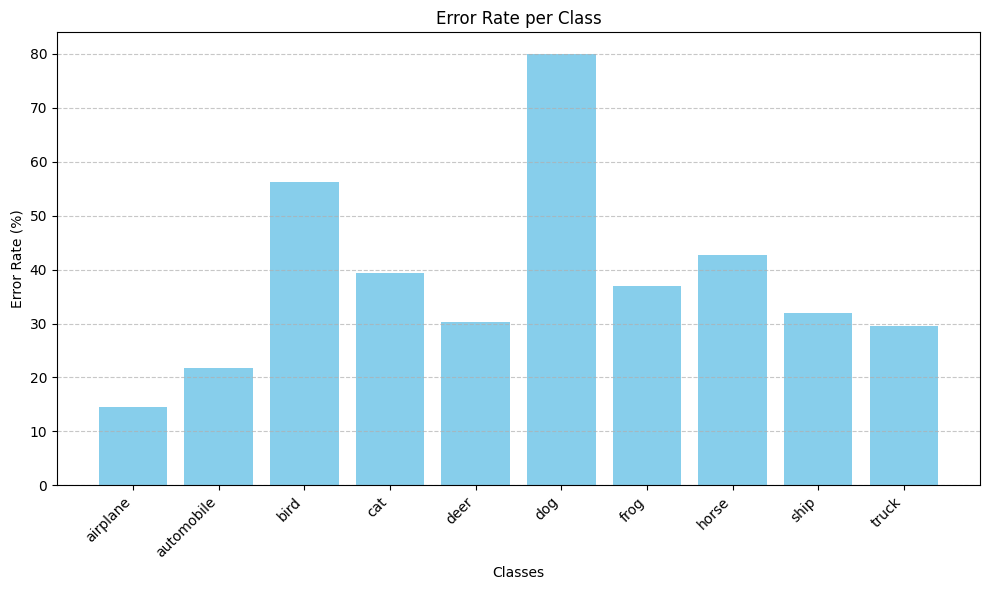

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para evaluar el modelo y analizar errores
def error_analysis(model, loader, class_names):
    model.eval()
    total_correct = np.zeros(len(class_names))
    total_per_class = np.zeros(len(class_names))
    incorrect_per_class = np.zeros(len(class_names))

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(1)

            # Actualizar totales por clase
            for i in range(len(class_names)):
                total_per_class[i] += (labels == i).sum().item()
                incorrect_per_class[i] += ((preds != labels) & (labels == i)).sum().item()

    # Calcular tasa de error por clase
    error_rates = incorrect_per_class / total_per_class * 100

    # Imprimir resultados
    print("Error rate per class:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {error_rates[i]:.2f}%")

    # Gráfica de barras para visualizar errores
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, error_rates, color='skyblue')
    plt.title("Error Rate per Class")
    plt.xlabel("Classes")
    plt.ylabel("Error Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Nombres de las clases (por ejemplo, CIFAR-10)
class_names = train_dataset.classes  # ['airplane', 'automobile', ...]

# Llamar a la función de análisis de errores
error_analysis(model, test_loader, class_names)


# CLIP

In [ ]:
!pip install clip-by-openai torch torchvision

!pip install torch torchvision --upgrade

import torch
print(torch.__version__)


  Using cached clip_by_openai-1.1-py3-none-any.whl.metadata (369 bytes)
INFO: pip is looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
  Using cached clip_by_openai-1.0.1-py3-none-any.whl.metadata (407 bytes)
  Using cached clip_by_openai-0.1.1.5-py3-none-any.whl.metadata (8.6 kB)
  Using cached clip_by_openai-0.1.1.4-py3-none-any.whl.metadata (8.6 kB)
  Using cached clip_by_openai-0.1.1.3-py3-none-any.whl.metadata (8.7 kB)
  Using cached clip_by_openai-0.1.1.2-py3-none-any.whl.metadata (9.0 kB)
  Using cached clip_by_openai-0.1.1-py3-none-any.whl.metadata (9.0 kB)
  Using cached clip_by_openai-0.1.0-py3-none-any.whl.metadata (9.0 kB)
INFO: pip is still looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install clip-by-openai==0.1.0, clip-by-openai==0.1.1, clip-by-openai==0.1.1.2, clip-by-openai==0.1

Instalacion y Carga del modelo CLIP

In [ ]:
# Instalar dependencias si es necesario (ejecutar en terminal)
#!pip install clip-by-openai torch torchvision
!pip uninstall clip-by-openai -y
!pip uninstall clip -y
!pip install git+https://github.com/openai/CLIP.git


import clip
import torch
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

model, preprocess = clip.load("ViT-B/32", device=device)
print("Modelo CLIP cargado exitosamente.")

Found existing installation: clip 1.0
Uninstalling clip-1.0:
  Successfully uninstalled clip-1.0
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-vjafrt13
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-vjafrt13
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=ec0c80fb4ccd24ca3a838120bd7cf0c38a8eabcb3a7e0baa1e8e0aaee567b38c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fds1tbov/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip
Usando dispositivo: cpu
Modelo CLIP cargado exitosamente.


Cargar y preprocesar CIFAR-10

In [ ]:
# Importar bibliotecas necesarias
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Transformaciones necesarias para CIFAR-10
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar imágenes a 224x224
    transforms.ToTensor(),          # Convertir imágenes PIL a tensores de PyTorch
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Normalizar imágenes
])

# Cargar el conjunto de datos CIFAR-10
cifar10_dataset = CIFAR10(root="./data", train=False, transform=transform, download=True)
dataloader = DataLoader(cifar10_dataset, batch_size=32, shuffle=False)

# Comprobación del DataLoader
for images, labels in dataloader:
    print(f"Tamaño del batch de imágenes: {images.shape}")
    print(f"Tamaño del batch de etiquetas: {labels.shape}")
    break

# Obtener los nombres de las clases de CIFAR-10
class_names = cifar10.classes
print("Clases de CIFAR-10:", class_names)


Files already downloaded and verified
Tamaño del batch de imágenes: torch.Size([32, 3, 32, 32])
Tamaño del batch de etiquetas: torch.Size([32])
Clases de CIFAR-10: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Generar descripciones textuales de las clases

In [ ]:
# Crear descripciones textuales para las clases de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
text_prompts = [f"una foto de un {class_name}" for class_name in class_names]

# Codificar las descripciones en el espacio compartido
text_tokens = clip.tokenize(text_prompts).to(device)
with torch.no_grad():
    text_embeddings = model.encode_text(text_tokens)
    text_embeddings /= text_embeddings.norm(dim=-1, keepdim=True)  # Normalización


Codificar imágenes y realizar predicciones

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from tqdm import tqdm

# Transformaciones necesarias para CIFAR-10
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar imágenes a 224x224
    transforms.ToTensor(),          # Convertir imágenes PIL a tensores de PyTorch
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Normalizar imágenes
])

# Cargar el conjunto de datos CIFAR-10
cifar10_dataset = CIFAR10(root="./data", train=False, transform=transform, download=True)
dataloader = DataLoader(cifar10_dataset, batch_size=32, shuffle=False)

# Crear descripciones textuales para las clases de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
text_prompts = [f"una foto de un {class_name}" for class_name in class_names]

# Evaluar el modelo con barra de progreso
model.eval()
with torch.no_grad():
    with tqdm(dataloader, desc="Evaluando imágenes", unit="batch") as progress_bar:
        for images, labels in progress_bar:
            images = images.to(device)  # Mover imágenes al dispositivo
            labels = labels.to(device)

            # Codificar imágenes
            image_embeddings = model.encode_image(images)
            image_embeddings /= image_embeddings.norm(dim=-1, keepdim=True)

            # Calcular similitudes
            similarities = image_embeddings @ text_embeddings.T
            predictions = similarities.argmax(dim=-1)

            # Actualizar conteos por clase y guardar ejemplos
            for img, label, pred in zip(images, labels, predictions):
                total_per_class[label.item()] += 1
                if label == pred:
                    correct_per_class[label.item()] += 1
                    correct_examples.append((img, label, pred))
                else:
                    incorrect_examples.append((img, label, pred))

            # Actualizar barra de progreso con precisión acumulada
            total_correct = sum(correct_per_class)
            total_samples = sum(total_per_class)
            current_accuracy = 100 * total_correct / total_samples if total_samples > 0 else 0
            progress_bar.set_postfix(accuracy=f"{current_accuracy:.2f}%")

Files already downloaded and verified


Evaluando imágenes: 100%|██████████| 313/313 [32:53<00:00,  6.30s/batch, accuracy=82.49%]


Accuracy and Visual examples

In [ ]:
# Mostrar precisión por clase
print("\n--- Precisión por clase ---")
for idx, class_name in enumerate(class_names):
    accuracy = 100 * correct_per_class[idx] / total_per_class[idx] if total_per_class[idx] > 0 else 0
    print(f"Precisión para la clase '{class_name}': {accuracy:.2f}%")

# Visualizar 20 ejemplos correctos con desnormalización
print("\n--- Ejemplos Correctos ---")
plt.figure(figsize=(20, 10))
for i, (img, label, pred) in enumerate(correct_examples[:20]):
    # Desnormalizar la imagen (asumiendo rango [-1, 1])
    img = img.cpu().permute(1, 2, 0).numpy()
    img = ((img + 1) * 127.5).clip(0, 255).astype("uint8")  # Desnormalizar y ajustar valores
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {class_names[label]}\nPred: {class_names[pred]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Visualizar 20 ejemplos incorrectos con desnormalización
print("\n--- Ejemplos Incorrectos ---")
plt.figure(figsize=(20, 10))
for i, (img, label, pred) in enumerate(incorrect_examples[:20]):
    # Desnormalizar la imagen (asumiendo rango [-1, 1])
    img = img.cpu().permute(1, 2, 0).numpy()
    img = ((img + 1) * 127.5).clip(0, 255).astype("uint8")  # Desnormalizar y ajustar valores
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {class_names[label]}\nPred: {class_names[pred]}")
    plt.axis("off")
plt.tight_layout()
plt.show()



Output hidden; open in https://colab.research.google.com to view.

Text with images in one class

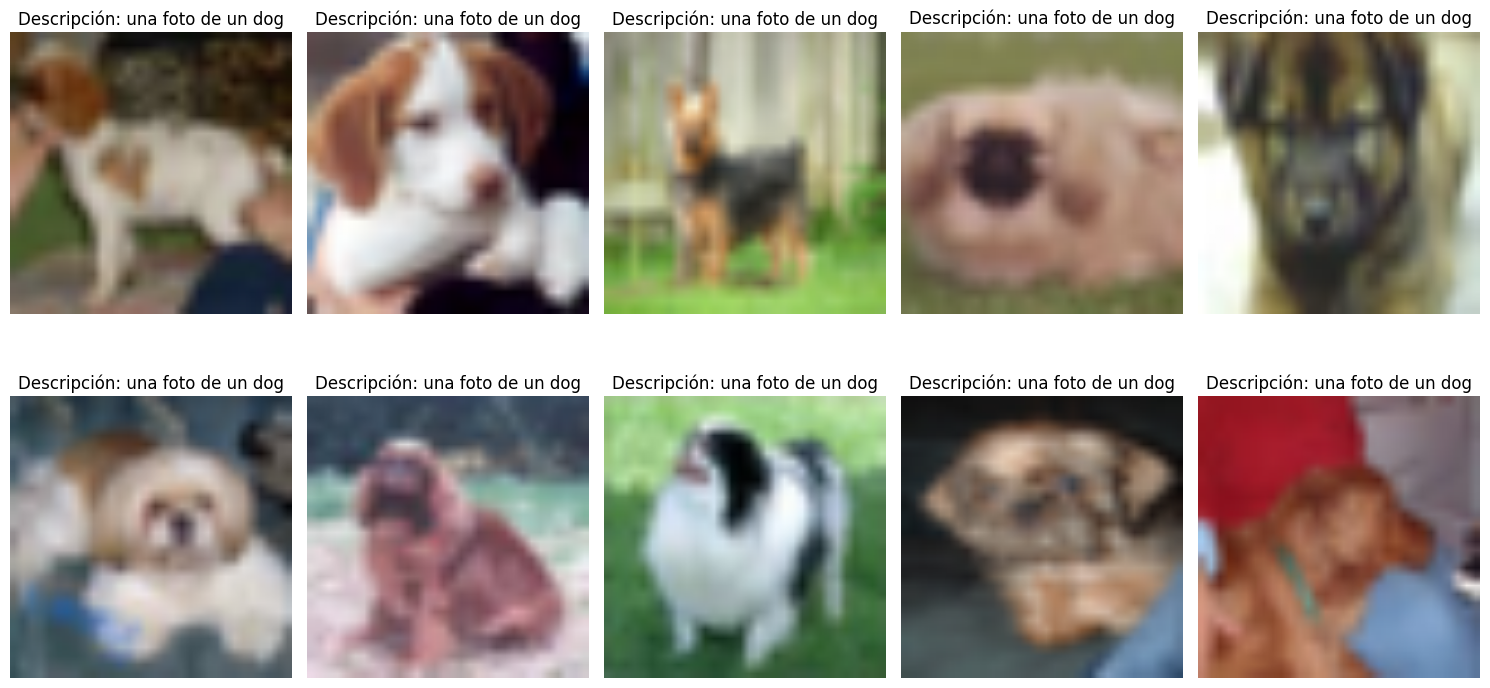

In [ ]:
import matplotlib.pyplot as plt

# Número de ejemplos a mostrar por clase
num_examples = 10

# Elegir la clase que quieres visualizar
selected_class = "dog"  # Cambia esto a cualquier clase de CIFAR-10
class_index = class_names.index(selected_class)

# Filtrar imágenes de la clase seleccionada
filtered_examples = [img for img, label, _ in correct_examples if label.item() == class_index]

# Limitar a `num_examples`
filtered_examples = filtered_examples[:num_examples]

# Visualizar imágenes con la descripción textual
plt.figure(figsize=(15, 8))
for i, img in enumerate(filtered_examples):
    img = img.cpu().permute(1, 2, 0).numpy()  # Reorganizar canales
    img = (img * 0.5) + 0.5  # Desnormalizar al rango [0, 1]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Descripción: una foto de un {selected_class}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Text with imagens in a set of class

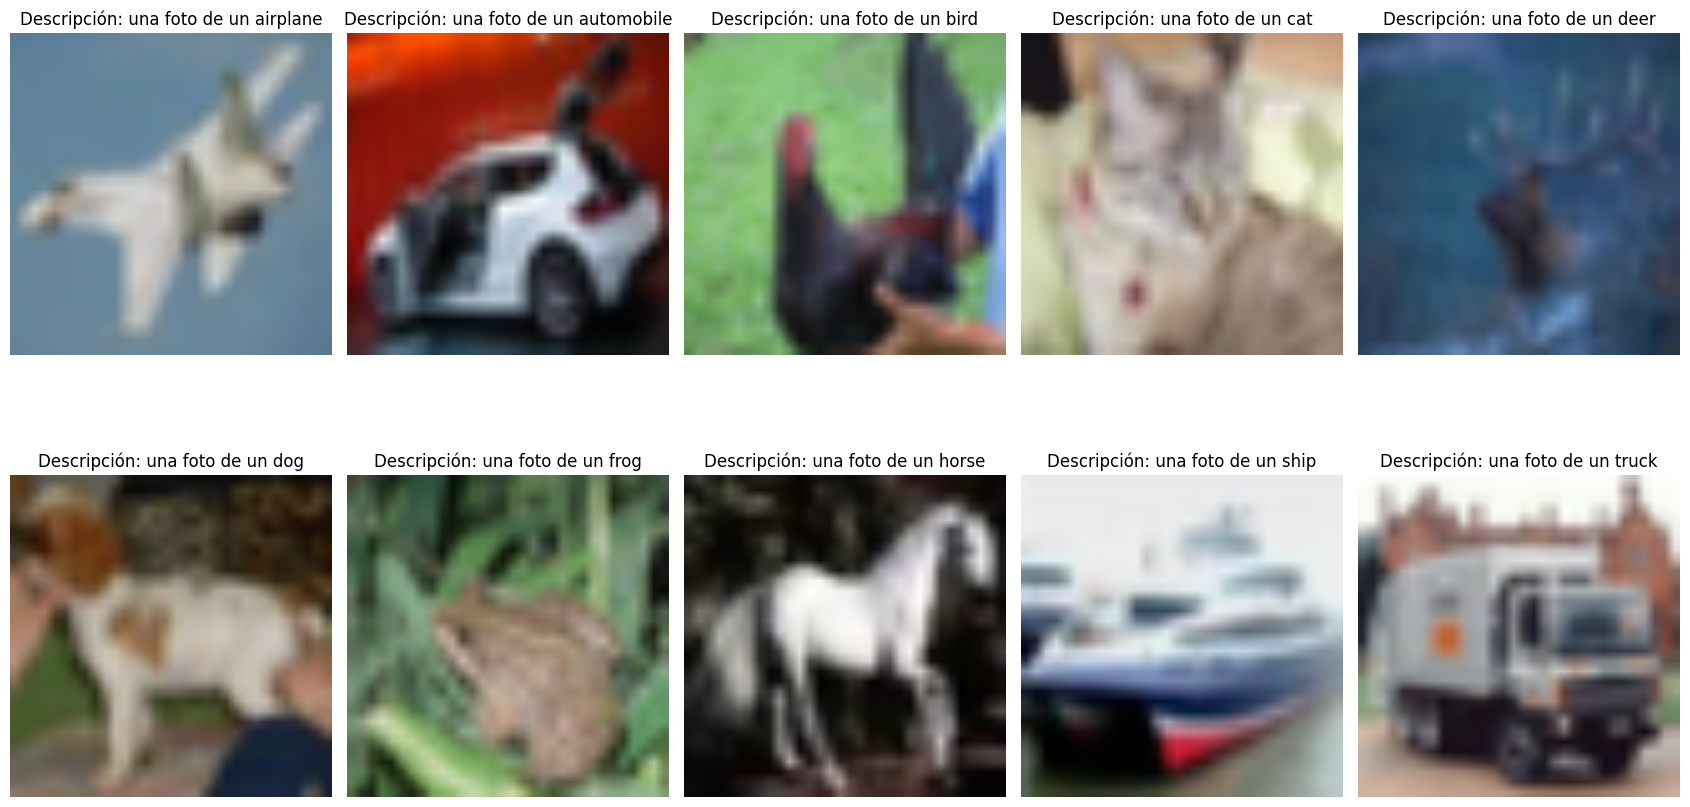

In [ ]:
import matplotlib.pyplot as plt

# Número de clases en CIFAR-10
num_classes = len(class_names)

# Seleccionar una imagen correcta de cada clase
examples_per_class = {class_name: None for class_name in class_names}

# Buscar ejemplos correctos
for img, label, pred in correct_examples:
    class_name = class_names[label.item()]
    if examples_per_class[class_name] is None:  # Si aún no hay un ejemplo para esta clase
        examples_per_class[class_name] = (img, class_name)

# Visualizar una imagen por clase con la descripción asociada
plt.figure(figsize=(17, 10))
for i, (class_name, example) in enumerate(examples_per_class.items()):
    if example is not None:
        img, label = example
        img = img.cpu().permute(1, 2, 0).numpy()  # Reorganizar canales
        img = (img * 0.5) + 0.5  # Desnormalizar al rango [0, 1]
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Descripción: una foto de un {label}")
        plt.axis("off")
plt.tight_layout()
plt.show()


Similarity between text and image

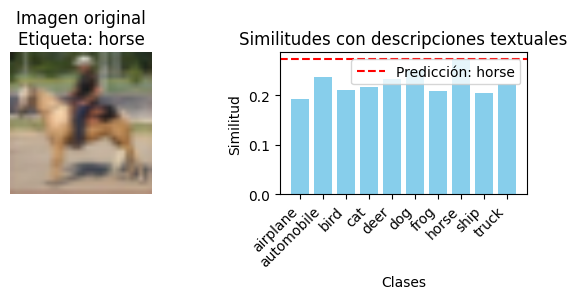

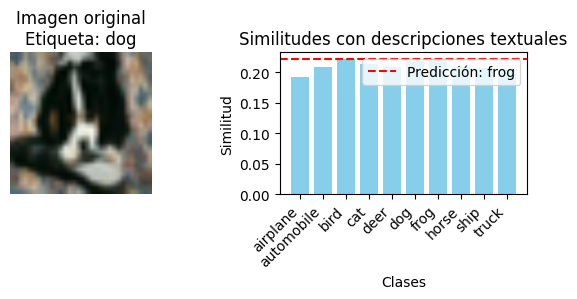

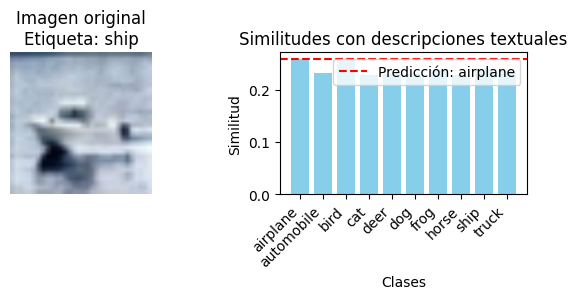

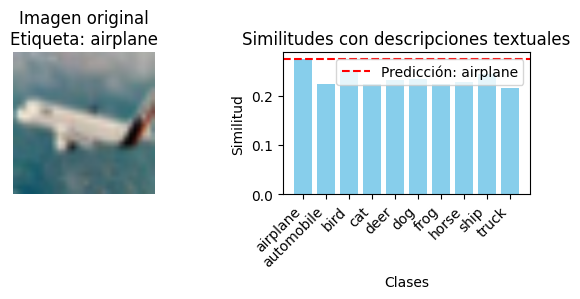

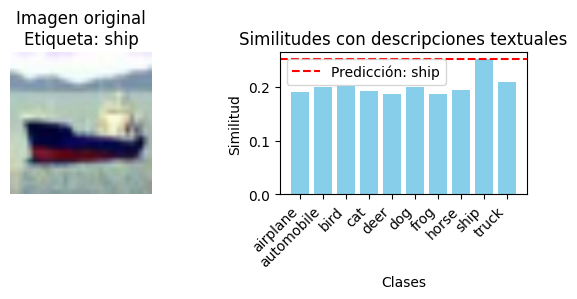

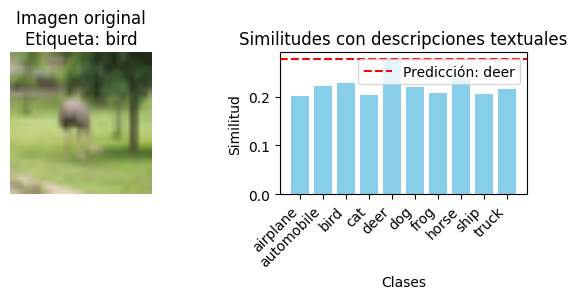

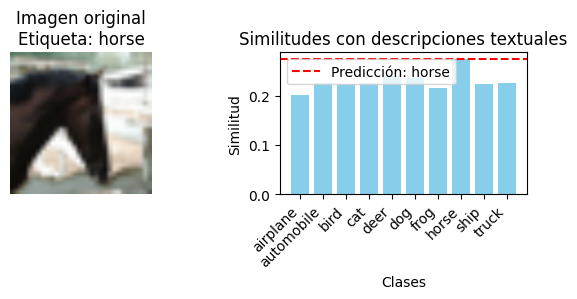

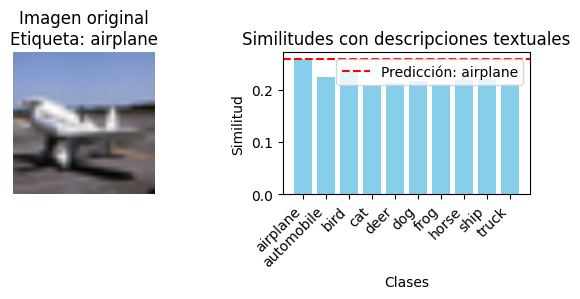

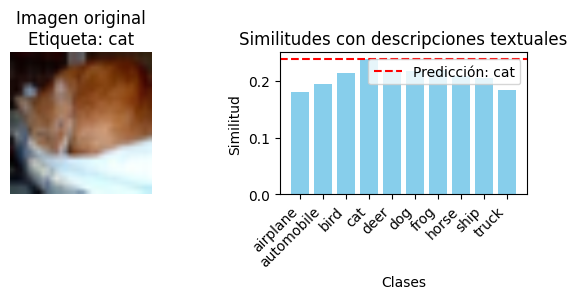

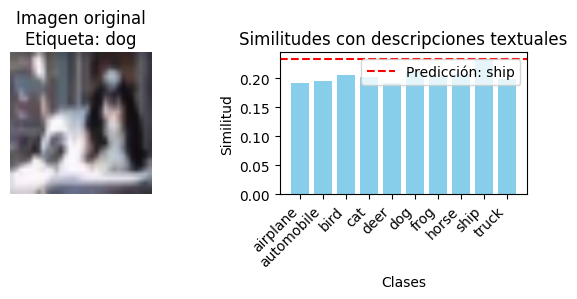

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar ejemplos para analizar
num_examples = 10  # Número de imágenes que quieres visualizar
examples = list(zip(images, labels, similarities))[:num_examples]

# Visualizar imágenes y similitudes
for img, label, similarity in examples:
    # Mover la imagen al formato CPU y normalizar para visualizar
    img = img.cpu().permute(1, 2, 0).numpy()  # Reorganizar canales
    img = (img * 0.5) + 0.5  # Desnormalizar al rango [0, 1]

    # Convertir similitudes a formato numpy
    similarity = similarity.cpu().numpy()

    # Crear la visualización
    plt.figure(figsize=(6, 3))

    # Mostrar la imagen
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Imagen original\nEtiqueta: {class_names[label]}")

    # Mostrar las similitudes como un gráfico de barras
    plt.subplot(1, 2, 2)
    plt.bar(class_names, similarity, color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.title("Similitudes con descripciones textuales")
    plt.xlabel("Clases")
    plt.ylabel("Similitud")

    # Resaltar la predicción
    pred_class = np.argmax(similarity)
    plt.axhline(similarity[pred_class], color="red", linestyle="--", label=f"Predicción: {class_names[pred_class]}")
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


# Nueva sección